<a href="https://colab.research.google.com/github/ImamSyabana/TugasAkhir_Nikkei225/blob/main/8020_multivariate_Cleaned_Nikkei225_daily_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Roadmap penelitian

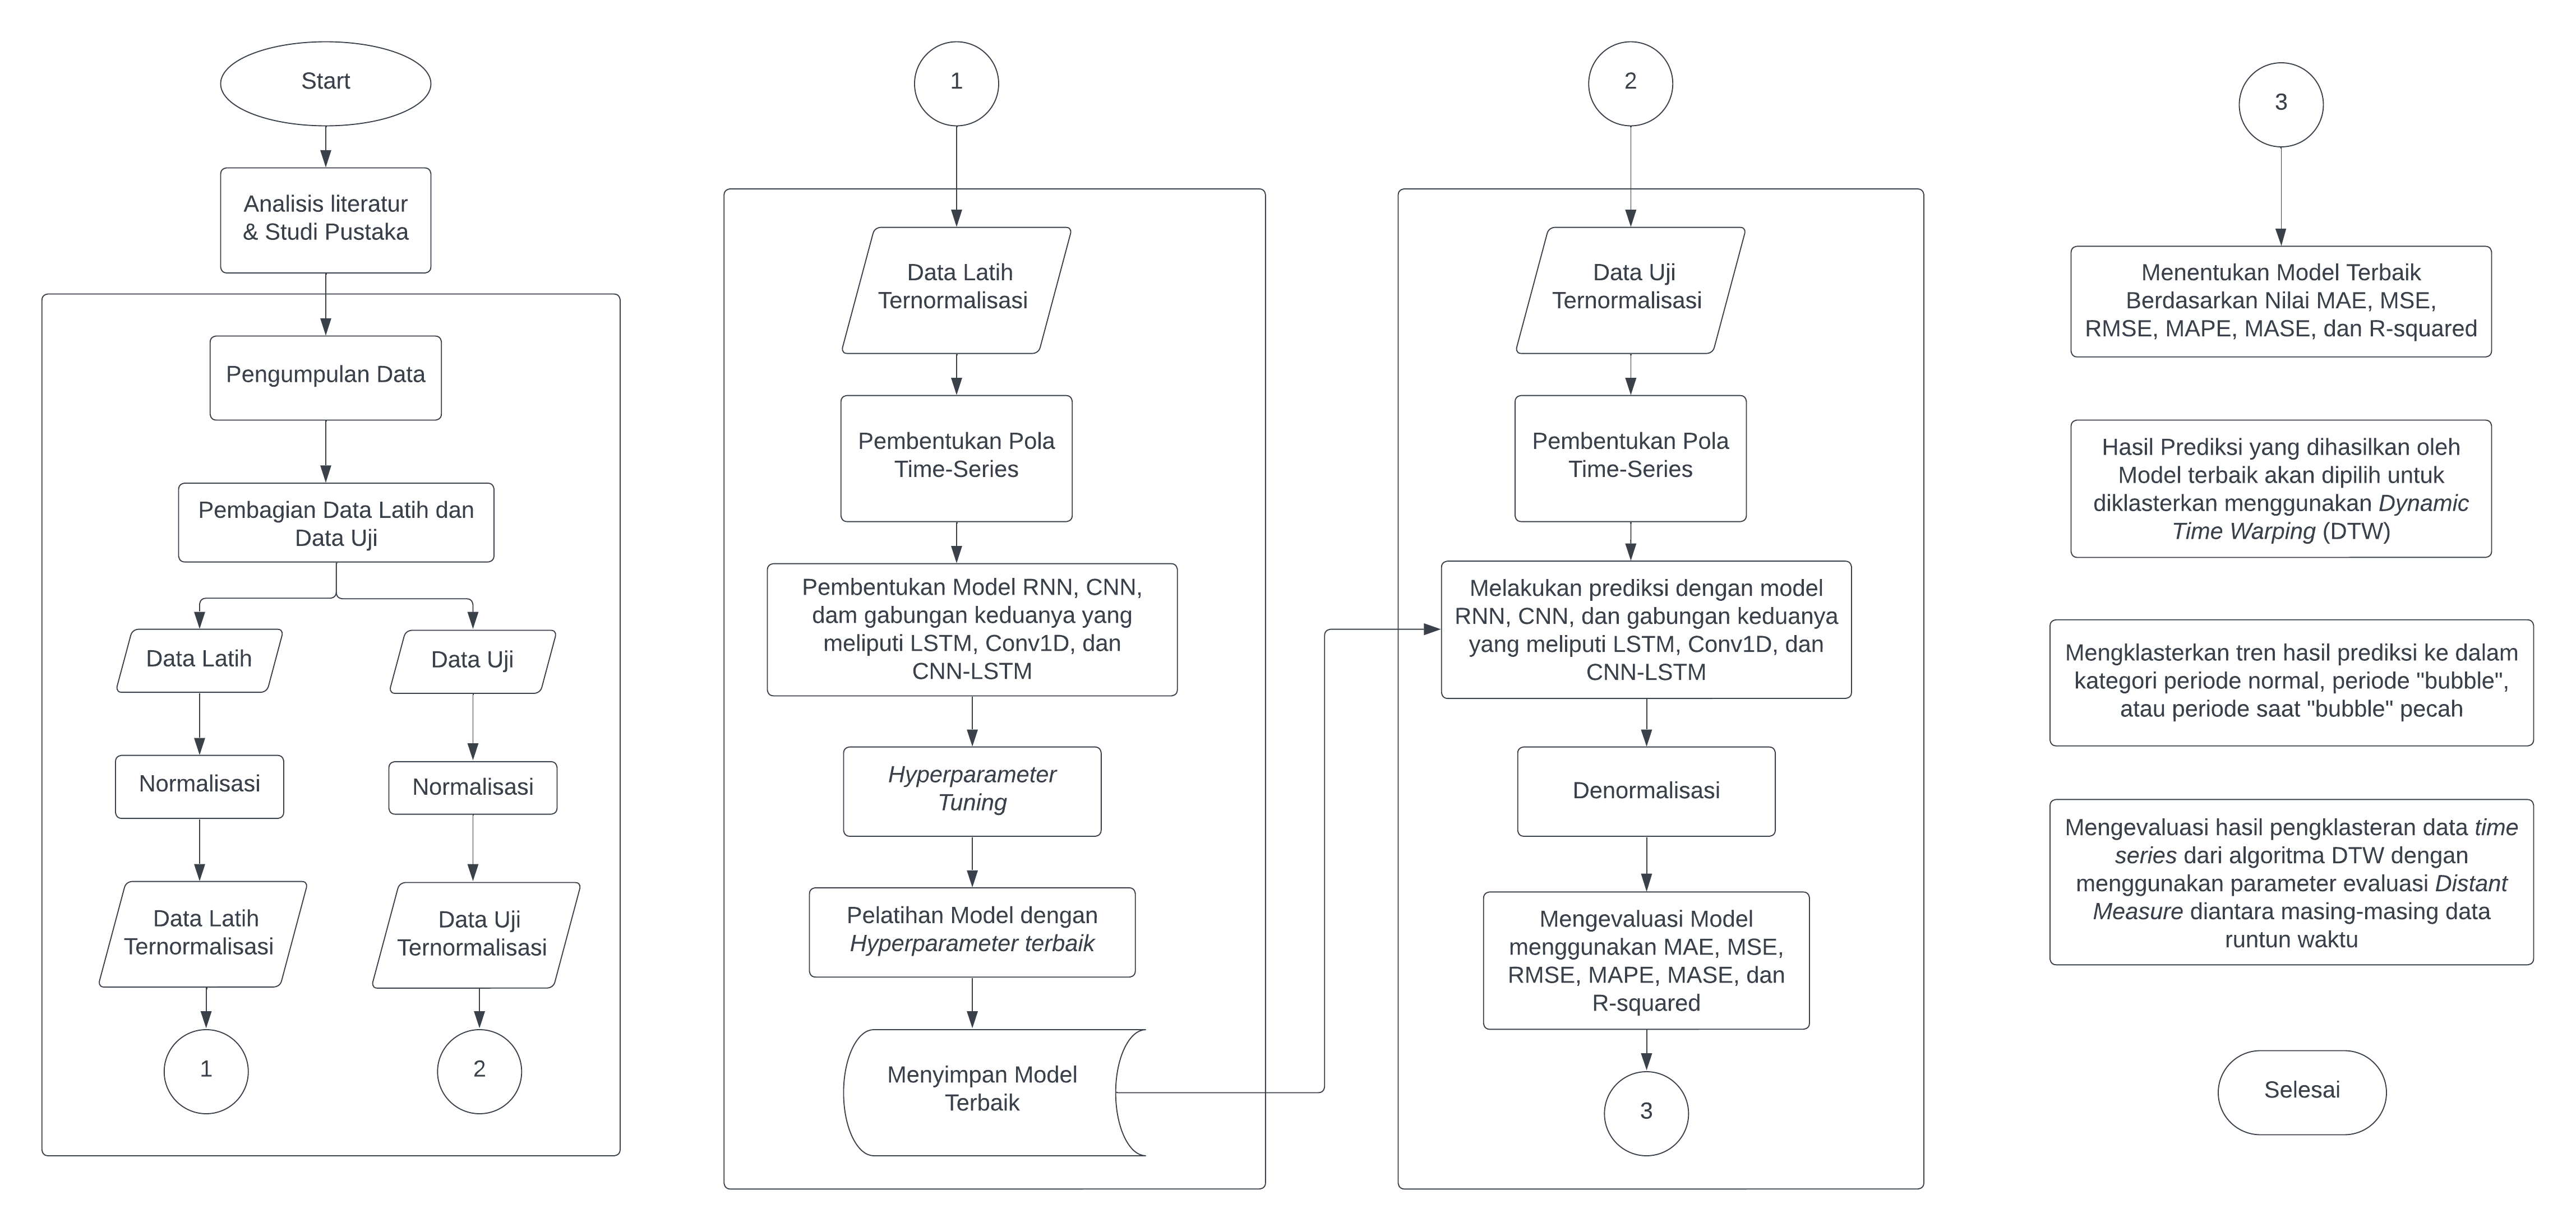

# Konek Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Get Data

Sumber data: https://indexes.nikkei.co.jp/en/nkave/archives/data?list=daily


mendownload data harga saham Nikkei225 dengan interval harian dari tahun 1968 sampai 2023

In [3]:
!wget https://raw.githubusercontent.com/ImamSyabana/TugasAkhir_Nikkei225/main/datasets/nikkei225/Nikkei225_daily.csv


--2024-03-10 13:43:42--  https://raw.githubusercontent.com/ImamSyabana/TugasAkhir_Nikkei225/main/datasets/nikkei225/Nikkei225_daily.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 884070 (863K) [text/plain]
Saving to: ‘Nikkei225_daily.csv’

Nikkei225_daily.csv 100%[===================>] 863.35K  --.-KB/s    in 0.02s   

2024-03-10 13:43:42 (44.3 MB/s) - ‘Nikkei225_daily.csv’ saved [884070/884070]



## Import data time series dengan pandas

In [4]:
# import dengan pandas
import pandas as pd

# konversi format nilai
def convert_value(value):
    # Check if the value is not NaN and not '-'
    if value != '-':
        # Remove commas and convert to float
        return float(value.replace(',', ''))
    else:
        return None

# membaca data saham Nikkei225
nikkei225_df = pd.read_csv("/content/Nikkei225_daily.csv",
                           parse_dates = ["Date"],
                           index_col = ["Date"],
                           converters = {'Open': convert_value,
                                         'High': convert_value,
                                         'Low': convert_value,
                                         'Close': convert_value})
                             #menentukan kolom date dan menentukan kalau kolom 1 (indeks) adalah datetime

nikkei225_df.tail()

Open      High       Low     Close
Date                                              
2023-12-25  33414.51  33414.51  33221.57  33254.03
2023-12-26  33295.68  33312.26  33181.36  33305.85
2023-12-27  33532.97  33755.75  33521.52  33681.24
2023-12-28  33477.47  33571.73  33411.24  33539.62
2023-12-29  33458.64  33652.71  33305.17  33464.17

In [5]:
nikkei225_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20040 entries, 1950-01-04 to 2023-12-29
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    9647 non-null   float64
 1   High    9647 non-null   float64
 2   Low     9647 non-null   float64
 3   Close   20040 non-null  float64
dtypes: float64(4)
memory usage: 782.8 KB


data saham hanya digunakan saat harga close

In [6]:
nikkei225_close_df = pd.DataFrame(nikkei225_df["Close"]).rename(columns={"Close": "Closing Price (Yen)"})
nikkei225_close_df.tail()


Closing Price (Yen)
Date                           
2023-12-25             33254.03
2023-12-26             33305.85
2023-12-27             33681.24
2023-12-28             33539.62
2023-12-29             33464.17

Informasi jumlah data

In [7]:
len(nikkei225_df)

20040

menampilkan missing data

In [8]:
# List the rows where the 'Close' column is nullC
rows_with_null_close = nikkei225_close_df[nikkei225_close_df['Closing Price (Yen)'].isnull()]
print(rows_with_null_close)

Empty DataFrame
Columns: [Closing Price (Yen)]
Index: []


In [9]:

nikkei225_close_df.isnull().sum()

Closing Price (Yen)    0
dtype: int64

# Bagian membuat multivariate time series dataset.

selain menggunakan data nikkei225, perdiksi harga saham akan dibantu dengan data discount rate

multivariate time series akan menambahkan fitur lebih banyak dari univariate time series yang hanya satu fitur

import file csv





In [10]:
!wget https://raw.githubusercontent.com/ImamSyabana/TugasAkhir_Nikkei225/main/datasets/discountRate/discountRate.csv

--2024-03-10 13:43:44--  https://raw.githubusercontent.com/ImamSyabana/TugasAkhir_Nikkei225/main/datasets/discountRate/discountRate.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11711 (11K) [text/plain]
Saving to: ‘discountRate.csv’

discountRate.csv    100%[===================>]  11.44K  --.-KB/s    in 0s      

2024-03-10 13:43:44 (77.5 MB/s) - ‘discountRate.csv’ saved [11711/11711]



# Import data time seres tambahan: discount rate

import data discount rate

In [11]:
# import dengan pandas
import pandas as pd
# membaca data discount rate
discRate_df = pd.read_csv("/content/discountRate.csv",
                           parse_dates = ["Date"],
                           index_col = ["Date"])
                             #menentukan kolom date dan menentukan kalau kolom 1 (indeks) adalah datetime

discRate_df[-3:]

discountRate
Date                    
2023-10-01           0.3
2023-11-01           0.3
2023-12-01           0.3

In [12]:
len(discRate_df)

888

menampilkan missing data

In [13]:
print(discRate_df.isnull().sum())

discountRate    0
dtype: int64


import data discount rate dengan modul csv.reader

In [14]:
# import dan format historikal data dengan python

import csv
from datetime import datetime

timesteps_discountRate = []
discountRate_value = []

with open("/content/discountRate.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter = ",")
  next(csv_reader) #untuk tidak membaca baris pertama berisi judul kolom
  for line in csv_reader:
    if line[1] == "null":
      continue
    timesteps_discountRate.append(datetime.strptime(line[0], "%Y/%m")) #membaca tanggal sbg DATE
    discountRate_value.append(float(line[1])) #membaca nilai discount rate


In [15]:
timesteps_discountRate[:3], discountRate_value[:3]

([datetime.datetime(1950, 1, 1, 0, 0),
  datetime.datetime(1950, 2, 1, 0, 0),
  datetime.datetime(1950, 3, 1, 0, 0)],
 [5.11, 5.11, 5.11])

In [16]:
len(discountRate_value)

888

In [17]:
type(timesteps_discountRate), type(discountRate_value)

(list, list)

In [18]:
len(discountRate_value)

888

# Mengumpulkan data menjadi satu dataframe

In [19]:
# membuat dataframe untuk mengumpulkan semua data multivariate

# copy dataframe nikkei yang masih hanya berisi harga saham
nikkei225_close_multivariate_df = nikkei225_close_df.copy()

# menambahkan kolom money stock dan dsicount rate

nikkei225_close_multivariate_df["discount_rate"] = None
nikkei225_close_multivariate_df

Closing Price (Yen) discount_rate
Date                                         
1950-01-04               108.56          None
1950-01-05               105.54          None
1950-01-06               102.64          None
1950-01-07               102.95          None
1950-01-09               102.78          None
...                         ...           ...
2023-12-25             33254.03          None
2023-12-26             33305.85          None
2023-12-27             33681.24          None
2023-12-28             33539.62          None
2023-12-29             33464.17          None

[20040 rows x 2 columns]

menggabungkan data discount rate dan money supply ke dataframe Nikkei225 closing price

In [20]:
for x in range(len(timesteps_discountRate)):
  for y in range(len(nikkei225_close_multivariate_df.index)):
    IntervalBulan_timesteps_atrYEAR = timesteps_discountRate[x].year
    IntervalBulan_timesteps_atrMONTH = timesteps_discountRate[x].month
    IntervalBulan_timesteps_atrDAY = timesteps_discountRate[x].day

    IntervalHarian_timesteps_atrYEAR = nikkei225_close_multivariate_df.index[y].year
    IntervalHarian_timesteps_atrMONTH = nikkei225_close_multivariate_df.index[y].month
    IntervalHarian_timesteps_atrDAY = nikkei225_close_multivariate_df.index[y].day

    if IntervalBulan_timesteps_atrYEAR == IntervalHarian_timesteps_atrYEAR and IntervalBulan_timesteps_atrMONTH == IntervalHarian_timesteps_atrMONTH:
      string_tanggal = "{tahun}-{bulan}-{tanggal}".format(tahun = IntervalHarian_timesteps_atrYEAR, bulan = IntervalHarian_timesteps_atrMONTH, tanggal = IntervalHarian_timesteps_atrDAY)
      date_to_index = pd.to_datetime(string_tanggal)
      nikkei225_close_multivariate_df.loc[date_to_index, "discount_rate"] = discountRate_value[x]

In [21]:
discRate_df[80:90]

discountRate
Date                    
1956-09-01          7.30
1956-10-01          7.30
1956-11-01          7.30
1956-12-01          7.30
1957-01-01          7.30
1957-02-01          7.30
1957-03-01          7.67
1957-04-01          7.67
1957-05-01          8.40
1957-06-01          8.40

In [22]:
nikkei225_close_multivariate_df[11520:11600]

Closing Price (Yen) discount_rate
Date                                         
1989-04-26             33434.93           2.5
1989-04-27             33500.83           2.5
1989-04-28             33713.35           2.5
1989-05-01             33793.17          3.25
1989-05-02             33954.99          3.25
...                         ...           ...
1989-08-14             34671.62          3.25
1989-08-15             34810.69          3.25
1989-08-16             35084.15          3.25
1989-08-17             35090.11          3.25
1989-08-18             35063.14          3.25

[80 rows x 2 columns]

In [23]:
type(nikkei225_close_multivariate_df.index.tolist())

list

# Visualisasi data : Membuat fungsi untuk visualisasi (plotting)


In [24]:
# membuat fungsi untuk menggambar data time series

import matplotlib.pyplot as plt

def plot_time_series(timesteps, values, format= ".", start = 0, end =None, label = None, color = None):
  """
  Plots timesteps (a series of points in time) against values (a series  of values across timesteps).

  Parameters
  -------------
  timesteps : array of timestep values
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (similar to start but for the end)
  label : label to show on plot about values, default None
  """
  plt.plot(timesteps[start:end], values[start:end], format, label=label, color = color)
  plt.xlabel("Tanggal")
  plt.ylabel("Saham Nikkei225 Penutupan (harian)")
  if label:
    plt.legend(fontsize = 14) #make label bigger
  plt.grid(True)


Visualisasi data saham nikkei225

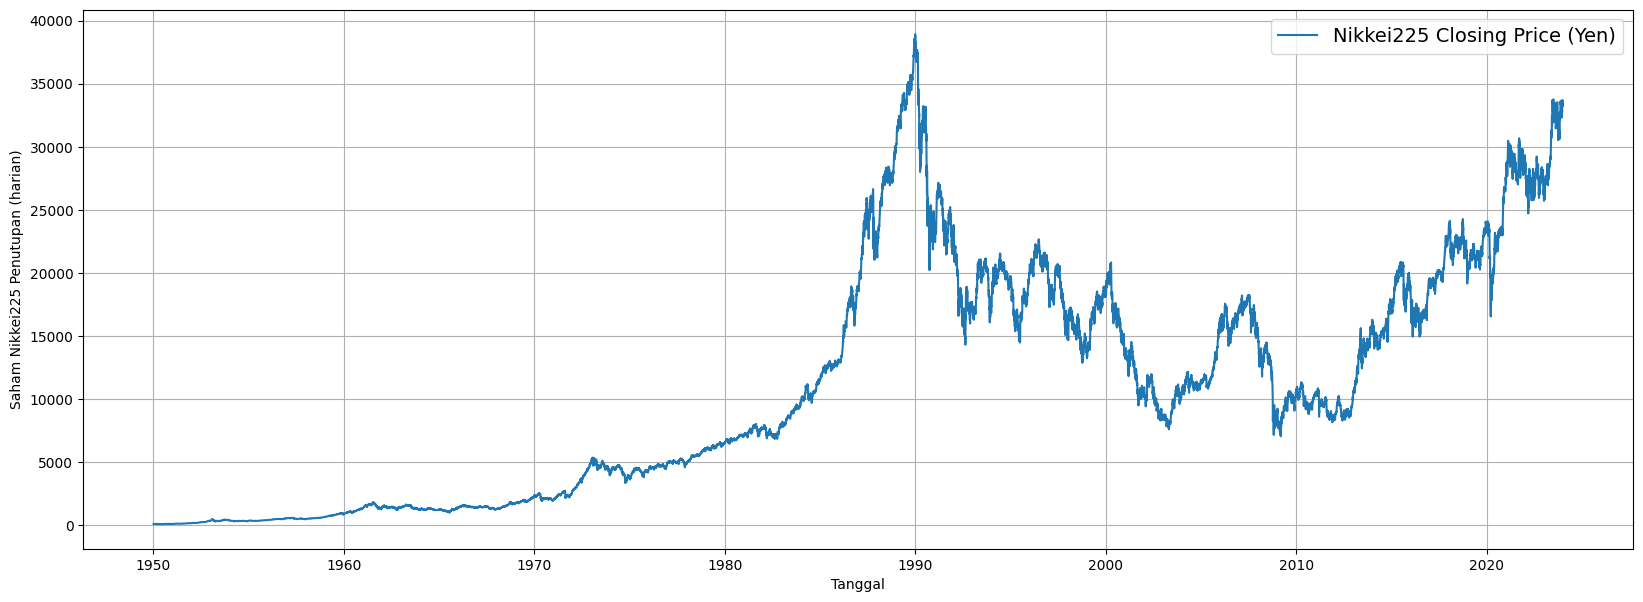

In [25]:

plt.figure(figsize = (20,7))
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = nikkei225_close_multivariate_df['Closing Price (Yen)'].tolist(), format = "-", label = "Nikkei225 Closing Price (Yen)")


Visualisasi data discount rate

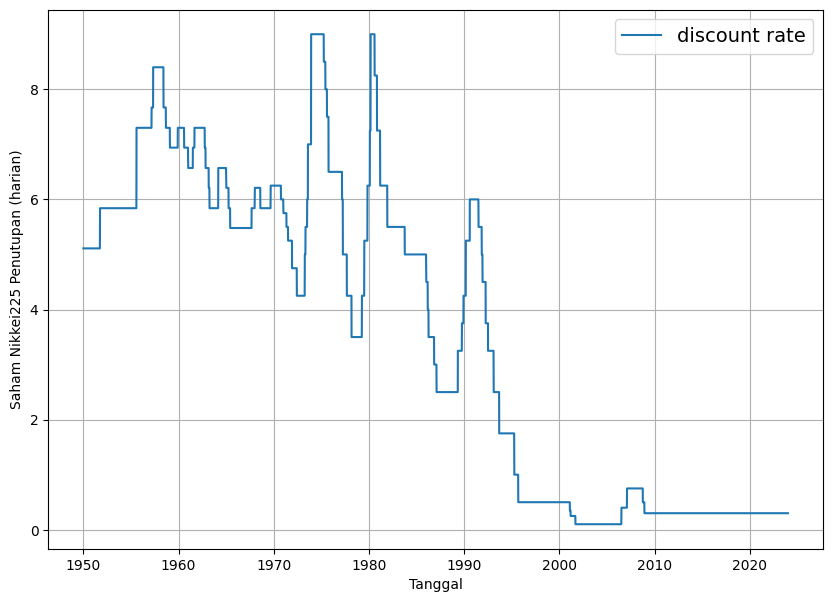

In [26]:

plt.figure(figsize = (10,7))
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = nikkei225_close_multivariate_df['discount_rate'].tolist(), format = "-", label = "discount rate")


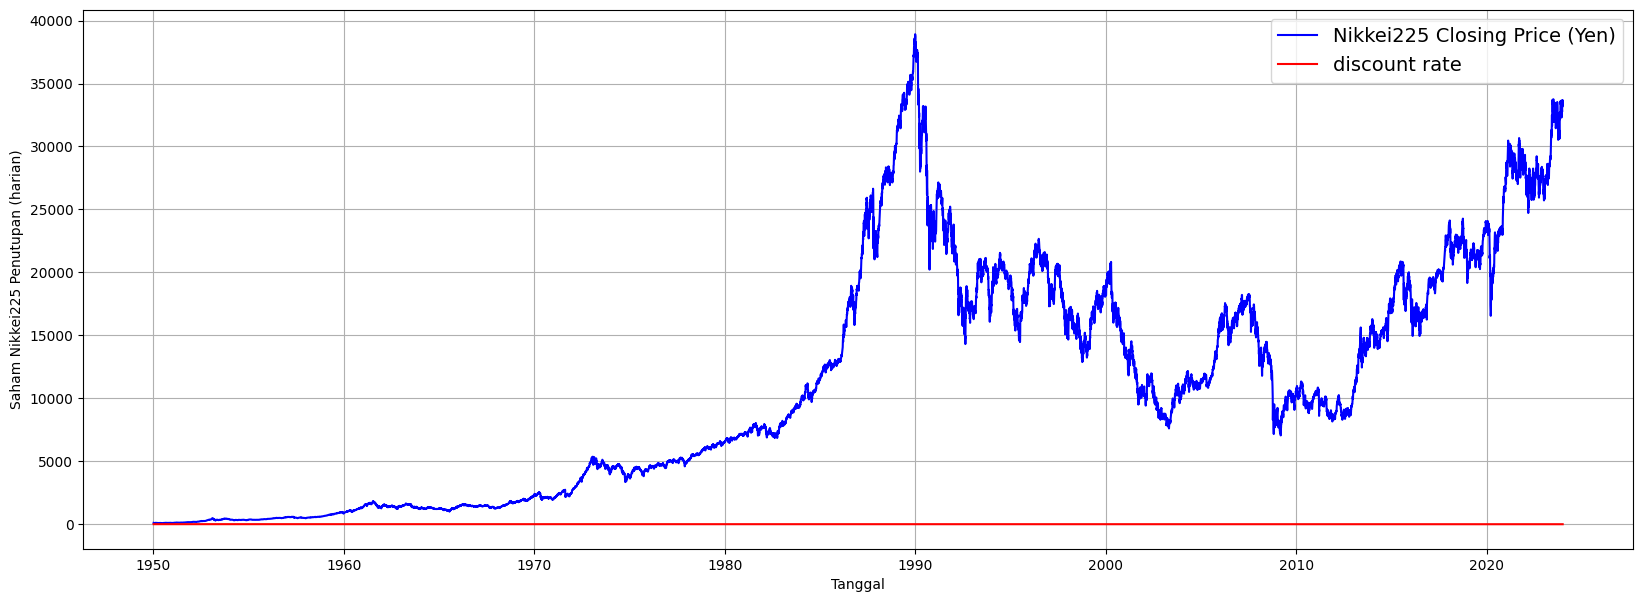

In [27]:
plt.figure(figsize = (20,7))
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = nikkei225_close_multivariate_df['Closing Price (Yen)'].tolist(), format = "-", label = "Nikkei225 Closing Price (Yen)", color = 'b')
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = nikkei225_close_multivariate_df['discount_rate'].tolist(), format = "-", label = "discount rate", color = 'r')


# Melakukan normalisasi dataset

In [28]:

from sklearn.preprocessing import MinMaxScaler

# meinputkan data ke MinMaxScaler
scaler_multivariate = MinMaxScaler(feature_range=(0, 1))  #next time klo mau ngerun ulang ini variabel rubah dari scaler -> scaler_multivariate
scaler_multivariate.fit(nikkei225_close_multivariate_df)

MinMaxScaler()

In [29]:
scaler_univariate = MinMaxScaler(feature_range = (0,1))

# mengimplementasikan scaler khusus univariate ke data saham nikkei225 saja
scaler_univariate.fit(nikkei225_close_df["Closing Price (Yen)"].values.reshape(-1, 1))

MinMaxScaler()

In [30]:
# Melakukan normalization
scaler_multivariate.transform(nikkei225_close_multivariate_df)

array([[6.00299454e-04, 5.62921348e-01],
       [5.22525780e-04, 5.62921348e-01],
       [4.47842450e-04, 5.62921348e-01],
       ...,
       [8.65193242e-01, 2.24719101e-02],
       [8.61546120e-01, 2.24719101e-02],
       [8.59603066e-01, 2.24719101e-02]])

membuat dataframe dengan nilai normalized

In [31]:
normalized_data  = scaler_multivariate.transform(nikkei225_close_multivariate_df)
normalized_data


array([[6.00299454e-04, 5.62921348e-01],
       [5.22525780e-04, 5.62921348e-01],
       [4.47842450e-04, 5.62921348e-01],
       ...,
       [8.65193242e-01, 2.24719101e-02],
       [8.61546120e-01, 2.24719101e-02],
       [8.59603066e-01, 2.24719101e-02]])

In [32]:
print ("dataset_normalized.shape" , normalized_data.shape)

dataset_normalized.shape (20040, 2)


In [33]:
normalized_data[:,0].reshape(-1, 1)

array([[6.00299454e-04],
       [5.22525780e-04],
       [4.47842450e-04],
       ...,
       [8.65193242e-01],
       [8.61546120e-01],
       [8.59603066e-01]])

In [34]:
type(normalized_data[:,0].reshape(-1, 1))

numpy.ndarray

In [35]:
# konversi array menjadi bentuk dataframe
scaled_nikkei225_close_multivariate_df  = pd.DataFrame(normalized_data, columns=nikkei225_close_multivariate_df.columns)


In [36]:
scaled_nikkei225_close_multivariate_df

Closing Price (Yen)  discount_rate
0                 0.000600       0.562921
1                 0.000523       0.562921
2                 0.000448       0.562921
3                 0.000456       0.562921
4                 0.000451       0.562921
...                    ...            ...
20035             0.854191       0.022472
20036             0.855526       0.022472
20037             0.865193       0.022472
20038             0.861546       0.022472
20039             0.859603       0.022472

[20040 rows x 2 columns]

LAtihan denormalisasi

In [37]:

# # Fit the scaler to your data
# scaler = MinMaxScaler()
# scaler.fit(nikkei225_close_multivariate_df[['discount_rate']])

# # Perform inverse normalization
# inverse_normalized_data = scaler.inverse_transform(scaled_nikkei225_close_multivariate_df[:, 2].reshape(-1, 1))

# print(inverse_normalized_data)

In [38]:
len(scaler_multivariate.transform(nikkei225_close_multivariate_df ))

20040

In [39]:
scaler_multivariate.transform(nikkei225_close_multivariate_df )[:,0].reshape(-1, 1)

array([[6.00299454e-04],
       [5.22525780e-04],
       [4.47842450e-04],
       ...,
       [8.65193242e-01],
       [8.61546120e-01],
       [8.59603066e-01]])

Visualisasi data yang di normalisasi

In [40]:
scaled_nikkei225_close_multivariate_df["discount_rate"]

0        0.562921
1        0.562921
2        0.562921
3        0.562921
4        0.562921
           ...   
20035    0.022472
20036    0.022472
20037    0.022472
20038    0.022472
20039    0.022472
Name: discount_rate, Length: 20040, dtype: float64

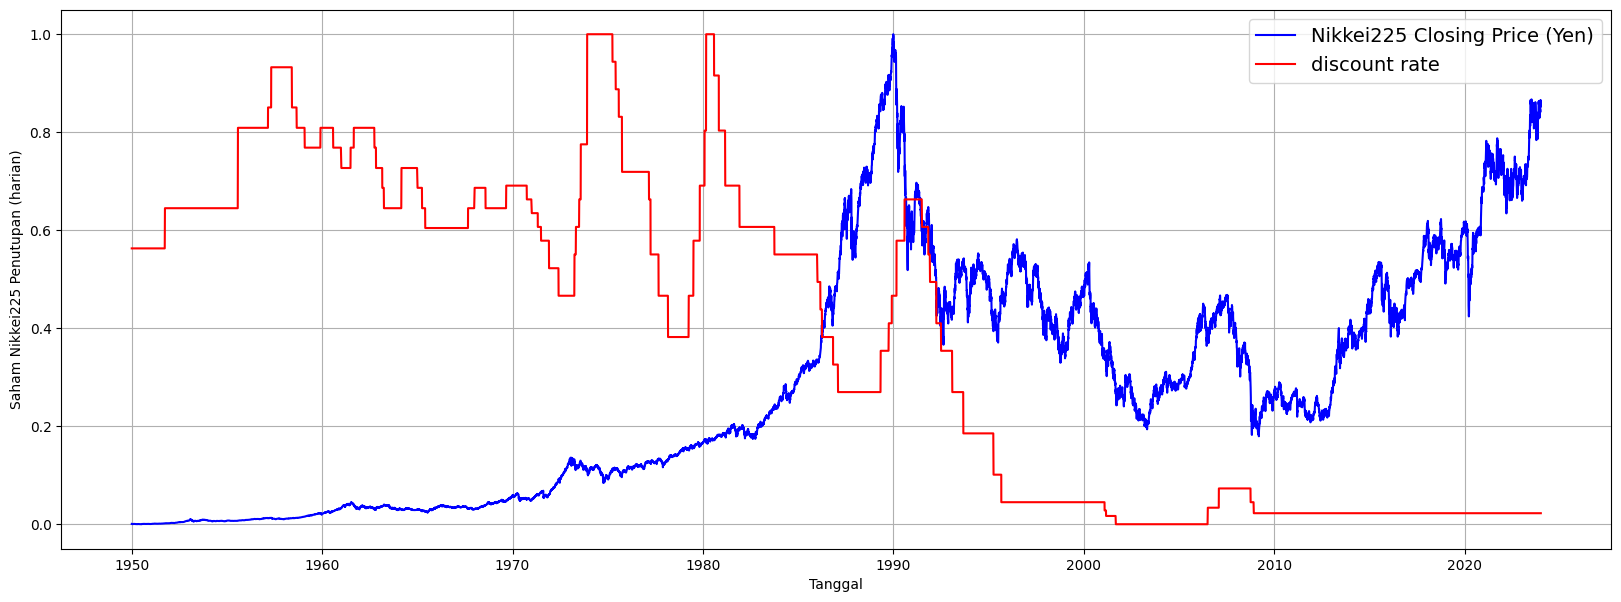

In [41]:

plt.figure(figsize = (20,7))
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = scaled_nikkei225_close_multivariate_df["Closing Price (Yen)"], format = "-", label = "Nikkei225 Closing Price (Yen)", color = 'b')
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = scaled_nikkei225_close_multivariate_df["discount_rate"], format = "-", label = "discount rate", color = 'r')


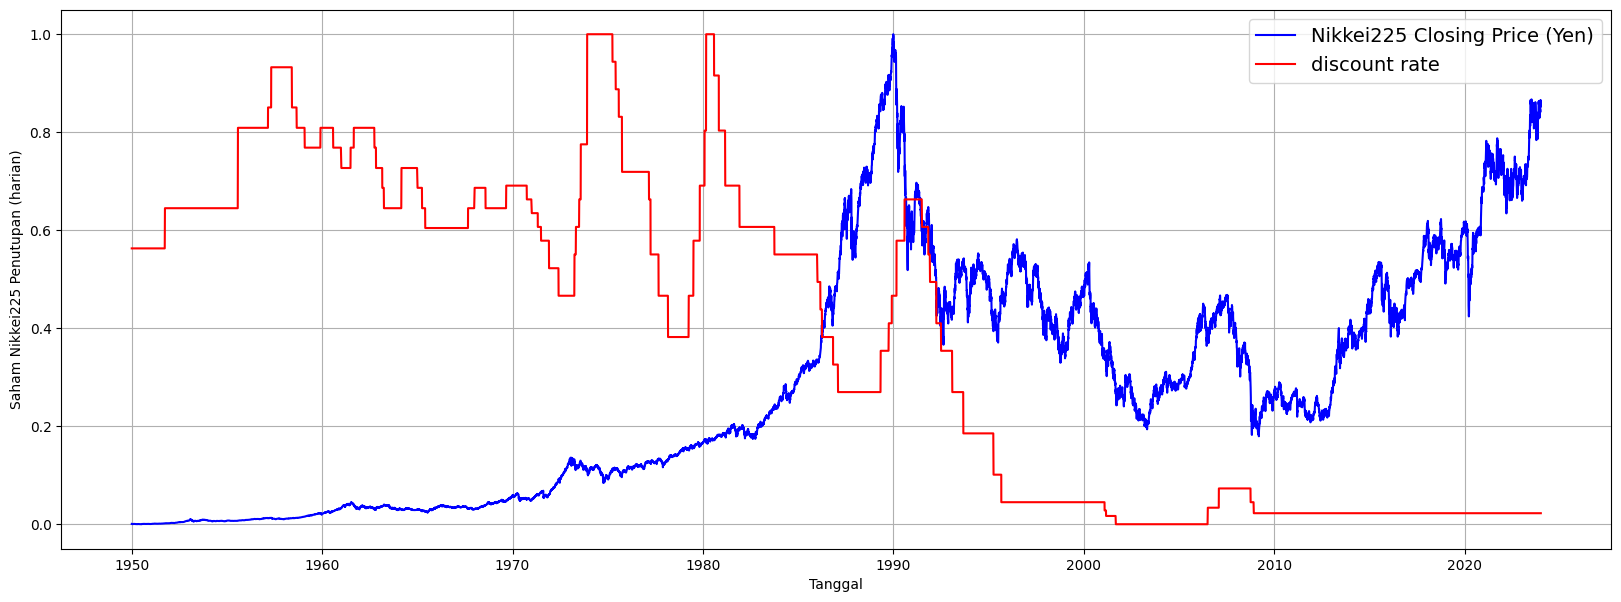

In [42]:
plt.figure(figsize = (20,7))
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = normalized_data[:,0], format = "-", label = "Nikkei225 Closing Price (Yen)", color = 'b')
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = normalized_data[:,1], format = "-", label = "discount rate", color = 'r')



# menghitung korelasi antar time series

In [43]:
normalized_data[:,0].reshape(-1, 1)

array([[6.00299454e-04],
       [5.22525780e-04],
       [4.47842450e-04],
       ...,
       [8.65193242e-01],
       [8.61546120e-01],
       [8.59603066e-01]])

In [44]:
(normalized_data[:,0])

array([6.00299454e-04, 5.22525780e-04, 4.47842450e-04, ...,
       8.65193242e-01, 8.61546120e-01, 8.59603066e-01])

In [45]:
type(normalized_data[:,0])

numpy.ndarray

In [46]:
import numpy as np
# menghitung koefisien korelasi dengan numpy

corr_coef = np.corrcoef(normalized_data[:,0], normalized_data[:,1])
print("Correlation coefficient saham dengan discount rate: \n", corr_coef)


Correlation coefficient saham dengan discount rate: 
 [[ 1.         -0.67440973]
 [-0.67440973  1.        ]]


In [47]:

# menghitung korelasi dengan pandas

corr_matrix = scaled_nikkei225_close_multivariate_df.corr(method = "pearson")
print("Correlation matrix:")
print(corr_matrix)

Correlation matrix:
                     Closing Price (Yen)  discount_rate
Closing Price (Yen)              1.00000       -0.67441
discount_rate                   -0.67441        1.00000


In [48]:
# menghitung korelasi dengan pandas

corr_matrix = scaled_nikkei225_close_multivariate_df.corr(method = "spearman")
print("Correlation matrix:")
print(corr_matrix)

Correlation matrix:
                     Closing Price (Yen)  discount_rate
Closing Price (Yen)             1.000000      -0.688276
discount_rate                  -0.688276       1.000000


In [49]:
# menghitung korelasi dengan pandas

corr_matrix = scaled_nikkei225_close_multivariate_df.corr(method = "kendall")
print("Correlation matrix:")
print(corr_matrix)

Correlation matrix:
                     Closing Price (Yen)  discount_rate
Closing Price (Yen)             1.000000      -0.459433
discount_rate                  -0.459433       1.000000


mungkin plotnya yang ini bisa di zoom supaya keliatan perbedaan data fluktuasi minigguan dan bulanannya

# Membuat dataset multivariate menjadi format sliding window dengan pendekatan multistep multivariate time series forecasting

In [50]:
# Setup dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

SPLIT_SIZE = 0.8 # 80% data untuk train test 20% untuk test size

In [51]:
nikkei225_close_multivariate_df[:2]

Closing Price (Yen) discount_rate
Date                                         
1950-01-04               108.56          5.11
1950-01-05               105.54          5.11

In [52]:
scaled_nikkei225_close_multivariate_df[:2]

Closing Price (Yen)  discount_rate
0             0.000600       0.562921
1             0.000523       0.562921

membuat window dan horizon multivariate

In [53]:
len(scaled_nikkei225_close_multivariate_df)

20040

In [54]:

# データ数
sample_size = len(scaled_nikkei225_close_multivariate_df)
# 予測に用いる期間
train_size = int(sample_size*SPLIT_SIZE)
test_size = sample_size - train_size

In [55]:
sample_size

20040

In [56]:
# データセットを作る関数

import numpy as np

def make_dataset(raw_data, WINDOW_SIZE=7, HORIZON = 1):
    _X = []
    _y = []

    for i in range(len(raw_data) - WINDOW_SIZE - HORIZON + 1):
        _X.append(raw_data[i : i + WINDOW_SIZE])
        _y.append(raw_data[i + WINDOW_SIZE : i + WINDOW_SIZE + HORIZON])
    _X = np.array(_X).reshape(len(_X), WINDOW_SIZE, 1)
    _y = np.array(_y).reshape(len(_y), HORIZON, 1)

    return _X, _y

In [57]:
from sklearn import preprocessing

columns = list(scaled_nikkei225_close_multivariate_df.columns)

# 最小0、最大1に正規化
Xs = []
for i in range(len(columns)):
    Xs.append((scaled_nikkei225_close_multivariate_df[columns[i]]))
Xs = np.array(Xs)

X_nikkei, y_nikkei = make_dataset(Xs[0], WINDOW_SIZE = WINDOW_SIZE, HORIZON = HORIZON)
X_discRate, y_discRate = make_dataset(Xs[1], WINDOW_SIZE = WINDOW_SIZE, HORIZON = HORIZON)


# 多変量LSTM用に各データを結合
X_concat = np.concatenate([X_nikkei, X_discRate], axis=2)
y_concat = np.concatenate([y_nikkei, y_discRate], axis=2)

In [58]:

full_windows = X_concat
full_labels = y_concat

In [59]:
len(full_windows), len(full_labels)

(20033, 20033)

In [60]:
scaled_nikkei225_close_multivariate_df[:13]

Closing Price (Yen)  discount_rate
0              0.000600       0.562921
1              0.000523       0.562921
2              0.000448       0.562921
3              0.000456       0.562921
4              0.000451       0.562921
5              0.000415       0.562921
6              0.000363       0.562921
7              0.000315       0.562921
8              0.000252       0.562921
9              0.000300       0.562921
10             0.000282       0.562921
11             0.000258       0.562921
12             0.000306       0.562921

In [61]:
print(full_windows[0]),
print(full_windows.shape)
print("\n")
print(full_labels[0])
print(full_labels.shape)

[[6.00299454e-04 5.62921348e-01]
 [5.22525780e-04 5.62921348e-01]
 [4.47842450e-04 5.62921348e-01]
 [4.55825841e-04 5.62921348e-01]
 [4.51447852e-04 5.62921348e-01]
 [4.14878774e-04 5.62921348e-01]
 [3.63373029e-04 5.62921348e-01]]
(20033, 7, 2)


[[3.14957629e-04 5.62921348e-01]]
(20033, 1, 2)


In [62]:
print(full_windows[1]),
print(full_windows.shape)
print("\n")
print(full_labels[1])
print(full_labels.shape)

[[5.22525780e-04 5.62921348e-01]
 [4.47842450e-04 5.62921348e-01]
 [4.55825841e-04 5.62921348e-01]
 [4.51447852e-04 5.62921348e-01]
 [4.14878774e-04 5.62921348e-01]
 [3.63373029e-04 5.62921348e-01]
 [3.14957629e-04 5.62921348e-01]]
(20033, 7, 2)


[[2.52120620e-04 5.62921348e-01]]
(20033, 1, 2)


In [63]:
print(full_labels[:3])
(full_labels.shape)

[[[3.14957629e-04 5.62921348e-01]]

 [[2.52120620e-04 5.62921348e-01]]

 [[2.99763434e-04 5.62921348e-01]]]


(20033, 1, 2)

format training atau test data pada **window/fitur** adalah **(jumlah sample, ukuran window, jumlah variable)**

In [64]:
full_windows.shape

(20033, 7, 2)

format training atau test data pada **label** adalah **(jumlah sample, jumlah variabel)** [Hanya memiliki dua dimensi shape jika ingin dengan benar menghasilkan output yang sesuai]

In [65]:
full_labels.shape

(20033, 1, 2)

In [66]:
full_labels = np.squeeze(full_labels)
full_labels.shape

(20033, 2)

In [67]:
full_labels[:3]

array([[3.14957629e-04, 5.62921348e-01],
       [2.52120620e-04, 5.62921348e-01],
       [2.99763434e-04, 5.62921348e-01]])

Membagi data menjadi training dataset dan test data set. Pembagian data menjadi train dan test dengan train series split dimana Test dataset akan menggunakan data yang pseusdo future (data yang seakan2 berperan dari masa depan).

In [68]:
(sample_size), (train_size), (test_size)

(20040, 16032, 4008)

In [69]:
train_size

16032

In [70]:
train_windows = full_windows[:train_size]
test_windows = full_windows[train_size:]

train_labels = full_labels[:train_size]
test_labels = full_labels[train_size:]

In [71]:
len(full_windows), len(train_windows), len(test_windows)

(20033, 16032, 4001)

In [72]:
"windows", train_windows[12393:], "Labels",train_labels[12393:]

('windows',
 array([[[0.43225063, 0.35393258],
         [0.42059076, 0.35393258],
         [0.42110736, 0.35393258],
         ...,
         [0.41955756, 0.35393258],
         [0.41836932, 0.35393258],
         [0.41404799, 0.35393258]],
 
        [[0.42059076, 0.35393258],
         [0.42110736, 0.35393258],
         [0.4180438 , 0.35393258],
         ...,
         [0.41836932, 0.35393258],
         [0.41404799, 0.35393258],
         [0.40968262, 0.35393258]],
 
        [[0.42110736, 0.35393258],
         [0.4180438 , 0.35393258],
         [0.41955756, 0.35393258],
         ...,
         [0.41404799, 0.35393258],
         [0.40968262, 0.35393258],
         [0.42990789, 0.35393258]],
 
        ...,
 
        [[0.42952804, 0.07303371],
         [0.43045411, 0.07303371],
         [0.43160166, 0.07303371],
         ...,
         [0.41367457, 0.07303371],
         [0.3911457 , 0.07303371],
         [0.40296112, 0.07303371]],
 
        [[0.43045411, 0.07303371],
         [0.43160166, 0.073033

In [73]:
"windows", test_windows[:2], "Labels",test_labels[:2]

('windows',
 array([[[0.42209885, 0.07303371],
         [0.41367457, 0.07303371],
         [0.3911457 , 0.07303371],
         [0.40296112, 0.07303371],
         [0.40730975, 0.07303371],
         [0.40729172, 0.07303371],
         [0.41799667, 0.07303371]],
 
        [[0.41367457, 0.07303371],
         [0.3911457 , 0.07303371],
         [0.40296112, 0.07303371],
         [0.40730975, 0.07303371],
         [0.40729172, 0.07303371],
         [0.41799667, 0.07303371],
         [0.41626222, 0.07303371]]]),
 'Labels',
 array([[0.41626222, 0.07303371],
        [0.41761218, 0.07303371]]))

# LANJUT BIKIN FUNGSI EVALUASI DAN BIKIN MODEL

# Membuat fungsi untuk melakukan evaluasi regression problem

fungsi digunakan untuk menguji prediksi model dengan nilai sebenarnya dan menghasilkan nilai evaluasi masing-masing metrik

In [74]:
import tensorflow as tf


sehingga yang dilakukan dengan tf.reduce_mean adalah melakukan agregasi ke banyak nilai mae akibat dari horizon yang ukurannya lebih dari satu menjadi satu single value seperti yang dilakukan tensorflow

tf.reduce_mean mampu menghasilkan satu nilai mae yang sudah direratakan dan hasilnya sama dengan yang dihitung dari model saat evaluasi metrik MAE-nya dengan .evaluate, menghasilkan nilai MAE yang sama-sama 892.1709

In [75]:
def evaluate_preds(y_true, y_pred):
  #Pastikan data yang diproses dengan library tensorflow bertipe float32
  y_true = tf.cast(y_true, dtype = tf.float32) #karena metrik evaluasi dari library tensorflow bisa
  y_pred = tf.cast(y_pred, dtype = tf.float32) #memunculkan error jika tipe bukan float32

  y_true = tf.squeeze(y_true)
  y_pred = tf.squeeze(y_pred)

  # menghitung metrik evaluasi regression problem
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  # mape akan digunakan, yang disarankan jangan digunakan adalah sMAPE
  #mase = mean_absolute_scaled_error(y_true, y_pred) #tidak digunakan

  # kalkulasi nilai R-square
  from sklearn.metrics import r2_score
  Rsquare = r2_score(y_true, y_pred)



  # memperhitungkan berbagai ukuran metrics
  # (artinya untuk horizon yang lebih besar akan menghasilkan metrics (ex: MAE) yang berukuran dimensi lebih besar,
  # sehingga perlu di lakukan tf.reduce_mean lebih lanjut supaya menghasilkan single value metrics)

  # Calculate various metrics
  # (meaning for larger horizon will produce metrics (ex: MAE) with larger dimension,
  # so tf.reduce_mean is needed to produce single value metrics)
  if mae.ndim>0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    #Rsquare = tf.reduce_mean(Rsquare)
    mape = tf.reduce_mean(mape)
    #mase = tf.reduce_mean(mase)

    # Calculate R-square value
    from sklearn.metrics import r2_score
    Rsquare = np.mean([r2_score(y_true[:, i], y_pred[:, i]) for i in range(y_true.shape[1])])

  return {"mae" : mae.numpy(), #ditampilkan dalam bentuk numpy bukan tensor
          "mse" : mse.numpy(),
          "rmse" : rmse.numpy(),
          "mape" : mape.numpy(),
          #"mase" : mase.numpy(),
          "R-square" : Rsquare}


# membuat modelling checkpoint

karena model akan belajar terus menerus pada masing-masing epoch, diantara epoch-epoch tersebut dapat menghasilkan pembelajaran terbaik tidak hanya di eopch terakhir saja. Maka dari itu, epoch yang memiliki hasil terbaik akan di simpan selama training.  

Dengan menyimpan epoch yang terbaik, model yang akan dibuat adalah model yang terbaik dan dapat dibandingkan dengan model terbaik lainnya secara adil.

Untuk membuat modelling checkpoint callback digunakan: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint

In [76]:
# membuat modelling checkpoint

import os # membuat folder untuk menyimpan best model

# mmebuat function untuk implementasi ModelCheckpoint callback
def create_model_checkpoint(model_name, save_path = "/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_model_best_epoch"):
  return tf.keras.callbacks.ModelCheckpoint(filepath = os.path.join(save_path, model_name),
                                                                    monitor = "val_loss",
                                                                    verbose = 1,
                                                                    save_best_only = True)

In [77]:
train_windows.shape

(16032, 7, 2)

In [78]:
train_windows[0:2]

array([[[6.00299454e-04, 5.62921348e-01],
        [5.22525780e-04, 5.62921348e-01],
        [4.47842450e-04, 5.62921348e-01],
        [4.55825841e-04, 5.62921348e-01],
        [4.51447852e-04, 5.62921348e-01],
        [4.14878774e-04, 5.62921348e-01],
        [3.63373029e-04, 5.62921348e-01]],

       [[5.22525780e-04, 5.62921348e-01],
        [4.47842450e-04, 5.62921348e-01],
        [4.55825841e-04, 5.62921348e-01],
        [4.51447852e-04, 5.62921348e-01],
        [4.14878774e-04, 5.62921348e-01],
        [3.63373029e-04, 5.62921348e-01],
        [3.14957629e-04, 5.62921348e-01]]])

In [79]:
train_labels[0:2]

array([[3.14957629e-04, 5.62921348e-01],
       [2.52120620e-04, 5.62921348e-01]])

In [80]:
train_labels.shape

(16032, 2)

In [81]:
test_windows.shape

(4001, 7, 2)

In [82]:
test_labels.shape

(4001, 2)

In [83]:
# keterangan jumlah feature
test_labels.shape[1]

2

Mulai membuat model Keras

In [84]:
import tensorflow as tf
from tensorflow.keras import layers

In [85]:
from keras import Model
from keras.layers import Input, Dense, Bidirectional, LSTM, RepeatVector, TimeDistributed
from sklearn.preprocessing import MinMaxScaler
from numpy import array, hstack
import numpy as np

# Model 1: Conv1D

In [86]:
!pip install keras-tuner


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.8 MB/s eta 0:00:00


In [87]:
import tensorflow as tf
from tensorflow import keras
from kerastuner.tuners import RandomSearch


<ipython-input-87-b420bea64af7>:3: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [88]:
# import library untuk mmebuat model

import tensorflow as tf
from tensorflow.keras import layers

In [89]:
train_windows.shape

(16032, 7, 2)

In [90]:
train_labels.shape

(16032, 2)

In [91]:
test_windows.shape

(4001, 7, 2)

In [ ]:
test_labels.shape

(4001, 2)

In [ ]:
test_labels.shape[1]

2

## Tuner Builder

In [108]:
#create Conv1D model
def model_Conv1D_multi_builder(hp):
  tf.random.set_seed(42)

  model_1 = tf.keras.models.Sequential([


      #layers.Lambda(lambda x: tf.expand_dims(x, axis = 1)),
      tf.keras.layers.Conv1D(filters = hp.Int('conv1D_n_filters', min_value=32, max_value=256, step=32),
                             kernel_size = hp.Int('conv1D_kernel_size', min_value=5, max_value=10, step=1),
                             strides = 1,
                             padding ="causal",
                             activation = "relu",
                             input_shape=[train_windows.shape[1], train_windows.shape[2]]),

      tf.keras.layers.GlobalMaxPooling1D(),  # Add GlobalMaxPooling1D layer
      tf.keras.layers.Dense(test_labels.shape[1])
      #filters adalah jumlah hidden unit dalam layers tersebut
      # kernel size adalah ukuran dari window. Ex: kernel_size = 7 artinya melihat 7 value sekaligus
      # default nilai strides = 1, ini sudah sesuai karena sliding window bergeser satu timesteps
  ], name = "model_1_conv1D_multivariate")

  #compile model 1
  model_1.compile(loss="mae",
                  optimizer = tf.keras.optimizers.Adam(hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])))

  return model_1


In [109]:
import keras_tuner as kt

tuner_Conv1D_multi = kt.Hyperband(model_Conv1D_multi_builder,
                     objective='val_loss',
                     max_epochs=10,
                     factor=3,
                     directory='/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_tuning_logs',
                     project_name='Conv1D_multivariate')

Reloading Tuner from /content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_tuning_logs/Conv1D_multivariate/tuner0.json


## Proses tuning


In [110]:
tuner_Conv1D_multi.search(train_windows,
                          train_labels,
                          epochs=10,
                          validation_data=(test_windows, test_labels),
                          batch_size = 128)

## Hasil parameter tuning terbaik

In [111]:
tuner_Conv1D_multi.get_best_hyperparameters(num_trials=1)[0]

In [112]:
# Get the optimal hyperparameters
best_hps=tuner_Conv1D_multi.get_best_hyperparameters(num_trials=1)[0]

tuning = ['conv1D_n_filters', 'conv1D_kernel_size', 'learning_rate']
print('Best tune model Conv1D multivariate:')
for tune in tuning:
  print(f'{tune}: {best_hps.get(tune)}')

Best tune model Conv1D multivariate:
conv1D_n_filters: 256
conv1D_kernel_size: 8
learning_rate: 0.001


## Hasil semua parameter tuning

In [113]:
tuning =['conv1D_n_filters', 'conv1D_kernel_size', 'learning_rate']
hps_dict = dict(zip(tuning, [[] for _ in range(len(tuning))]))

hps_all =tuner_Conv1D_multi.get_best_hyperparameters(num_trials=30)
for hps in hps_all:
  for t in tuning:
    hps_dict[t].append(hps.get(t))

df_hyparam = pd.DataFrame(hps_dict)
df_hyparam.to_csv('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_best_hyperparameter_models/hp_Conv1D_multi.csv')
df_hyparam


conv1D_n_filters  conv1D_kernel_size  learning_rate
0                256                   8         0.0010
1                160                   5         0.0010
2                160                   9         0.0010
3                160                   5         0.0010
4                256                   8         0.0010
5                256                   8         0.0010
6                160                   5         0.0100
7                 64                   5         0.0010
8                 32                  10         0.0001
9                 32                   8         0.0010
10                64                   5         0.0010
11               160                   9         0.0010
12               160                   6         0.0010
13                64                   8         0.0010
14               160                   9         0.0010
15               224                   5         0.0001
16                32                   8         0.0010
17               256                   5         0.0100
18               192                  10         0.0001
19                64                   8         0.0010
20               192                   7         0.0100
21               256                  10         0.0010
22                96                   7         0.0010
23                64                   6         0.0010
24               128                   6         0.0010
25               192                   6         0.0001
26               128                   6         0.0001
27                96                   9         0.0001
28                64                   7         0.0001
29                32                   6         0.0001

In [ ]:
tuner_Conv1D_multi.results_summary(num_trials=30)

Results summary
Results in /content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_tuning_logs/Conv1D_multivariate
Showing 30 best trials
Objective(name="val_loss", direction="min")

Trial 0016 summary
Hyperparameters:
conv1D_n_filters: 256
conv1D_kernel_size: 8
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0012
Score: 0.004418484400957823

Trial 0024 summary
Hyperparameters:
conv1D_n_filters: 160
conv1D_kernel_size: 5
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0022
Score: 0.00511303823441267

Trial 0017 summary
Hyperparameters:
conv1D_n_filters: 160
conv1D_kernel_size: 9
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0014
Score: 0.005136299412697554

Trial 0022 summary
Hyperparameters:
conv1D_n_filters: 160
conv1D_kernel_size: 5
learning_rate: 0.001
tuner/epochs: 4
tuner/initial_epoch: 0
tuner/brac

## Mengimplementasikan hyperparameter terbaik ke model

In [114]:
# best hyperparameter digunakan untuk hyperparameter model yang dibuat
model_1 = tuner_Conv1D_multi.hypermodel.build(best_hps)

## Melatih model

In [115]:
from tensorflow.keras.models import load_model

# Load the saved model
model_1 = load_model("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_saved_models/model_1_Conv1D_multivariate.h5")

In [ ]:
# fit
history = model_1.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs = 50,
            verbose = 1,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_1.name)])

Epoch 1/50
125/126 [============================>.] - ETA: 0s - loss: 0.0267
Epoch 1: val_loss improved from inf to 0.00869, saving model to /content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_model_best_epoch/model_1_conv1D_multivariate
126/126 [==============================] - 3s 22ms/step - loss: 0.0266 - val_loss: 0.0087
Epoch 2/50
118/126 [===========================>..] - ETA: 0s - loss: 0.0062
Epoch 2: val_loss improved from 0.00869 to 0.00857, saving model to /content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_model_best_epoch/model_1_conv1D_multivariate
126/126 [==============================] - 1s 11ms/step - loss: 0.0063 - val_loss: 0.0086
Epoch 3/50
123/126 [============================>.] - ETA: 0s - loss: 0.0065
Epoch 3: val_loss improved from 0.00857 to 0.00643, saving model to /content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_model_best_epoch/model_1_conv1D_multivariate
126/126 [==============================] - 1s 11ms/step - loss: 0.0065 - val_loss: 0.0064

visualisasi model shape

In [ ]:
model_1.summary()

Model: "model_1_conv1D_multivariate"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 7, 256)            4352      
                                                                 
 global_max_pooling1d (Glob  (None, 256)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense_3 (Dense)             (None, 2)                 514       
                                                                 
Total params: 4866 (19.01 KB)
Trainable params: 4866 (19.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


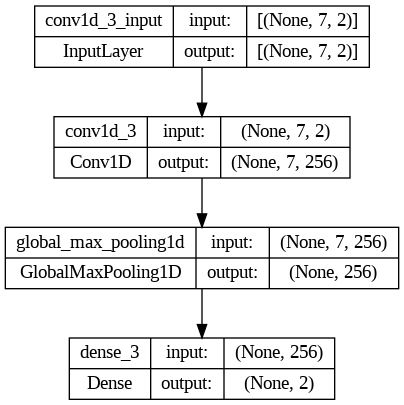

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model_1, to_file='/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_model_plot/model_Conv1D_multi_shape.png', show_shapes=True, show_layer_names=True)


visualisasi loss setiap epoch

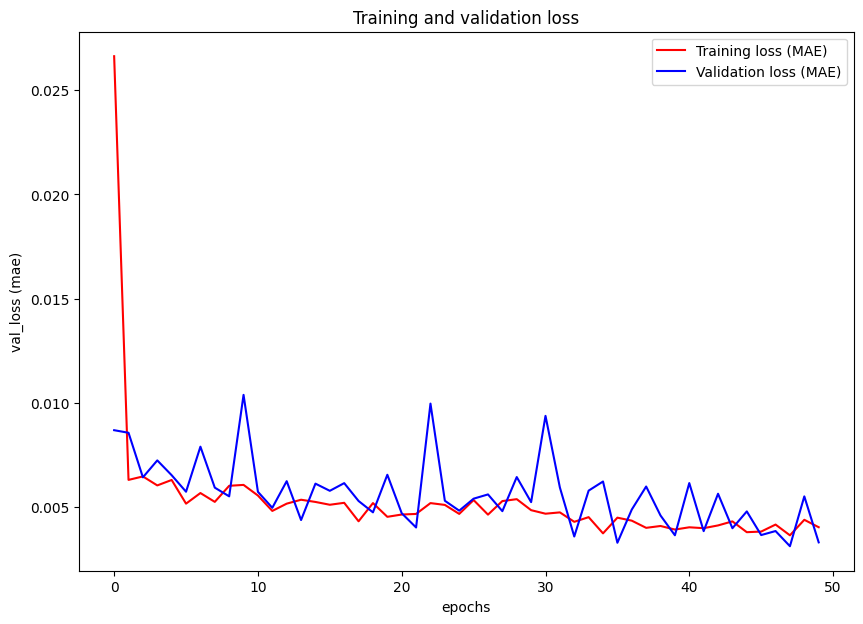

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
plt.figure(figsize = (10,7))
loss = history.history[ 'loss' ]
val_loss = history.history['val_loss' ]
epochs = range(len(loss)) # Get number of epochs
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label='Training loss (MAE)')
plt.plot(epochs, val_loss, 'b', label='Validation loss (MAE)')
plt.ylabel("val_loss (mae)")
plt.xlabel("epochs")
plt.title ('Training and validation loss')
plt.legend(loc=0)



# simpan visualisasi loss per epoch menjadi image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_model_loss_visualization/loss_Conv1D_multi.png')


# Membuat DataFrame loss dan val_loss
df_loss = pd.DataFrame({
    'Epoch': epochs,
    'Training Loss': loss,
    'Validation Loss': val_loss
})

# simpan visualisasi loss per epoch menjadi CSV file
df_loss.to_csv('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_model_loss_value_per_epoch/loss_Conv1D_multi.csv', index=False)


In [ ]:
# mengevaluasi model 1 dari epochs terakhir
model_1.evaluate(test_windows, test_labels)

126/126 [==============================] - 0s 2ms/step - loss: 0.0031


0.003125428222119808

In [116]:
# mengevaluasi dan load model 1 pada best epoch yang loss mae paling kecil sepanjang training

model_1 = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_model_best_epoch/model_1_conv1D_multivariate")
model_1.evaluate(test_windows, test_labels)


126/126 [==============================] - 0s 2ms/step - loss: 0.0031


0.003125428222119808

In [117]:
# membuat predicted value berdasarkan model multivariate model_1 yang sudah di train

model_1_preds = tf.squeeze(model_1.predict(test_windows))
model_1_preds


126/126 [==============================] - 0s 3ms/step


<tf.Tensor: shape=(4001, 2), dtype=float32, numpy=
array([[0.41201103, 0.07432922],
       [0.41447678, 0.07371814],
       [0.4155365 , 0.07317321],
       ...,
       [0.8523878 , 0.0222933 ],
       [0.85671365, 0.02232064],
       [0.8586569 , 0.02243168]], dtype=float32)>

## Denormalisasi nilai output prediksi dan test_labels

In [118]:
denormalized_model_1_preds = scaler_multivariate.inverse_transform(model_1_preds)
denormalized_test_labels = scaler_multivariate.inverse_transform(test_labels)

In [119]:
# mengukur predicted value kedua time series dengan metrik evaluasi regresion problem

model_1_results = evaluate_preds(y_true = denormalized_test_labels,
                                 y_pred = denormalized_model_1_preds)

model_1_results

{'mae': 111.72538,
 'mse': 49773.523,
 'rmse': 158.00044,
 'mape': 1.3397478,
 'R-square': 0.994815273095687}

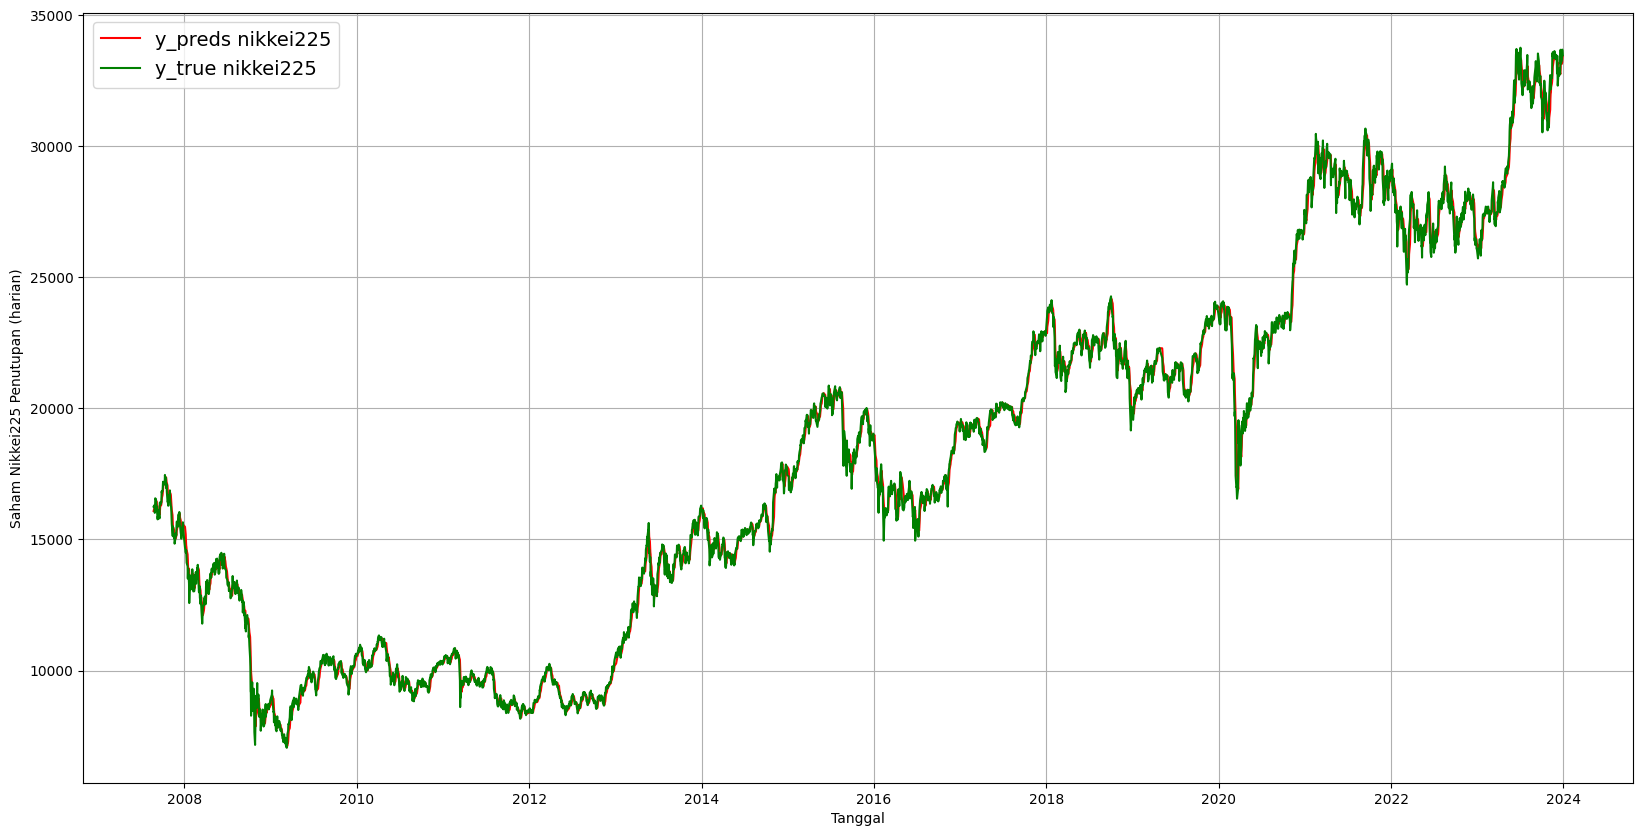

In [ ]:
plt.figure(figsize = (20,10))
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_model_1_preds[:,0], format = "-", label = "y_preds nikkei225", color = 'r')
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_test_labels[:,0], format = "-", label = "y_true nikkei225", color = 'g')


# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_visualisasi_prediksi_time_series/model_1_plot_prediksi_Conv1D_multi.png')

simpan model trained ke bentuk .h5

In [ ]:
from tensorflow.keras.models import save_model

# menyimpan model menjadi .h5 file
save_model(model_1, "/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_saved_models/model_1_Conv1D_multivariate.h5")

<ipython-input-173-243f5a9ad634>:4: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model_1, "/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_saved_models/model_1_Conv1D_multivariate.h5")


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model_1 = load_model("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_saved_models/model_1_Conv1D_multivariate.h5")

# Model 2 : LSTM

In [ ]:
train_windows.shape[2]

2

## Tuner Builder

In [121]:
# membuat model LSTM dengan hyperparameter tuning

def model_LSTM_multi_builder(hp):
  tf.random.set_seed(42)

  model_2 = tf.keras.models.Sequential([
          tf.keras.layers.LSTM(units = hp.Int('lstm_n_units', min_value=32, max_value=256, step=32),
                               input_shape=(train_windows.shape[1], train_windows.shape[2]),
                               return_sequences = False,
                               activation = "relu"),

          #tf.keras.layers.Dropout(0.2),
          #tf.keras.layers.LSTM(128, return_sequences=False, activation = "relu"),

          tf.keras.layers.Dense(test_labels.shape[1])
          ], name = "model_2_LSTM_multivariate")



  #compile model 2
  model_2.compile(loss="mae",
                  optimizer = tf.keras.optimizers.Adam(hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])))

  return model_2

In [122]:
import keras_tuner as kt

tuner_LSTM_multi = kt.Hyperband(model_LSTM_multi_builder,
                     objective='val_loss',
                     max_epochs=10,
                     factor=3,
                     directory='/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_tuning_logs',
                     project_name='LSTM_multivariate')

Reloading Tuner from /content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_tuning_logs/LSTM_multivariate/tuner0.json


## Proses tuning


In [123]:
tuner_LSTM_multi.search(train_windows,
                        train_labels,
                        epochs=10,
                        validation_data=(test_windows, test_labels),
                        batch_size = 128)

## Hasil parameter tuning terbaik

In [124]:
tuner_Conv1D_multi.get_best_hyperparameters(num_trials=1)[0]

In [125]:
# Get the optimal hyperparameters
best_hps=tuner_LSTM_multi.get_best_hyperparameters(num_trials=1)[0]

tuning = ['lstm_n_units', 'learning_rate']
print('Best tune model LSTM multivariate:')
for tune in tuning:
  print(f'{tune}: {best_hps.get(tune)}')

Best tune model LSTM multivariate:
lstm_n_units: 128
learning_rate: 0.001


## Hasil semua parameter tuning

In [126]:
tuning =['lstm_n_units', 'learning_rate']
hps_dict = dict(zip(tuning, [[] for _ in range(len(tuning))]))

hps_all =tuner_LSTM_multi.get_best_hyperparameters(num_trials=30)
for hps in hps_all:
  for t in tuning:
    hps_dict[t].append(hps.get(t))

df_hyparam = pd.DataFrame(hps_dict)
df_hyparam.to_csv('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_best_hyperparameter_models/hp_LSTM_multi.csv')
df_hyparam


lstm_n_units  learning_rate
0            128         0.0010
1            224         0.0010
2             32         0.0100
3            256         0.0100
4             96         0.0100
5             96         0.0010
6            128         0.0100
7            160         0.0100
8            160         0.0100
9            128         0.0010
10           128         0.0010
11           224         0.0010
12            96         0.0010
13           224         0.0010
14           256         0.0010
15           256         0.0010
16           192         0.0010
17            32         0.0010
18            32         0.0100
19           160         0.0010
20            64         0.0100
21           224         0.0100
22            96         0.0001
23           192         0.0100
24           128         0.0001
25           256         0.0001
26           224         0.0001
27           192         0.0001
28            64         0.0001
29            32         0.0001

In [ ]:
tuner_LSTM_multi.results_summary(num_trials=30)

Results summary
Results in /content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_tuning_logs/LSTM_multivariate
Showing 30 best trials
Objective(name="val_loss", direction="min")

Trial 0016 summary
Hyperparameters:
lstm_n_units: 128
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0013
Score: 0.00553638581186533

Trial 0017 summary
Hyperparameters:
lstm_n_units: 224
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0014
Score: 0.005660439375787973

Trial 0006 summary
Hyperparameters:
lstm_n_units: 32
learning_rate: 0.01
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 2
tuner/round: 0
Score: 0.0057568238116800785

Trial 0029 summary
Hyperparameters:
lstm_n_units: 256
learning_rate: 0.01
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.005827051121741533

Trial 0026 summary
Hyperparameters:
lstm_n_units: 96
learning_rate: 0.01
tuner

## Mengimplementasikan hyperparameter terbaik ke model

In [127]:
# best hyperparameter digunakan untuk hyperparameter model yang dibuat
model_2 = tuner_LSTM_multi.hypermodel.build(best_hps)

## Melatih model

In [128]:
from tensorflow.keras.models import load_model

# Load the saved model
model_2 = load_model("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_saved_models/model_2_LSTM_multivariate.h5")

In [ ]:

# fit
history = model_2.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs = 50,
            verbose = 1,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_2.name)])

Epoch 1/50
124/126 [============================>.] - ETA: 0s - loss: 0.0735
Epoch 1: val_loss improved from inf to 0.01080, saving model to /content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_model_best_epoch/model_2_LSTM_multivariate
126/126 [==============================] - 10s 59ms/step - loss: 0.0728 - val_loss: 0.0108
Epoch 2/50
125/126 [============================>.] - ETA: 0s - loss: 0.0053
Epoch 2: val_loss improved from 0.01080 to 0.00763, saving model to /content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_model_best_epoch/model_2_LSTM_multivariate
126/126 [==============================] - 11s 84ms/step - loss: 0.0053 - val_loss: 0.0076
Epoch 3/50
125/126 [============================>.] - ETA: 0s - loss: 0.0049
Epoch 3: val_loss improved from 0.00763 to 0.00675, saving model to /content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_model_best_epoch/model_2_LSTM_multivariate
126/126 [==============================] - 12s 95ms/step - loss: 0.0050 - val_loss: 0.0067
Ep

visualisasi model shape

In [ ]:
model_2.summary()

Model: "model_2_LSTM_multivariate"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 128)               67072     
                                                                 
 dense_4 (Dense)             (None, 2)                 258       
                                                                 
Total params: 67330 (263.01 KB)
Trainable params: 67330 (263.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


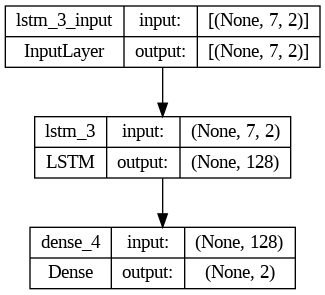

In [ ]:

from tensorflow.keras.utils import plot_model

plot_model(model_2, to_file='/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_model_plot/model_LSTM_multi_shape.png', show_shapes=True, show_layer_names=True)


visualisasi loss setiap epoch

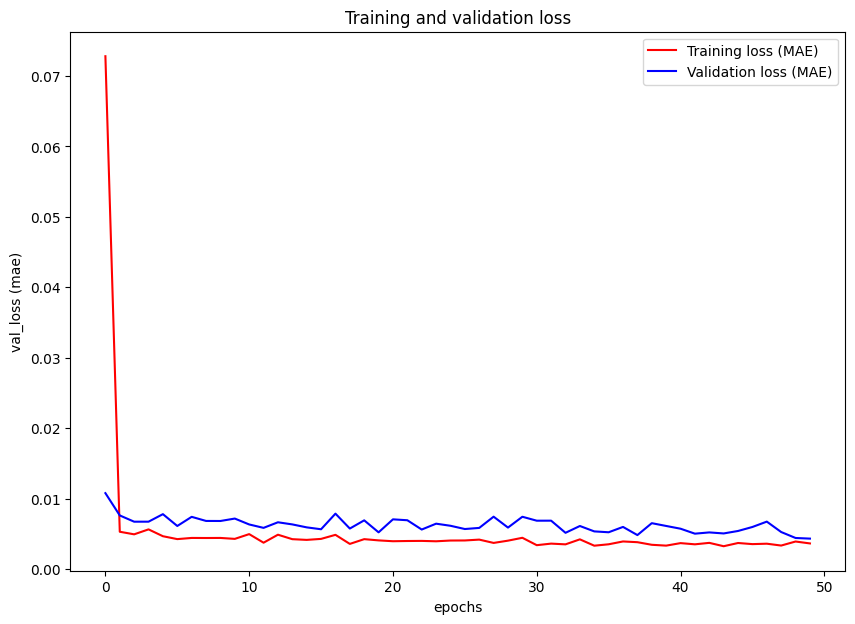

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
plt.figure(figsize = (10,7))
loss = history.history[ 'loss' ]
val_loss = history.history['val_loss' ]
epochs = range(len(loss)) # Get number of epochs
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label='Training loss (MAE)')
plt.plot(epochs, val_loss, 'b', label='Validation loss (MAE)')
plt.ylabel("val_loss (mae)")
plt.xlabel("epochs")
plt.title ('Training and validation loss')
plt.legend(loc=0)


# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_model_loss_visualization/loss_LSTM_multi.png')


# Membuat DataFrame loss dan val_loss
df_loss = pd.DataFrame({
    'Epoch': epochs,
    'Training Loss': loss,
    'Validation Loss': val_loss
})

# simpan visualisasi loss per epoch menjadi CSV file
df_loss.to_csv('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_model_loss_value_per_epoch/loss_LSTM_multi.csv', index=False)


In [ ]:
# mengevaluasi model 2 dari epochs terakhir
model_2.evaluate(test_windows, test_labels)

126/126 [==============================] - 1s 5ms/step - loss: 0.0043


0.004345092456787825

In [129]:
# mengevaluasi dan load model 2 pada best epoch yang loss mae paling kecil sepanjang training

model_2 = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_model_best_epoch/model_2_LSTM_multivariate")
model_2.evaluate(test_windows, test_labels)


126/126 [==============================] - 1s 7ms/step - loss: 0.0043


0.004345092456787825

In [130]:
# membuat predicted value berdasarkan model multivariate model_2 yang sudah di train

model_2_preds = tf.squeeze(model_2.predict(test_windows))
model_2_preds



126/126 [==============================] - 1s 5ms/step


<tf.Tensor: shape=(4001, 2), dtype=float32, numpy=
array([[0.4117793 , 0.07309403],
       [0.4136628 , 0.07331401],
       [0.41574144, 0.0734387 ],
       ...,
       [0.843727  , 0.02886615],
       [0.8474439 , 0.02877034],
       [0.8488693 , 0.02893674]], dtype=float32)>

In [131]:
model_2_preds[:,1]

<tf.Tensor: shape=(4001,), dtype=float32, numpy=
array([0.07309403, 0.07331401, 0.0734387 , ..., 0.02886615, 0.02877034,
       0.02893674], dtype=float32)>

## Denormalisasi nilai output prediksi dan test_labels

In [132]:
denormalized_model_2_preds = scaler_multivariate.inverse_transform(model_2_preds)
denormalized_test_labels = scaler_multivariate.inverse_transform(test_labels)

In [133]:
# mengukur predicted value kedua time series dengan metrik evaluasi regresion problem

model_2_results = evaluate_preds(y_true = denormalized_test_labels,
                                 y_pred = denormalized_model_2_preds)

model_2_results

{'mae': 126.6477,
 'mse': 62483.08,
 'rmse': 179.09326,
 'mape': 3.9060373,
 'R-square': 0.9703662837354448}

In [134]:
tf.squeeze(test_labels[:,0])

<tf.Tensor: shape=(4001,), dtype=float64, numpy=
array([0.41626222, 0.41761218, 0.41725422, ..., 0.86519324, 0.86154612,
       0.85960307])>

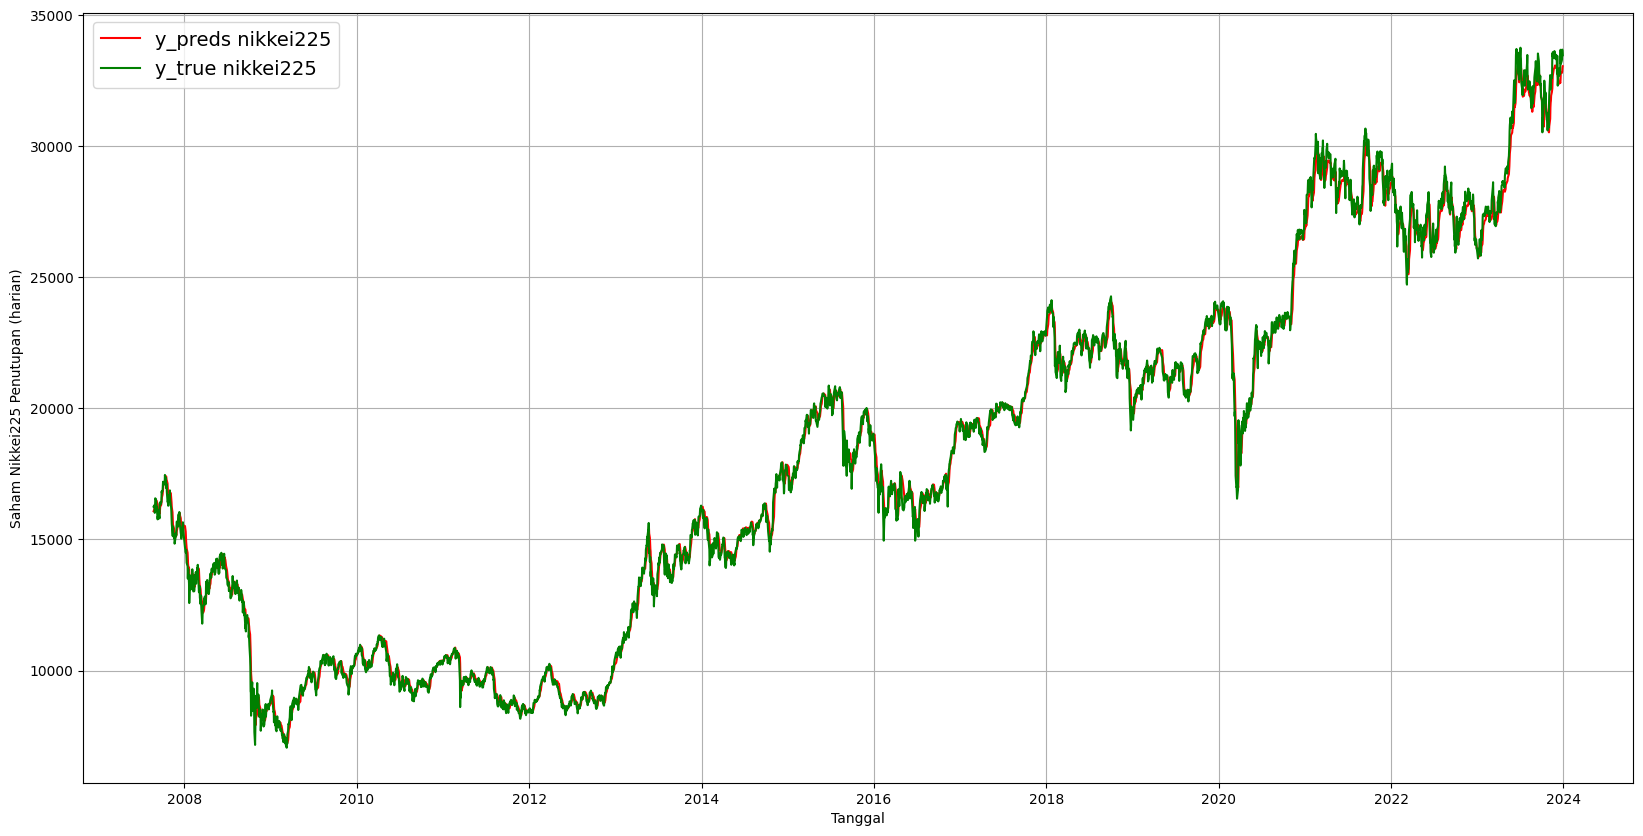

In [ ]:
plt.figure(figsize = (20,10))
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_model_2_preds[:,0], format = "-", label = "y_preds nikkei225", color = 'r')
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_test_labels[:,0], format = "-", label = "y_true nikkei225", color = 'g')


# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_visualisasi_prediksi_time_series/model_2_plot_prediksi_LSTM_multi.png')

simpan model trained ke bentuk .h5

In [ ]:
from tensorflow.keras.models import save_model

# menyimpan model menjadi .h5 file
save_model(model_2, "/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_saved_models/model_2_LSTM_multivariate.h5")

<ipython-input-197-a0c8b3408bed>:4: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model_2, "/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_saved_models/model_2_LSTM_multivariate.h5")


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model_2 = load_model("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_saved_models/model_2_LSTM_multivariate.h5")

# Model 3 : Stacked LSTM

In [92]:
train_windows.shape[2]

2

## Tuner Builder

In [93]:
# model stacked LSTM dengan hyperparameter tuning

def model_stacked_LSTM_multi_builder(hp):
  tf.random.set_seed(42)

  model_3 = tf.keras.models.Sequential([
          tf.keras.layers.LSTM(units =  hp.Int('lstm_n_units_1', min_value=32, max_value=256, step=32),
                               input_shape=(train_windows.shape[1], train_windows.shape[2]),
                               return_sequences = True,
                               activation = "relu"),

          #tf.keras.layers.Dropout(0.2, seed=42),
          tf.keras.layers.LSTM(units = hp.Int('lstm_n_units_2', min_value=32, max_value=256, step=32),
                               return_sequences = False,
                               activation = "relu"),

          #tf.keras.layers.LSTM(128, return_sequences=False, activation = "relu"),

          tf.keras.layers.Dense(test_labels.shape[1])
          ], name = "model_3_stackedLSTM_multivariate")



  #compile model 3
  model_3.compile(loss="mae",
                  optimizer = tf.keras.optimizers.Adam(hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])))

  return model_3

In [94]:
import keras_tuner as kt

tuner_stackedLSTM_multi = kt.Hyperband(model_stacked_LSTM_multi_builder,
                     objective='val_loss',
                     max_epochs=10,
                     factor=3,
                     directory='/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_tuning_logs',
                     project_name='stackedLSTM_multivariate')

Reloading Tuner from /content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_tuning_logs/stackedLSTM_multivariate/tuner0.json


## Proses tuning


In [95]:
tuner_stackedLSTM_multi.search(train_windows,
                               train_labels,
                               epochs=10,
                               validation_data=(test_windows, test_labels),
                               batch_size = 128)

## Hasil parameter tuning terbaik

In [96]:
# Get the optimal hyperparameters
best_hps=tuner_stackedLSTM_multi.get_best_hyperparameters(num_trials=1)[0]

tuning = ['lstm_n_units_1', "lstm_n_units_2", 'learning_rate']
print('Best tune model stacked LSTM multivariate:')
for tune in tuning:
  print(f'{tune}: {best_hps.get(tune)}')

Best tune model stacked LSTM multivariate:
lstm_n_units_1: 96
lstm_n_units_2: 64
learning_rate: 0.001


## Hasil semua parameter tuning

In [97]:
tuning = ['lstm_n_units_1', "lstm_n_units_2", 'learning_rate']
hps_dict = dict(zip(tuning, [[] for _ in range(len(tuning))]))

hps_all=tuner_stackedLSTM_multi.get_best_hyperparameters(num_trials=30)
for hps in hps_all:
  for t in tuning:
    hps_dict[t].append(hps.get(t))

df_hyparam = pd.DataFrame(hps_dict)
df_hyparam.to_csv('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_best_hyperparameter_models/hp_Stacked_LSTM_multi.csv')
df_hyparam




lstm_n_units_1  lstm_n_units_2  learning_rate
0               96              64         0.0010
1              256              32         0.0001
2              128              64         0.0100
3              224             160         0.0001
4              192              96         0.0010
5              224             224         0.0010
6              192             224         0.0100
7              192             128         0.0010
8              256              32         0.0001
9               96              64         0.0010
10              64              32         0.0010
11             192              96         0.0010
12              96              64         0.0010
13             256             192         0.0001
14             224             224         0.0010
15             192             192         0.0010
16             224             224         0.0001
17             192             192         0.0010
18             224             224         0.0010
19              64             160         0.0010
20              96             128         0.0010
21             128             128         0.0010
22             192             160         0.0100
23             160             256         0.0010
24              32             128         0.0100
25             256             160         0.0001
26             128              96         0.0100
27             128             192         0.0100
28             192             224         0.0100
29              64             128         0.0001

In [98]:
tuner_stackedLSTM_multi.results_summary(num_trials=30)

Results summary
Results in /content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_tuning_logs/stackedLSTM_multivariate
Showing 30 best trials
Objective(name="val_loss", direction="min")

Trial 0016 summary
Hyperparameters:
lstm_n_units_1: 96
lstm_n_units_2: 64
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0013
Score: 0.006552049890160561

Trial 0024 summary
Hyperparameters:
lstm_n_units_1: 256
lstm_n_units_2: 32
learning_rate: 0.0001
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0018
Score: 0.006565860938280821

Trial 0026 summary
Hyperparameters:
lstm_n_units_1: 128
lstm_n_units_2: 64
learning_rate: 0.01
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.00707718962803483

Trial 0029 summary
Hyperparameters:
lstm_n_units_1: 224
lstm_n_units_2: 160
learning_rate: 0.0001
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.007

## Mengimplementasikan hyperparameter terbaik ke model

In [99]:
# best hyperparameter digunakan untuk hyperparameter model yang dibuat
model_3 = tuner_stackedLSTM_multi.hypermodel.build(best_hps)

## Melatih model

In [100]:
from tensorflow.keras.models import load_model

# Load the saved model
model_3 = load_model("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_saved_models/model_3_stackedLSTM_multivariate.h5")



In [ ]:

# fit
history = model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs = 50,
            verbose = 1,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_3.name)])

Epoch 1/50
124/126 [============================>.] - ETA: 0s - loss: 0.0652
Epoch 1: val_loss improved from inf to 0.01622, saving model to /content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_model_best_epoch/model_3_stackedLSTM_multivariate
126/126 [==============================] - 15s 89ms/step - loss: 0.0646 - val_loss: 0.0162
Epoch 2/50
124/126 [============================>.] - ETA: 0s - loss: 0.0079
Epoch 2: val_loss improved from 0.01622 to 0.01002, saving model to /content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_model_best_epoch/model_3_stackedLSTM_multivariate
126/126 [==============================] - 9s 71ms/step - loss: 0.0079 - val_loss: 0.0100
Epoch 3/50
125/126 [============================>.] - ETA: 0s - loss: 0.0064
Epoch 3: val_loss did not improve from 0.01002
126/126 [==============================] - 4s 31ms/step - loss: 0.0064 - val_loss: 0.0136
Epoch 4/50
125/126 [============================>.] - ETA: 0s - loss: 0.0061
Epoch 4: val_loss improved from 

visualisasi model shape

In [101]:
model_3.summary()

Model: "model_3_stackedLSTM_multivariate"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 7, 96)             38016     
                                                                 
 lstm_5 (LSTM)               (None, 64)                41216     
                                                                 
 dense_5 (Dense)             (None, 2)                 130       
                                                                 
Total params: 79362 (310.01 KB)
Trainable params: 79362 (310.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


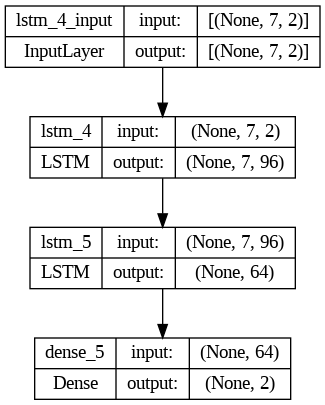

In [102]:

from tensorflow.keras.utils import plot_model

plot_model(model_3, to_file='/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_model_plot/model_stackedLSTM_multi_shape.png', show_shapes=True, show_layer_names=True)



visualisasi loss setiap epoch

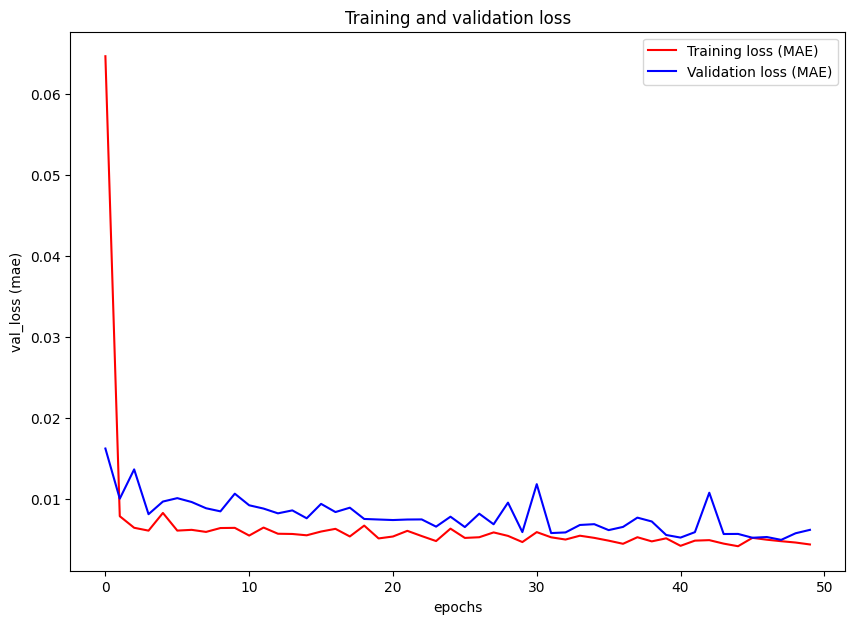

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
plt.figure(figsize = (10,7))
loss = history.history[ 'loss' ]
val_loss = history.history['val_loss' ]
epochs = range(len(loss)) # Get number of epochs
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label='Training loss (MAE)')
plt.plot(epochs, val_loss, 'b', label='Validation loss (MAE)')
plt.ylabel("val_loss (mae)")
plt.xlabel("epochs")
plt.title ('Training and validation loss')
plt.legend(loc=0)


# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_model_loss_visualization/loss_stackedLSTM_multi.png')



# Membuat DataFrame loss dan val_loss
df_loss = pd.DataFrame({
    'Epoch': epochs,
    'Training Loss': loss,
    'Validation Loss': val_loss
})

# simpan visualisasi loss per epoch menjadi CSV file
df_loss.to_csv('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_model_loss_value_per_epoch/loss_stackedLSTM_multi.csv', index=False)


In [ ]:
# mengevaluasi model 3 dari epochs terakhir
model_3.evaluate(test_windows, test_labels)

126/126 [==============================] - 1s 6ms/step - loss: 0.0062


0.006178656127303839

In [103]:
# mengevaluasi dan load model 3 pada best epoch yang loss mae paling kecil sepanjang training

model_3 = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_model_best_epoch/model_3_stackedLSTM_multivariate")
model_3.evaluate(test_windows, test_labels)


126/126 [==============================] - 1s 5ms/step - loss: 0.0049


0.004942360334098339

In [104]:
# membuat predicted value berdasarkan model multivariate model_3 yang sudah di train

model_3_preds = tf.squeeze(model_3.predict(test_windows))
model_3_preds



126/126 [==============================] - 1s 7ms/step


<tf.Tensor: shape=(4001, 2), dtype=float32, numpy=
array([[0.40837413, 0.07439957],
       [0.4087928 , 0.07404555],
       [0.4102748 , 0.0737448 ],
       ...,
       [0.86283404, 0.02395134],
       [0.86609006, 0.02368348],
       [0.8677513 , 0.02356311]], dtype=float32)>

## Denormalisasi nilai output prediksi dan test_labels

In [105]:
denormalized_model_3_preds = scaler_multivariate.inverse_transform(model_3_preds)
denormalized_test_labels = scaler_multivariate.inverse_transform(test_labels)

In [106]:
# mengukur predicted value kedua time series dengan metrik evaluasi regresion problem

model_3_results = evaluate_preds(y_true = denormalized_test_labels,
                                 y_pred = denormalized_model_3_preds)

model_3_results

{'mae': 144.23479,
 'mse': 80648.11,
 'rmse': 203.96335,
 'mape': 4.4171767,
 'R-square': 0.9739362457250864}

In [107]:
tf.squeeze(test_labels[:,0])

<tf.Tensor: shape=(4001,), dtype=float64, numpy=
array([0.41626222, 0.41761218, 0.41725422, ..., 0.86519324, 0.86154612,
       0.85960307])>

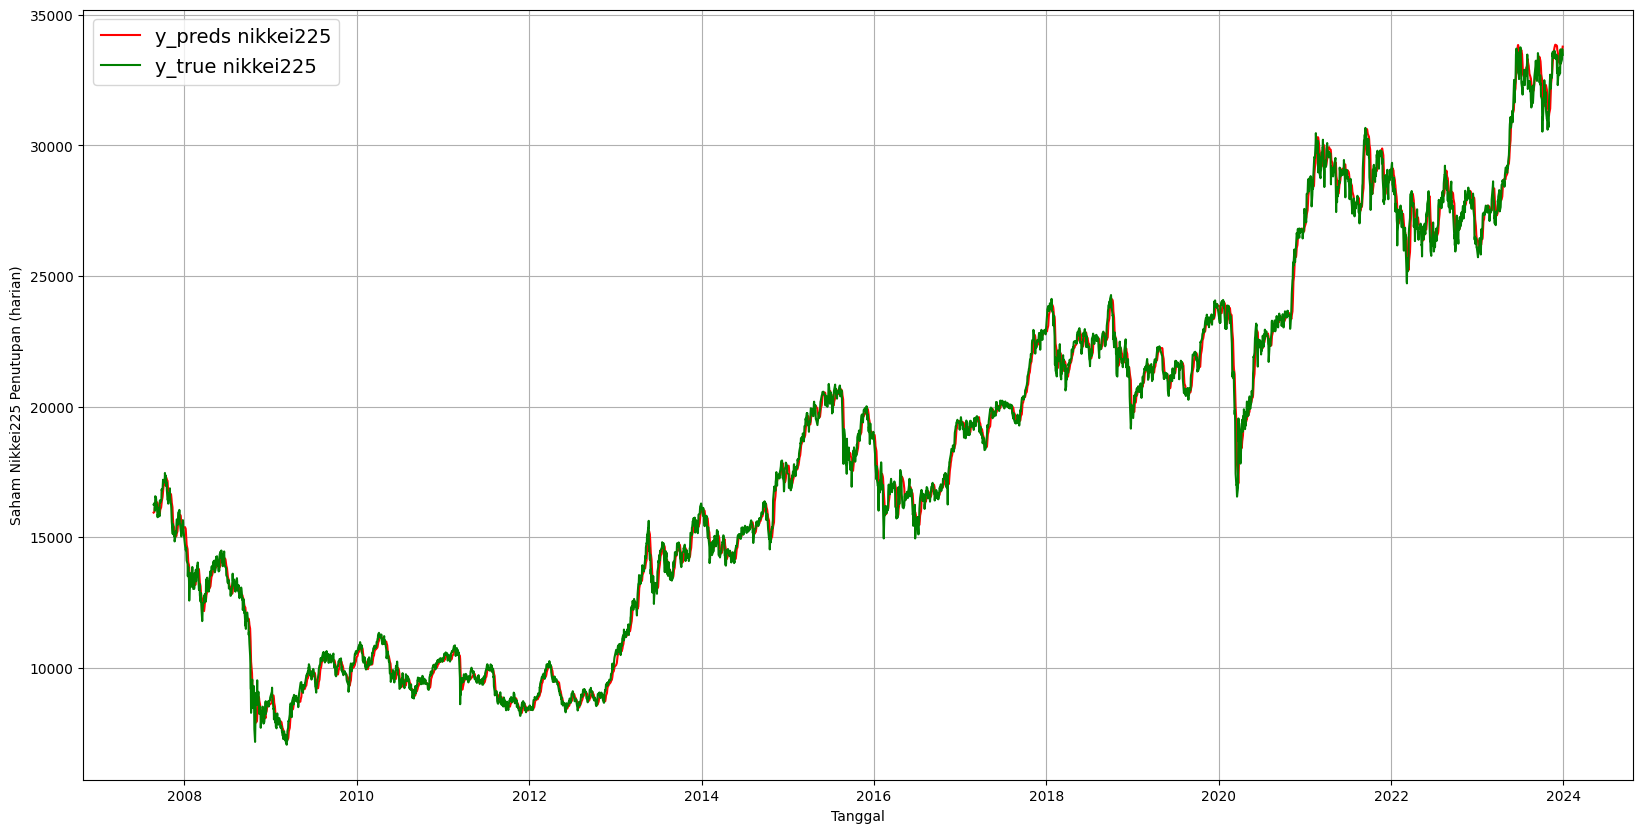

In [ ]:
plt.figure(figsize = (20,10))
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_model_3_preds[:,0], format = "-", label = "y_preds nikkei225", color = 'r')
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_test_labels[:,0], format = "-", label = "y_true nikkei225", color = 'g')

# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_visualisasi_prediksi_time_series/model_3_plot_prediksi_stackedLSTM_multi.png')



simpan model trained ke bentuk .h5

In [ ]:
from tensorflow.keras.models import save_model


# Save the model to disk as a .h5 file
save_model(model_3, "/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_saved_models/model_3_stackedLSTM_multivariate.h5")

<ipython-input-216-53b2f9752897>:5: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model_3, "/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_saved_models/model_3_stackedLSTM_multivariate.h5")


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model_3 = load_model("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/saved_models/model_3_stackedLSTM_multivariate.h5")



# Model 4 : Bidirectional LSTM

In [ ]:
train_windows.shape[2]

2

## Tuner Builder

In [135]:
def model_bidirectional_LSTM_multi_builder(hp):
  tf.random.set_seed(42)

  model_4 = tf.keras.models.Sequential([
          tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units = hp.Int('bi_lstm_n_units', min_value=32, max_value=256, step=32),
                                                            input_shape=(train_windows.shape[1], train_windows.shape[2]),
                                                            return_sequences = False,
                                                            activation = "relu")),
          #tf.keras.layers.Dropout(0.2, seed=42),
          #tf.keras.layers.LSTM(128, return_sequences = False, activation = "relu"),

          #tf.keras.layers.LSTM(128, return_sequences=False, activation = "relu"),

          tf.keras.layers.Dense(test_labels.shape[1])
          ], name = "model_4_bidirectionalLSTM_multivariate")



  #compile model 4
  model_4.compile(loss="mae",
                  optimizer = tf.keras.optimizers.Adam(hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])))

  return model_4

In [136]:
import keras_tuner as kt

tuner_bi_LSTM_multi = kt.Hyperband(model_bidirectional_LSTM_multi_builder,
                     objective='val_loss',
                     max_epochs=10,
                     factor=3,
                     directory='/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_tuning_logs',
                     project_name='bi_LSTM_multivariate')

Reloading Tuner from /content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_tuning_logs/bi_LSTM_multivariate/tuner0.json


## Proses tuning


In [137]:
tuner_bi_LSTM_multi.search(train_windows,
                           train_labels,
                           epochs=10,
                           validation_data=(test_windows, test_labels),
                           batch_size = 128)

## Hasil parameter tuning terbaik

In [138]:
tuner_bi_LSTM_multi.get_best_hyperparameters(num_trials=1)[0]

In [139]:
# Get the optimal hyperparameters
best_hps=tuner_bi_LSTM_multi.get_best_hyperparameters(num_trials=1)[0]

tuning = ["bi_lstm_n_units", 'learning_rate']
print('Best tune model bidirectional LSTM multivariate:')
for tune in tuning:
  print(f'{tune}: {best_hps.get(tune)}')

Best tune model bidirectional LSTM multivariate:
bi_lstm_n_units: 160
learning_rate: 0.01


## Hasil semua parameter tuning

In [140]:
tuning = ["bi_lstm_n_units", 'learning_rate']
hps_dict = dict(zip(tuning, [[] for _ in range(len(tuning))]))

hps_all=tuner_bi_LSTM_multi.get_best_hyperparameters(num_trials=30)
for hps in hps_all:
  for t in tuning:
    hps_dict[t].append(hps.get(t))

df_hyparam = pd.DataFrame(hps_dict)
df_hyparam.to_csv('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_best_hyperparameter_models/hp_bi_LSTM_multi.csv')

df_hyparam


bi_lstm_n_units  learning_rate
0               160         0.0100
1               128         0.0001
2                96         0.0010
3               160         0.0001
4                96         0.0010
5                64         0.0010
6               128         0.0010
7               256         0.0010
8               256         0.0010
9               192         0.0010
10              128         0.0010
11              192         0.0010
12               96         0.0010
13              160         0.0010
14              128         0.0010
15              160         0.0010
16              256         0.0001
17              224         0.0010
18              192         0.0001
19               64         0.0100
20               32         0.0010
21              224         0.0010
22               32         0.0100
23              192         0.0100
24               96         0.0100
25               96         0.0001
26              224         0.0001
27              128         0.0100
28              256         0.0100
29               64         0.0001

In [141]:
tuner_bi_LSTM_multi.results_summary(num_trials=30)

Results summary
Results in /content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_tuning_logs/bi_LSTM_multivariate
Showing 30 best trials
Objective(name="val_loss", direction="min")

Trial 0028 summary
Hyperparameters:
bi_lstm_n_units: 160
learning_rate: 0.01
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.004872982855886221

Trial 0026 summary
Hyperparameters:
bi_lstm_n_units: 128
learning_rate: 0.0001
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.005510252900421619

Trial 0016 summary
Hyperparameters:
bi_lstm_n_units: 96
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0012
Score: 0.005645527504384518

Trial 0027 summary
Hyperparameters:
bi_lstm_n_units: 160
learning_rate: 0.0001
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.005894445348531008

Trial 0012 summary
Hyperparameters:
bi_lstm_n_units: 96
learning_rate: 0.001
tun

## Mengimplementasikan hyperparameter terbaik ke model

In [ ]:
# best hyperparameter digunakan untuk hyperparameter model yang dibuat
model_4 = tuner_bi_LSTM_multi.hypermodel.build(best_hps)

## Melatih model

In [142]:
from tensorflow.keras.models import load_model

# Load the saved model
model_4 = load_model("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_saved_models/model_4_bidirectionalLSTM_multivariate.h5")

In [ ]:

# fit
history = model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs = 50,
            verbose = 1,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_4.name)])

Epoch 1/50
126/126 [==============================] - ETA: 0s - loss: 0.0366
Epoch 1: val_loss improved from inf to 0.02442, saving model to /content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_model_best_epoch/model_4_bidirectionalLSTM_multivariate
126/126 [==============================] - 21s 144ms/step - loss: 0.0366 - val_loss: 0.0244
Epoch 2/50
126/126 [==============================] - ETA: 0s - loss: 0.0143
Epoch 2: val_loss improved from 0.02442 to 0.00994, saving model to /content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_model_best_epoch/model_4_bidirectionalLSTM_multivariate
126/126 [==============================] - 12s 99ms/step - loss: 0.0143 - val_loss: 0.0099
Epoch 3/50
125/126 [============================>.] - ETA: 0s - loss: 0.0131
Epoch 3: val_loss improved from 0.00994 to 0.00851, saving model to /content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_model_best_epoch/model_4_bidirectionalLSTM_multivariate
126/126 [==============================] - 11s 87ms/s

visualisasi model shape

In [ ]:
model_4.summary()

Model: "model_4_bidirectionalLSTM_multivariate"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 320)               208640    
 al)                                                             
                                                                 
 dense_6 (Dense)             (None, 2)                 642       
                                                                 
Total params: 209282 (817.51 KB)
Trainable params: 209282 (817.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


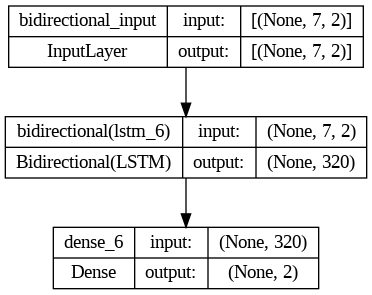

In [ ]:

from tensorflow.keras.utils import plot_model

plot_model(model_4, to_file='/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_model_plot/model_biLSTM_multi_shape.png', show_shapes=True, show_layer_names=True)


visualisasi loss setiap epoch

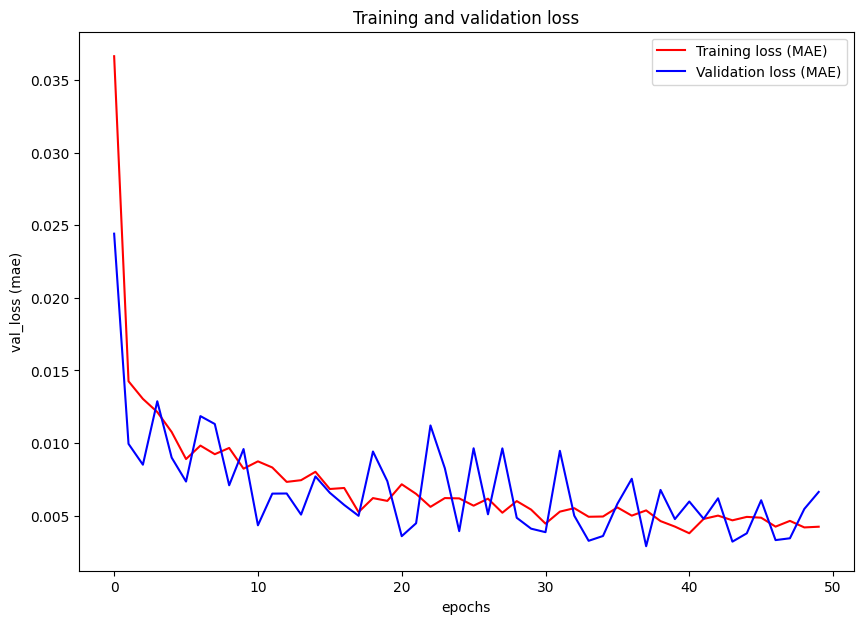

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
plt.figure(figsize = (10,7))
loss = history.history[ 'loss' ]
val_loss = history.history['val_loss' ]
epochs = range(len(loss)) # Get number of epochs
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label='Training loss (MAE)')
plt.plot(epochs, val_loss, 'b', label='Validation loss (MAE)')
plt.ylabel("val_loss (mae)")
plt.xlabel("epochs")
plt.title ('Training and validation loss')
plt.legend(loc=0)


# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_model_loss_visualization/loss_bidirectional_LSTM_multi.png')


# Membuat DataFrame loss dan val_loss
df_loss = pd.DataFrame({
    'Epoch': epochs,
    'Training Loss': loss,
    'Validation Loss': val_loss
})

# simpan visualisasi loss per epoch menjadi CSV file
df_loss.to_csv('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_model_loss_value_per_epoch/loss_bidirectional_LSTM_multi.csv', index=False)


In [ ]:
# mengevaluasi model 4 dari epochs terakhir
model_4.evaluate(test_windows, test_labels)

126/126 [==============================] - 1s 8ms/step - loss: 0.0066


0.006632519885897636

In [ ]:
# mengevaluasi dan load model 4 pada best epoch yang loss mae paling kecil sepanjang training

model_4 = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_model_best_epoch/model_4_bidirectionalLSTM_multivariate")
model_4.evaluate(test_windows, test_labels)


126/126 [==============================] - 1s 8ms/step - loss: 0.0029


0.0028928518295288086

In [143]:
# membuat predicted value berdasarkan model multivariate model_4 yang sudah di train

model_4_preds = tf.squeeze(model_4.predict(test_windows))
model_4_preds



126/126 [==============================] - 2s 11ms/step


<tf.Tensor: shape=(4001, 2), dtype=float32, numpy=
array([[0.41855603, 0.07343037],
       [0.41579944, 0.0727236 ],
       [0.41581002, 0.07293834],
       ...,
       [0.8597659 , 0.02807817],
       [0.8715468 , 0.0293413 ],
       [0.8652132 , 0.02784143]], dtype=float32)>

In [144]:
model_4_preds[:,0]

<tf.Tensor: shape=(4001,), dtype=float32, numpy=
array([0.41855603, 0.41579944, 0.41581002, ..., 0.8597659 , 0.8715468 ,
       0.8652132 ], dtype=float32)>

## Denormalisasi nilai output prediksi dan test_labels

In [145]:
denormalized_model_4_preds = scaler_multivariate.inverse_transform(model_4_preds)
denormalized_test_labels = scaler_multivariate.inverse_transform(test_labels)

In [146]:
# mengukur predicted value kedua time series dengan metrik evaluasi regresion problem

model_4_results = evaluate_preds(y_true = denormalized_test_labels,
                                 y_pred = denormalized_model_4_preds)

model_4_results

{'mae': 92.37915,
 'mse': 33230.44,
 'rmse': 130.63737,
 'mape': 1.9943746,
 'R-square': 0.9907255024377117}

In [ ]:
tf.squeeze(test_labels[:,0])

<tf.Tensor: shape=(4001,), dtype=float64, numpy=
array([0.41626222, 0.41761218, 0.41725422, ..., 0.86519324, 0.86154612,
       0.85960307])>

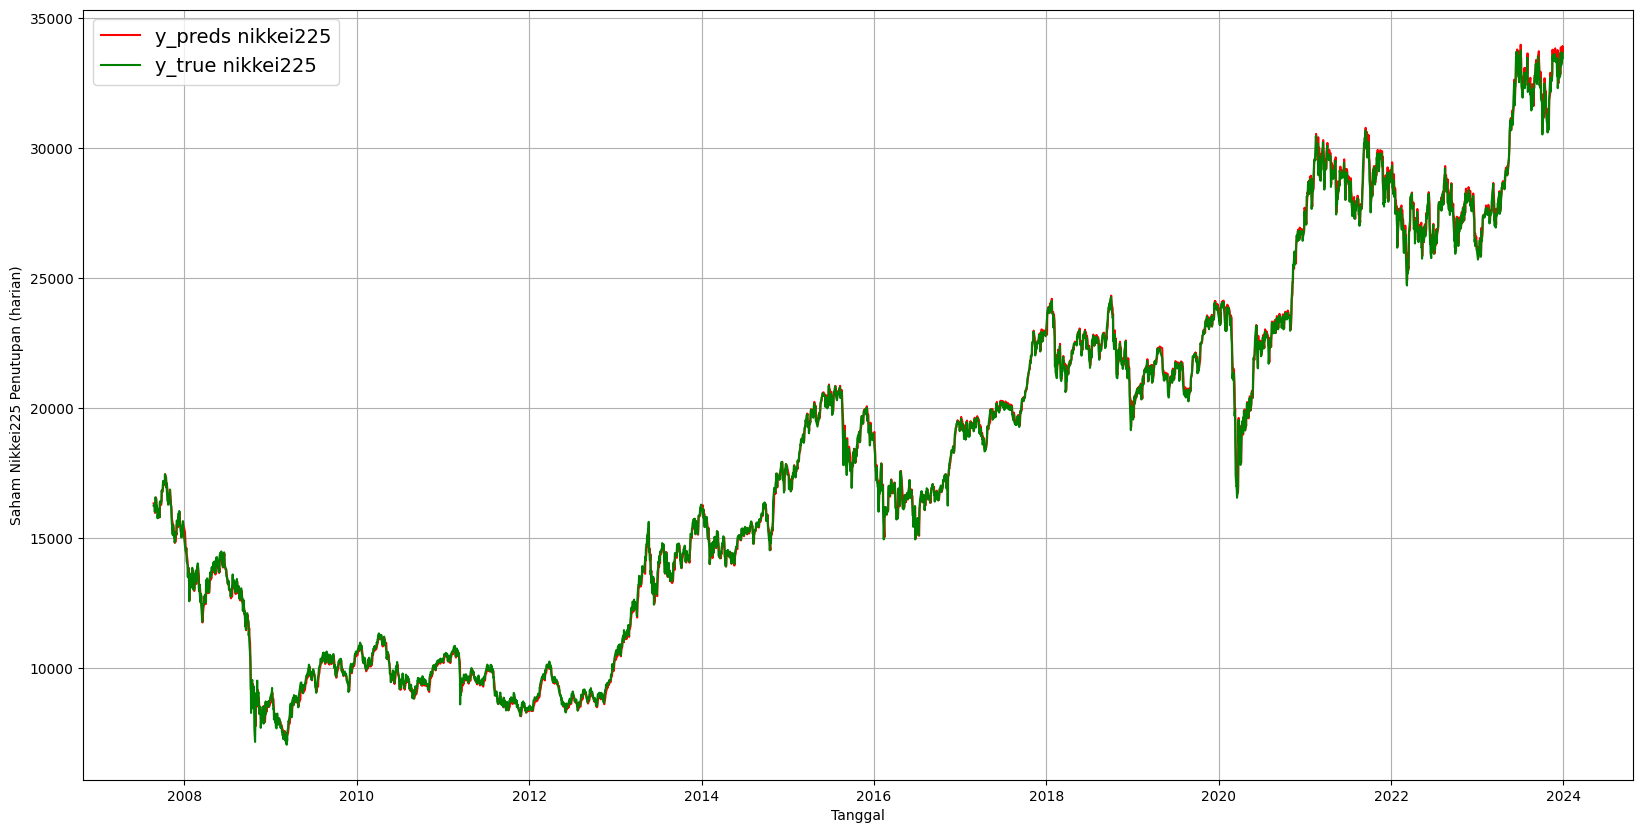

In [ ]:
plt.figure(figsize = (20,10))
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_model_4_preds[:,0], format = "-", label = "y_preds nikkei225", color = 'r')
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_test_labels[:,0], format = "-", label = "y_true nikkei225", color = 'g')

# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_visualisasi_prediksi_time_series/model_4_plot_prediksi_biLSTM_multi.png')


simpan model trained ke bentuk .h5

In [ ]:
from tensorflow.keras.models import save_model


# Save the model to disk as a .h5 file
save_model(model_4, "/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_saved_models/model_4_bidirectionalLSTM_multivariate.h5")

<ipython-input-238-ae929c2075e0>:5: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model_4, "/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_saved_models/model_4_bidirectionalLSTM_multivariate.h5")


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model_4 = load_model("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/saved_models/model_4_bidirectionalLSTM_multivariate.h5")

# Model 5 : CNN-LSTM

## Tuner Builder

In [ ]:
def model_CNN_LSTM_multi_builder(hp):
  tf.random.set_seed(42)

  model_5 = tf.keras.models.Sequential([
    # YOUR CODE HERE.
    tf.keras.layers.Conv1D(filters=hp.Int('Conv1D_n_filters', min_value=32, max_value=256, step=32),
                          kernel_size=hp.Int('Conv1D_kernel_size', min_value=5, max_value=10, step=1),
                          strides=1,
                          padding="causal",
                          activation="relu",
                          input_shape=[train_windows.shape[1], train_windows.shape[2]]),

    tf.keras.layers.LSTM(units = hp.Int('LSTM_n_units', min_value=32, max_value=256, step=32),
                        return_sequences=False),

    tf.keras.layers.Dense(test_labels.shape[1]),
    ], name = "model_5_CNN-LSTM_multivariate")


  #compile model 5
  model_5.compile(loss="mae",
                  optimizer = tf.keras.optimizers.Adam(hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])))

  return model_5

In [ ]:
import keras_tuner as kt

tuner_CNN_LSTM_multi = kt.Hyperband(model_CNN_LSTM_multi_builder,
                     objective='val_loss',
                     max_epochs=10,
                     factor=3,
                     directory='/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_tuning_logs',
                     project_name='CNN_LSTM_multivariate')

Reloading Tuner from /content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_tuning_logs/CNN_LSTM_multivariate/tuner0.json


## Proses tuning


In [ ]:
tuner_CNN_LSTM_multi.search(train_windows,
                            train_labels,
                            epochs=10,
                            validation_data=(test_windows, test_labels),
                            batch_size = 128)

## Hasil parameter tuning terbaik

In [ ]:
# Get the optimal hyperparameters
best_hps=tuner_CNN_LSTM_multi.get_best_hyperparameters(num_trials=1)[0]

tuning = ['Conv1D_n_filters', 'Conv1D_kernel_size', "LSTM_n_units", 'learning_rate']
print('Best tune model CNN LSTM multivariate:')
for tune in tuning:
  print(f'{tune}: {best_hps.get(tune)}')

Best tune model CNN LSTM multivariate:
Conv1D_n_filters: 64
Conv1D_kernel_size: 5
LSTM_n_units: 128
learning_rate: 0.0001


## Hasil semua parameter tuning

In [ ]:
tuning = ['Conv1D_n_filters', 'Conv1D_kernel_size', "LSTM_n_units", 'learning_rate']
hps_dict = dict(zip(tuning, [[] for _ in range(len(tuning))]))

hps_all=tuner_CNN_LSTM_multi.get_best_hyperparameters(num_trials=30)
for hps in hps_all:
  for t in tuning:
    hps_dict[t].append(hps.get(t))

df_hyparam= pd.DataFrame(hps_dict)
df_hyparam.to_csv('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_best_hyperparameter_models/hp_CNN_LSTM_multi.csv')
df_hyparam


Conv1D_n_filters  Conv1D_kernel_size  LSTM_n_units  learning_rate
0                 64                   5           128         0.0001
1                128                   5           256         0.0001
2                192                   7           192         0.0001
3                256                   8           192         0.0001
4                 64                   6           192         0.0001
5                256                   8           192         0.0001
6                224                   7            32         0.0010
7                224                   7            32         0.0010
8                 64                  10            96         0.0010
9                256                   9            64         0.0010
10               128                   9           224         0.0010
11               128                   6           160         0.0010
12                64                  10            96         0.0010
13               128                   5           256         0.0001
14                64                   7            64         0.0010
15                64                  10            96         0.0010
16                64                   7            64         0.0010
17               224                   8           160         0.0010
18               128                   5           256         0.0001
19               160                   7           128         0.0001
20               160                   5           128         0.0001
21               256                   9            64         0.0001
22               128                   9           224         0.0010
23                64                   9           192         0.0010
24                64                  10            32         0.0001
25                64                  10           256         0.0001
26                32                   6           128         0.0001
27                96                   9           128         0.0001
28               192                   7           128         0.0100
29                96                   8            32         0.0100

In [ ]:
tuner_CNN_LSTM_multi.results_summary(num_trials=30)

Results summary
Results in /content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_tuning_logs/CNN_LSTM_multivariate
Showing 30 best trials
Objective(name="val_loss", direction="min")

Trial 0027 summary
Hyperparameters:
Conv1D_n_filters: 64
Conv1D_kernel_size: 5
LSTM_n_units: 128
learning_rate: 0.0001
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.004741395823657513

Trial 0017 summary
Hyperparameters:
Conv1D_n_filters: 128
Conv1D_kernel_size: 5
LSTM_n_units: 256
learning_rate: 0.0001
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0015
Score: 0.004945268388837576

Trial 0028 summary
Hyperparameters:
Conv1D_n_filters: 192
Conv1D_kernel_size: 7
LSTM_n_units: 192
learning_rate: 0.0001
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.004980205558240414

Trial 0024 summary
Hyperparameters:
Conv1D_n_filters: 256
Conv1D_kernel_size: 8
LSTM_n_units: 192
learning_rate: 0.0001
tuner/epochs:

## Mengimplementasikan hyperparameter terbaik ke model

In [ ]:
# best hyperparameter digunakan untuk hyperparameter model yang dibuat
model_5 = tuner_CNN_LSTM_multi.hypermodel.build(best_hps)

## Melatih model

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model_5 = load_model("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_saved_models/model_5_CNN-LSTM_multivariate.h5")


In [ ]:

# fit
history = model_5.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs = 50,
            verbose = 1,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_5.name)])

Epoch 1/50
125/126 [============================>.] - ETA: 0s - loss: 0.1389
Epoch 1: val_loss improved from inf to 0.03568, saving model to /content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_model_best_epoch/model_5_CNN-LSTM_multivariate
126/126 [==============================] - 13s 82ms/step - loss: 0.1387 - val_loss: 0.0357
Epoch 2/50
124/126 [============================>.] - ETA: 0s - loss: 0.0071
Epoch 2: val_loss improved from 0.03568 to 0.00766, saving model to /content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_model_best_epoch/model_5_CNN-LSTM_multivariate
126/126 [==============================] - 8s 66ms/step - loss: 0.0071 - val_loss: 0.0077
Epoch 3/50
126/126 [==============================] - ETA: 0s - loss: 0.0044
Epoch 3: val_loss improved from 0.00766 to 0.00660, saving model to /content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_model_best_epoch/model_5_CNN-LSTM_multivariate
126/126 [==============================] - 8s 60ms/step - loss: 0.0044 - val_loss:

visualisasi model shape

In [ ]:
model_5.summary()

Model: "model_5_CNN-LSTM_multivariate"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 7, 64)             704       
                                                                 
 lstm_7 (LSTM)               (None, 128)               98816     
                                                                 
 dense_7 (Dense)             (None, 2)                 258       
                                                                 
Total params: 99778 (389.76 KB)
Trainable params: 99778 (389.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


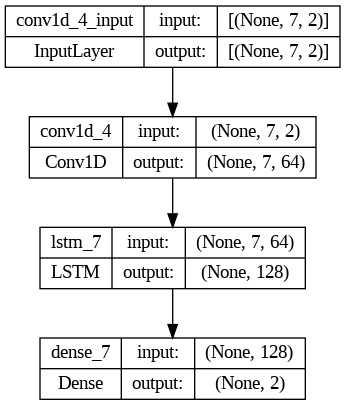

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model_5, to_file='/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_model_plot/model_CNN-LSTM_multi_shape.png', show_shapes=True, show_layer_names=True)


visualisasi loss setiap epoch

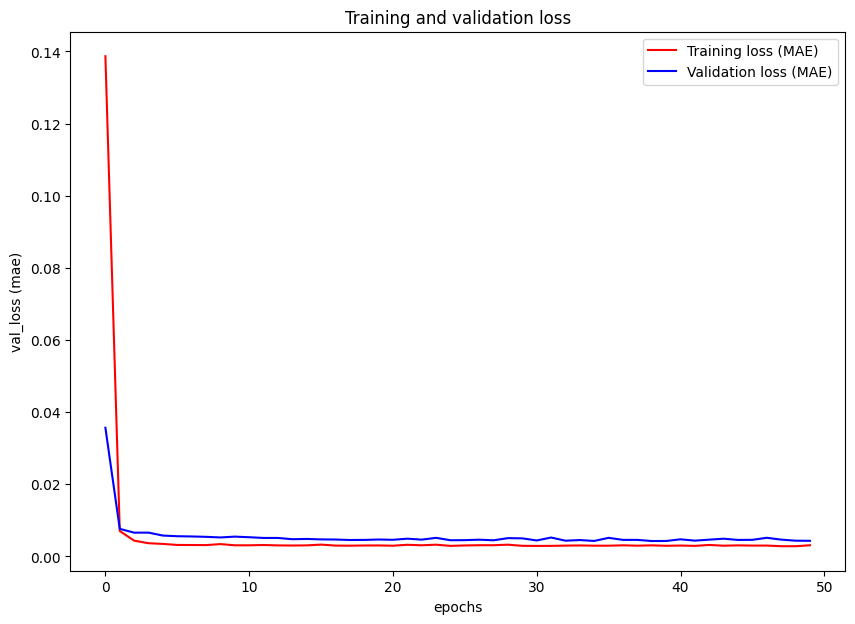

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
plt.figure(figsize = (10,7))
loss = history.history[ 'loss' ]
val_loss = history.history['val_loss' ]
epochs = range(len(loss)) # Get number of epochs
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label='Training loss (MAE)')
plt.plot(epochs, val_loss, 'b', label='Validation loss (MAE)')
plt.title ('Training and validation loss')
plt.ylabel("val_loss (mae)")
plt.xlabel("epochs")
plt.legend(loc=0)



# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_model_loss_visualization/loss_CNN-LSTM_multi.png')



# Membuat DataFrame loss dan val_loss
df_loss = pd.DataFrame({
    'Epoch': epochs,
    'Training Loss': loss,
    'Validation Loss': val_loss
})

# simpan visualisasi loss per epoch menjadi CSV file
df_loss.to_csv('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_model_loss_value_per_epoch/loss_CNN-LSTM_multi.csv', index=False)


In [ ]:
# mengevaluasi model 6 dari epochs terakhir
model_5.evaluate(test_windows, test_labels)

126/126 [==============================] - 1s 5ms/step - loss: 0.0043


0.004345204681158066

In [ ]:
# mengevaluasi dan load model 6 pada best epoch yang loss mae paling kecil sepanjang training

model_5 = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_model_best_epoch/model_5_CNN-LSTM_multivariate")
model_5.evaluate(test_windows, test_labels)


126/126 [==============================] - 1s 5ms/step - loss: 0.0043


0.004282122943550348

In [ ]:
# membuat predicted value berdasarkan model multivariate model_1 yang sudah di train

model_5_preds = tf.squeeze(model_5.predict(test_windows))
model_5_preds



126/126 [==============================] - 1s 5ms/step


<tf.Tensor: shape=(4001, 2), dtype=float32, numpy=
array([[0.4071228 , 0.07338277],
       [0.4062831 , 0.07286168],
       [0.40734544, 0.07283845],
       ...,
       [0.86162245, 0.02204951],
       [0.8642389 , 0.02206041],
       [0.8649334 , 0.021877  ]], dtype=float32)>

In [ ]:
model_5_preds[:,0]

<tf.Tensor: shape=(4001,), dtype=float32, numpy=
array([0.4071228 , 0.4062831 , 0.40734544, ..., 0.86162245, 0.8642389 ,
       0.8649334 ], dtype=float32)>

## Denormalisasi nilai output prediksi dan test_labels

In [ ]:
denormalized_model_5_preds = scaler_multivariate.inverse_transform(model_5_preds)
denormalized_test_labels = scaler_multivariate.inverse_transform(test_labels)

In [ ]:
# mengukur predicted value kedua time series dengan metrik evaluasi regresion problem

model_5_results = evaluate_preds(y_true = denormalized_test_labels,
                                 y_pred = denormalized_model_5_preds)

model_5_results

{'mae': 158.53113,
 'mse': 98467.95,
 'rmse': 224.19438,
 'mape': 1.4941772,
 'R-square': 0.9937295599528237}

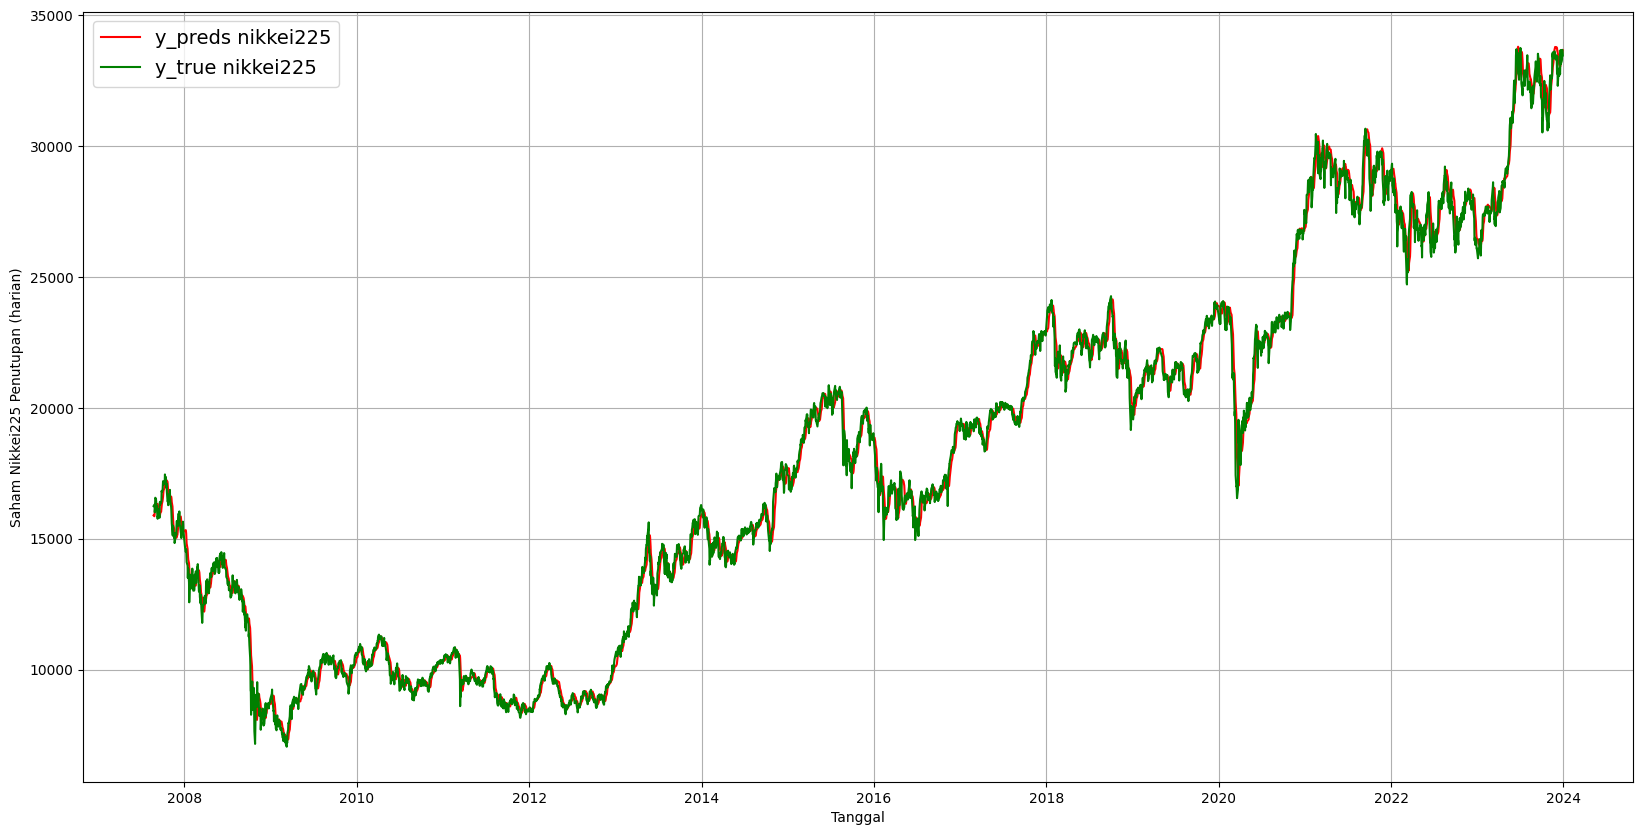

In [ ]:
plt.figure(figsize = (20,10))
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_model_5_preds[:,0], format = "-", label = "y_preds nikkei225", color = 'r')
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_test_labels[:,0], format = "-", label = "y_true nikkei225", color = 'g')

# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_visualisasi_prediksi_time_series/model_5_plot_prediksi_CNN-LSTM_multi.png')


simpan model trained ke bentuk .h5

In [ ]:
from tensorflow.keras.models import save_model

# menyimpan model menjadi .h5 file
save_model(model_5, "/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_saved_models/model_5_CNN-LSTM_multivariate.h5")


<ipython-input-256-57fdc49a2802>:4: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model_5, "/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_saved_models/model_5_CNN-LSTM_multivariate.h5")


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model_5 = load_model("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/saved_models/model_5_CNN-LSTM_multivariate.h5")


# Membuat univariate time series forecasting stock price

In [ ]:
print(full_windows[:, 0]),
print(full_windows[:, 0].shape)
print("\n")
print(full_labels[:, 0])
print(full_labels[:, 0].shape)

[[6.00299454e-04 5.62921348e-01]
 [5.22525780e-04 5.62921348e-01]
 [4.47842450e-04 5.62921348e-01]
 ...
 [8.41442398e-01 2.24719101e-02]
 [8.53299278e-01 2.24719101e-02]
 [8.65056752e-01 2.24719101e-02]]
(20033, 2)


[3.14957629e-04 2.52120620e-04 2.99763434e-04 ... 8.65193242e-01
 8.61546120e-01 8.59603066e-01]
(20033,)


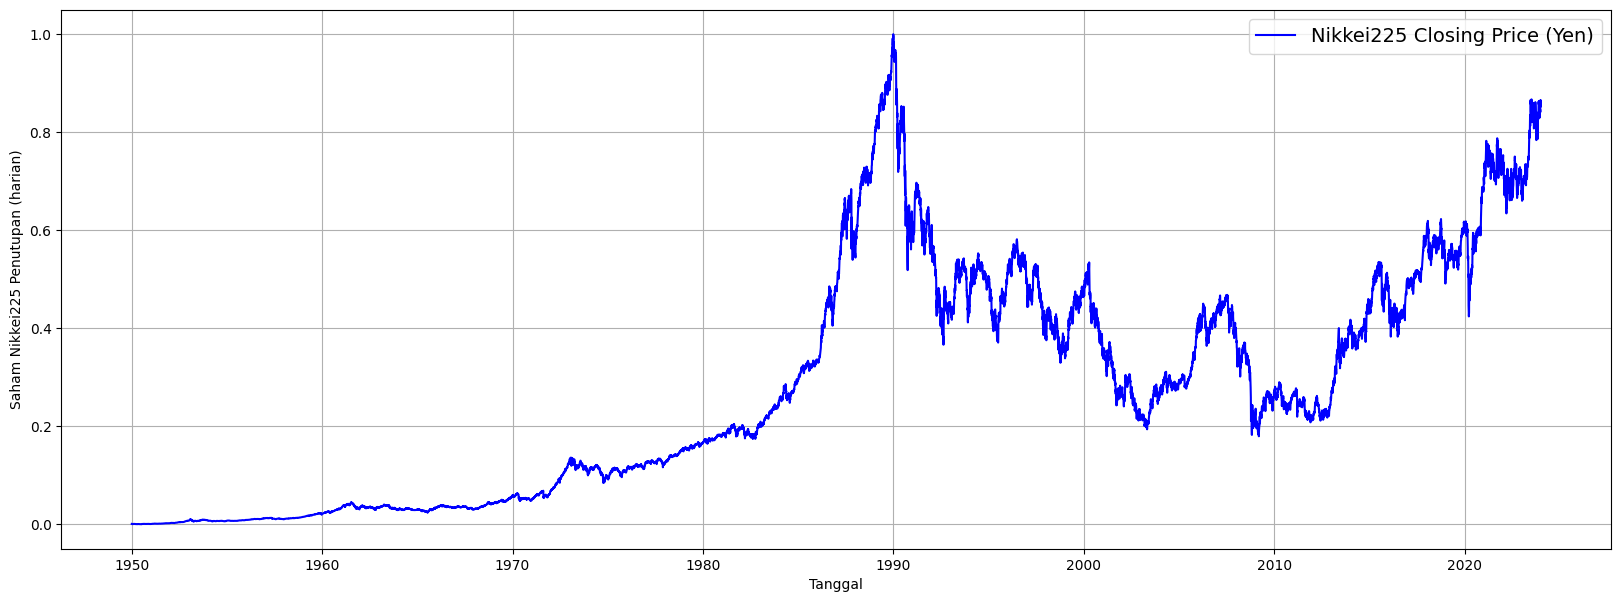

In [ ]:
plt.figure(figsize = (20,7))
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = normalized_data[:,0], format = "-", label = "Nikkei225 Closing Price (Yen)", color = 'b')

memanggil variabel window dan label untuk univariate nikkei stock price

In [ ]:
X_nikkei.shape, y_nikkei.shape

((20033, 7, 1), (20033, 1, 1))

reshape dimensi X_nikkei dan y_nikkei dan masukkan ke variabel baru

In [ ]:
train_nikkeiWindows = np.squeeze(X_nikkei[:train_size])
test_nikkeiWindows = np.squeeze(X_nikkei[train_size:])

train_nikkeiLabels = np.squeeze(y_nikkei[:train_size])
test_nikkeiLabels = np.squeeze(y_nikkei[train_size:])

In [ ]:
train_nikkeiWindows.shape, test_nikkeiWindows.shape

((16032, 7), (4001, 7))

In [ ]:
train_nikkeiWindows.shape[1]

7

In [ ]:
train_nikkeiLabels.shape, test_nikkeiLabels.shape

((16032,), (4001,))

# Model 6: Conv1D Univariate

In [ ]:
train_nikkeiWindows.shape

(16032, 7)

## Tuner Builder

In [ ]:
#create Conv1D model
def model_Conv1D_uni_builder(hp):
  tf.random.set_seed(42)

  model_6 = tf.keras.models.Sequential([
      #layers.Lambda(lambda x: tf.expand_dims(x, axis = 1)),
      tf.keras.layers.Conv1D(filters = hp.Int('conv1D_n_filters', min_value=32, max_value=256, step=32),
                             kernel_size = hp.Int('conv1D_kernel_size', min_value=5, max_value=10, step=1),
                             strides = 1,
                             padding ="causal",
                             input_shape = (WINDOW_SIZE, 1)),
      tf.keras.layers.GlobalMaxPooling1D(),  # Add GlobalMaxPooling1D layer
      tf.keras.layers.Dense(1)

      #filters adalah jumlah hidden unit dalam layers tersebut
      # kernel size adalah ukuran dari window. Ex: kernel_size = 7 artinya melihat 7 value sekaligus
      # default nilai strides = 1, ini sudah sesuai karena sliding window bergeser satu timesteps
  ], name = "model_6_conv1D_univariate")

  #compile model 1
  model_6.compile(loss="mae",
                  optimizer = tf.keras.optimizers.Adam(hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])))

  return model_6

In [ ]:
import keras_tuner as kt

tuner_Conv1D_uni = kt.Hyperband(model_Conv1D_uni_builder,
                     objective='val_loss',
                     max_epochs=10,
                     factor=3,
                     directory='/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_tuning_logs',
                     project_name='Conv1D_univariate')



Reloading Tuner from /content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_tuning_logs/Conv1D_univariate/tuner0.json


## Proses tuning


In [ ]:
tuner_Conv1D_uni.search(train_nikkeiWindows,
                        train_nikkeiLabels,
                        epochs=10,
                        validation_data=(test_nikkeiWindows, test_nikkeiLabels),
                        batch_size=128)

## Hasil parameter tuning terbaik

In [ ]:
tuner_Conv1D_uni.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
# Get the optimal hyperparameters
best_hps=tuner_Conv1D_uni.get_best_hyperparameters(num_trials=1)[0]

tuning = ['conv1D_n_filters', 'conv1D_kernel_size', 'learning_rate']
print('Best tune model Conv1D univariate:')
for tune in tuning:
  print(f'{tune}: {best_hps.get(tune)}')

Best tune model Conv1D univariate:
conv1D_n_filters: 32
conv1D_kernel_size: 10
learning_rate: 0.01


## Hasil semua parameter tuning

In [ ]:
tuning =['conv1D_n_filters', 'conv1D_kernel_size', 'learning_rate']
hps_dict = dict(zip(tuning, [[] for _ in range(len(tuning))]))

hps_all = tuner_Conv1D_uni.get_best_hyperparameters(num_trials=30)
for hps in hps_all:
  for t in tuning:
    hps_dict[t].append(hps.get(t))

df_hyparam= pd.DataFrame(hps_dict)
df_hyparam.to_csv('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_best_hyperparameter_models/hp_Con1D_uni.csv')
df_hyparam



conv1D_n_filters  conv1D_kernel_size  learning_rate
0                 32                  10         0.0100
1                128                  10         0.0010
2                 32                   7         0.0010
3                 64                   7         0.0010
4                 32                   7         0.0010
5                 32                  10         0.0100
6                 32                   7         0.0010
7                256                   7         0.0100
8                128                   5         0.0010
9                 64                   8         0.0001
10               256                   5         0.0010
11               256                   5         0.0010
12                64                   8         0.0001
13               160                  10         0.0010
14               256                   7         0.0010
15                32                  10         0.0100
16               224                  10         0.0010
17               160                  10         0.0010
18               256                   6         0.0010
19                32                   8         0.0100
20               160                   7         0.0010
21                64                  10         0.0100
22                96                   6         0.0001
23                32                   9         0.0010
24                96                   7         0.0001
25               128                   6         0.0001
26                96                   7         0.0100
27                32                   8         0.0100
28               256                   6         0.0100
29                64                   5         0.0001

In [ ]:
tuner_Conv1D_uni.results_summary(num_trials=30)

Results summary
Results in /content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_tuning_logs/Conv1D_univariate
Showing 30 best trials
Objective(name="val_loss", direction="min")

Trial 0017 summary
Hyperparameters:
conv1D_n_filters: 32
conv1D_kernel_size: 10
learning_rate: 0.01
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0013
Score: 0.006521408446133137

Trial 0027 summary
Hyperparameters:
conv1D_n_filters: 128
conv1D_kernel_size: 10
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.006576057989150286

Trial 0016 summary
Hyperparameters:
conv1D_n_filters: 32
conv1D_kernel_size: 7
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0012
Score: 0.006671953946352005

Trial 0029 summary
Hyperparameters:
conv1D_n_filters: 64
conv1D_kernel_size: 7
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
S

## Mengimplementasikan hyperparameter terbaik ke model

In [ ]:
# best hyperparameter digunakan untuk hyperparameter model yang dibuat
model_6 = tuner_Conv1D_uni.hypermodel.build(best_hps)

## Melatih model

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model_6 = load_model("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_saved_models/model_6_Conv1D_univariate.h5")


In [ ]:

# fit
history = model_6.fit(train_nikkeiWindows,
            train_nikkeiLabels,
            batch_size=128,
            epochs = 50,
            verbose = 1,
            validation_data = (test_nikkeiWindows, test_nikkeiLabels),
            callbacks = [create_model_checkpoint(model_name = model_6.name)])

Epoch 1/50
121/126 [===========================>..] - ETA: 0s - loss: 0.0199
Epoch 1: val_loss improved from inf to 0.01248, saving model to /content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_model_best_epoch/model_6_conv1D_univariate
126/126 [==============================] - 3s 18ms/step - loss: 0.0194 - val_loss: 0.0125
Epoch 2/50
114/126 [==========================>...] - ETA: 0s - loss: 0.0057
Epoch 2: val_loss improved from 0.01248 to 0.01212, saving model to /content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_model_best_epoch/model_6_conv1D_univariate
126/126 [==============================] - 1s 8ms/step - loss: 0.0056 - val_loss: 0.0121
Epoch 3/50
114/126 [==========================>...] - ETA: 0s - loss: 0.0058
Epoch 3: val_loss improved from 0.01212 to 0.01099, saving model to /content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_model_best_epoch/model_6_conv1D_univariate
126/126 [==============================] - 1s 8ms/step - loss: 0.0056 - val_loss: 0.0110
Epoch 4

visualisasi model shape

In [ ]:
model_6.summary()

Model: "model_6_conv1D_univariate"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_5 (Conv1D)           (None, 7, 32)             352       
                                                                 
 global_max_pooling1d_1 (Gl  (None, 32)                0         
 obalMaxPooling1D)                                               
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 385 (1.50 KB)
Trainable params: 385 (1.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


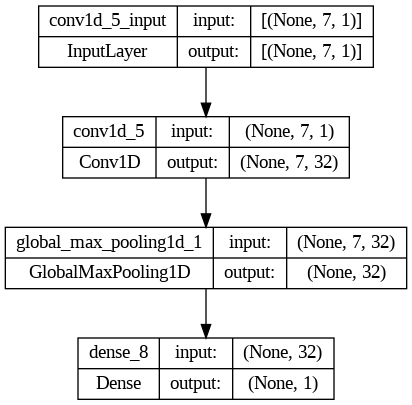

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model_6, to_file='/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_model_plot/model_Conv1D_uni_shape.png', show_shapes=True, show_layer_names=True)


visualisasi loss setiap epoch

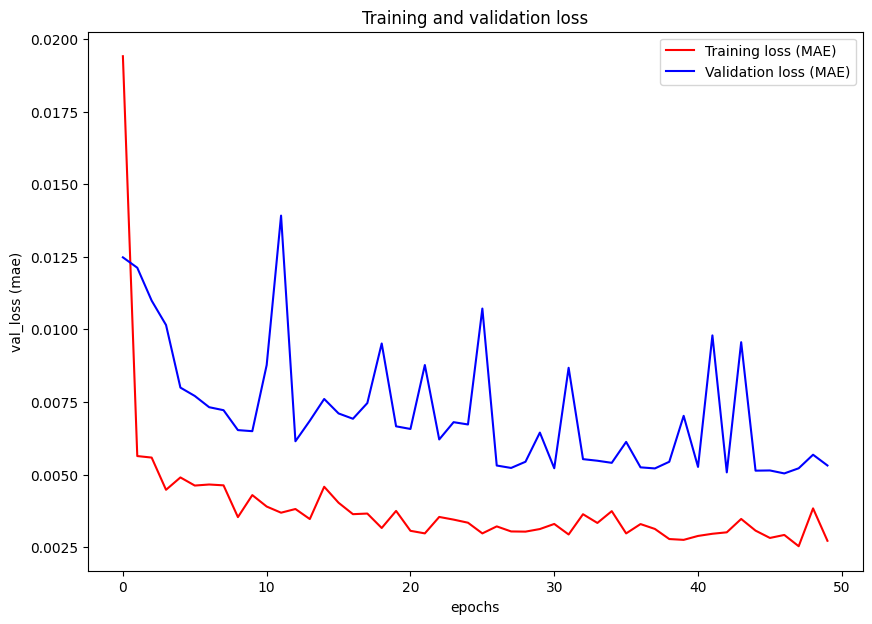

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
plt.figure(figsize = (10,7))
loss = history.history[ 'loss' ]
val_loss = history.history['val_loss' ]
epochs = range(len(loss)) # Get number of epochs
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label='Training loss (MAE)')
plt.plot(epochs, val_loss, 'b', label='Validation loss (MAE)')
plt.title ('Training and validation loss')
plt.ylabel("val_loss (mae)")
plt.xlabel("epochs")
plt.legend(loc=0)



# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_model_loss_visualization/loss_Conv1D_uni.png')


# Membuat DataFrame loss dan val_loss
df_loss = pd.DataFrame({
    'Epoch': epochs,
    'Training Loss': loss,
    'Validation Loss': val_loss
})

# simpan visualisasi loss per epoch menjadi CSV file
df_loss.to_csv('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_model_loss_value_per_epoch/loss_Conv1D_uni.csv', index=False)


In [ ]:
# mengevaluasi model 6 dari epochs terakhir
model_6.evaluate(test_nikkeiWindows, test_nikkeiLabels)

126/126 [==============================] - 0s 1ms/step - loss: 0.0053


0.0053138770163059235

In [ ]:
# mengevaluasi dan load model 6 pada best epoch yang loss mae paling kecil sepanjang training

model_6 = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_model_best_epoch/model_6_conv1D_univariate")
model_6.evaluate(test_nikkeiWindows, test_nikkeiLabels)


126/126 [==============================] - 0s 2ms/step - loss: 0.0050


0.0050400360487401485

In [ ]:
# membuat predicted value berdasarkan model multivariate model_1 yang sudah di train

model_6_preds = tf.squeeze(model_6.predict(test_nikkeiWindows))
model_6_preds



126/126 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(4001,), dtype=float32, numpy=
array([0.41428417, 0.41486531, 0.41520447, ..., 0.8546624 , 0.86175716,
       0.86245775], dtype=float32)>

In [ ]:
model_6_preds.shape

TensorShape([4001])

## Denormalisasi nilai output prediksi dan test_labels

In [ ]:
denormalized_model_6_preds = scaler_univariate.inverse_transform([model_6_preds])
denormalized_test_nikkeiLabels = scaler_univariate.inverse_transform([test_nikkeiLabels])

In [ ]:
denormalized_model_6_preds = tf.squeeze(denormalized_model_6_preds)
denormalized_test_nikkeiLabels = tf.squeeze(denormalized_test_nikkeiLabels)

In [ ]:
# mengukur predicted value dengan metrik evaluasi regresion problem

model_6_results = evaluate_preds(y_true = denormalized_test_nikkeiLabels,
                                 y_pred = denormalized_model_6_preds)

model_6_results

{'mae': 195.7077,
 'mse': 77291.66,
 'rmse': 278.01376,
 'mape': 1.1707547,
 'R-square': 0.9984368153914114}

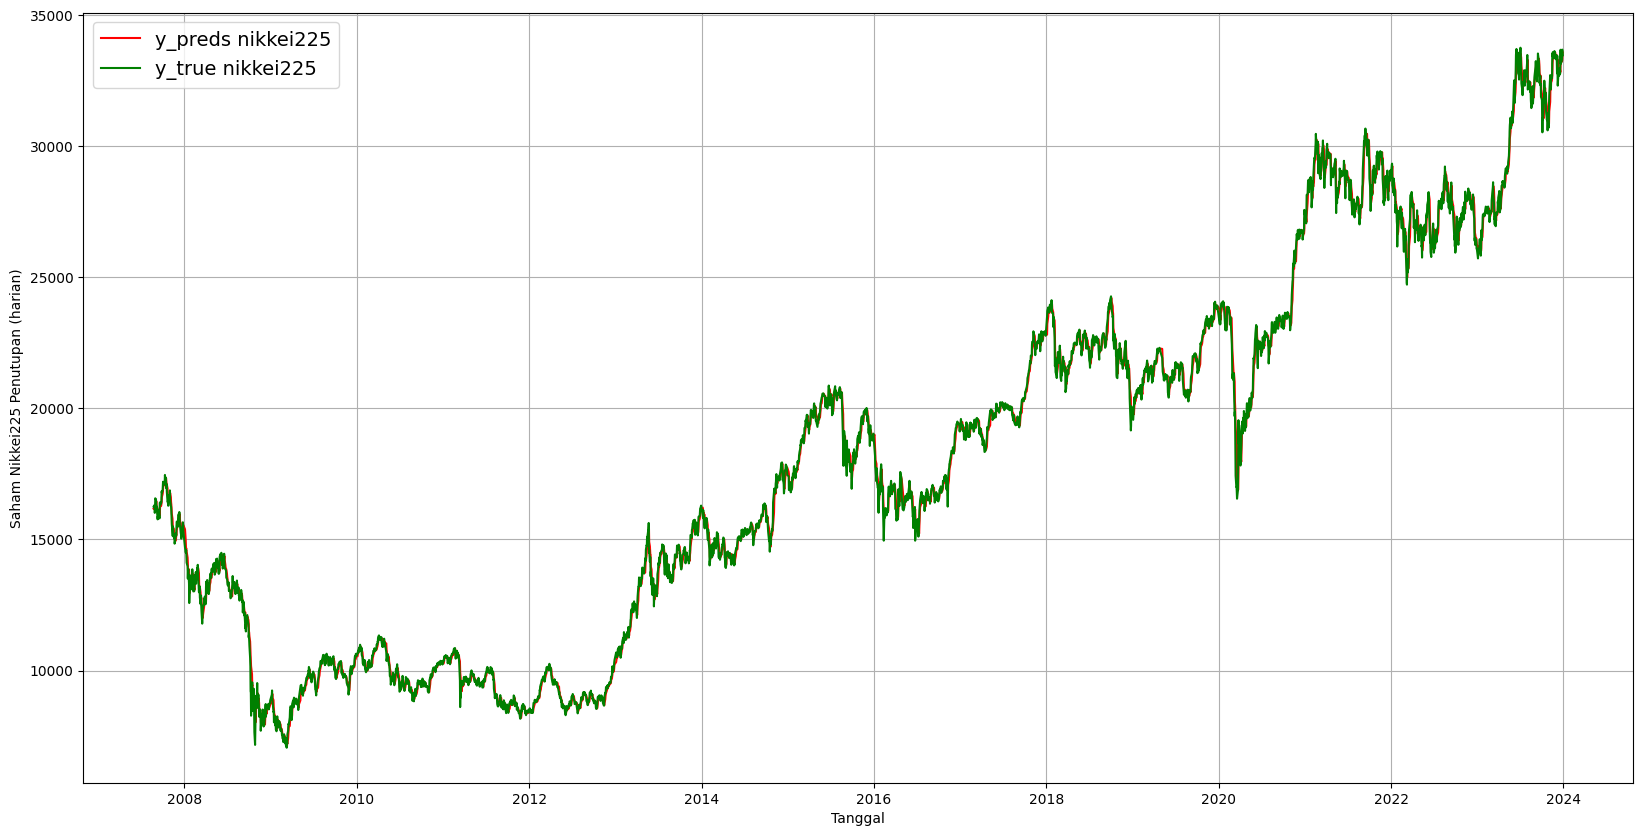

In [ ]:
plt.figure(figsize = (20,10))
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_model_6_preds, format = "-", label = "y_preds nikkei225", color = 'r')
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_test_nikkeiLabels, format = "-", label = "y_true nikkei225", color = 'g')

# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_visualisasi_prediksi_time_series/model_6_plot_prediksi_Conv1D_uni.png')


In [ ]:
from tensorflow.keras.models import save_model

# menyimpan model menjadi .h5 file
save_model(model_6, "/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_saved_models/model_6_Conv1D_univariate.h5")


<ipython-input-290-29855cbfcbef>:4: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model_6, "/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_saved_models/model_6_Conv1D_univariate.h5")


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model_6 = load_model("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_saved_models/model_6_Conv1D_univariate.h5")


# Model 7: LSTM Univariate

## Tuner Builder

In [ ]:
# membuat model LSTM dengan hyperparameter tuning

def model_LSTM_uni_builder(hp):
  tf.random.set_seed(42)

  model_7 = tf.keras.models.Sequential([
          tf.keras.layers.LSTM(units = hp.Int('lstm_n_units', min_value=32, max_value=256, step=32),
                               input_shape=(WINDOW_SIZE, 1),
                               return_sequences = False,
                               activation = "relu"),
          #tf.keras.layers.Dropout(0.2),
          #tf.keras.layers.LSTM(128, return_sequences=False, activation = "relu"),

          tf.keras.layers.Dense(1, activation = "relu")
          ], name = "model_7_LSTM_univariate")



  #compile model 2
  model_7.compile(loss="mae",
                  optimizer = tf.keras.optimizers.Adam(hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])))

  return model_7

In [ ]:
import keras_tuner as kt

tuner_LSTM_uni = kt.Hyperband(model_LSTM_uni_builder,
                     objective='val_loss',
                     max_epochs=10,
                     factor=3,
                     directory='/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_tuning_logs',
                     project_name='LSTM_univariate')

Reloading Tuner from /content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_tuning_logs/LSTM_univariate/tuner0.json


## Proses tuning


In [ ]:
tuner_LSTM_uni.search(train_nikkeiWindows,
                      train_nikkeiLabels,
                      epochs=10,
                      validation_data=(test_nikkeiWindows, test_nikkeiLabels),
                      batch_size = 128)

## Hasil parameter tuning terbaik

In [ ]:
# Get the optimal hyperparameters
best_hps=tuner_LSTM_uni.get_best_hyperparameters(num_trials=1)[0]

tuning = ['lstm_n_units', 'learning_rate']
print('Best tune model LSTM univariate:')
for tune in tuning:
  print(f'{tune}: {best_hps.get(tune)}')

Best tune model LSTM univariate:
lstm_n_units: 224
learning_rate: 0.01


## Hasil parameter semua tuning

In [ ]:
tuning =['lstm_n_units', 'learning_rate']
hps_dict = dict(zip(tuning, [[] for _ in range(len(tuning))]))

hps_all =tuner_LSTM_uni.get_best_hyperparameters(num_trials=30)
for hps in hps_all :
  for t in tuning:
    hps_dict[t].append(hps.get(t))

df_hyparam= pd.DataFrame(hps_dict)
df_hyparam.to_csv('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_best_hyperparameter_models/hp_LSTM_uni.csv')
df_hyparam


lstm_n_units  learning_rate
0            224         0.0100
1             64         0.0100
2            224         0.0100
3             96         0.0001
4             64         0.0010
5            128         0.0010
6            128         0.0001
7             64         0.0010
8            224         0.0010
9            256         0.0001
10           128         0.0001
11           256         0.0001
12           256         0.0001
13           160         0.0001
14           128         0.0001
15           192         0.0001
16           224         0.0010
17           192         0.0001
18           160         0.0010
19            32         0.0001
20           128         0.0100
21            96         0.0100
22            32         0.0010
23           160         0.0100
24           192         0.0100
25           256         0.0100
26            32         0.0100
27           224         0.0001
28            64         0.0001
29           192         0.0010

In [ ]:
tuner_LSTM_uni.results_summary(num_trials=30)

Results summary
Results in /content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_tuning_logs/LSTM_univariate
Showing 30 best trials
Objective(name="val_loss", direction="min")

Trial 0024 summary
Hyperparameters:
lstm_n_units: 224
learning_rate: 0.01
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0019
Score: 0.005055530462414026

Trial 0028 summary
Hyperparameters:
lstm_n_units: 64
learning_rate: 0.01
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.005483218934386969

Trial 0019 summary
Hyperparameters:
lstm_n_units: 224
learning_rate: 0.01
tuner/epochs: 4
tuner/initial_epoch: 0
tuner/bracket: 1
tuner/round: 0
Score: 0.00602444913238287

Trial 0029 summary
Hyperparameters:
lstm_n_units: 96
learning_rate: 0.0001
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.006940939463675022

Trial 0025 summary
Hyperparameters:
lstm_n_units: 64
learning_rate: 0.001
tuner/epochs: 10
tuner/initia

## Mengimplementasikan hyperparameter terbaik ke model

In [ ]:
# best hyperparameter digunakan untuk hyperparameter model yang dibuat
model_7 = tuner_LSTM_uni.hypermodel.build(best_hps)

## Melatih model

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model_7 = load_model("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_saved_models/model_7_LSTM_univariate.h5")


In [ ]:

# fit
history = model_7.fit(train_nikkeiWindows,
            train_nikkeiLabels,
            batch_size=128,
            epochs = 50,
            verbose = 1,
            validation_data = (test_nikkeiWindows, test_nikkeiLabels),
            callbacks = [create_model_checkpoint(model_name = model_7.name)])

Epoch 1/50
125/126 [============================>.] - ETA: 0s - loss: 0.0205
Epoch 1: val_loss improved from inf to 0.01149, saving model to /content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_model_best_epoch/model_7_LSTM_univariate
126/126 [==============================] - 11s 78ms/step - loss: 0.0204 - val_loss: 0.0115
Epoch 2/50
126/126 [==============================] - ETA: 0s - loss: 0.0084
Epoch 2: val_loss improved from 0.01149 to 0.01002, saving model to /content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_model_best_epoch/model_7_LSTM_univariate
126/126 [==============================] - 7s 54ms/step - loss: 0.0084 - val_loss: 0.0100
Epoch 3/50
126/126 [==============================] - ETA: 0s - loss: 0.0090
Epoch 3: val_loss did not improve from 0.01002
126/126 [==============================] - 6s 51ms/step - loss: 0.0090 - val_loss: 0.0180
Epoch 4/50
126/126 [==============================] - ETA: 0s - loss: 0.0064
Epoch 4: val_loss did not improve from 0.01002
126

visualisasi model shape

In [ ]:
model_7.summary()

Model: "model_7_LSTM_univariate"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 224)               202496    
                                                                 
 dense_9 (Dense)             (None, 1)                 225       
                                                                 
Total params: 202721 (791.88 KB)
Trainable params: 202721 (791.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


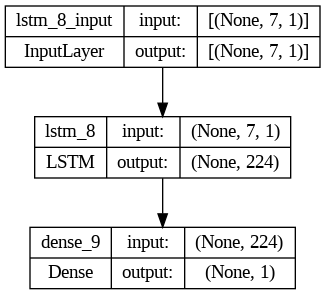

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model_7, to_file='/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_model_plot/model_LSTM_uni_shape.png', show_shapes=True, show_layer_names=True)


visualisasi loss setiap epoch

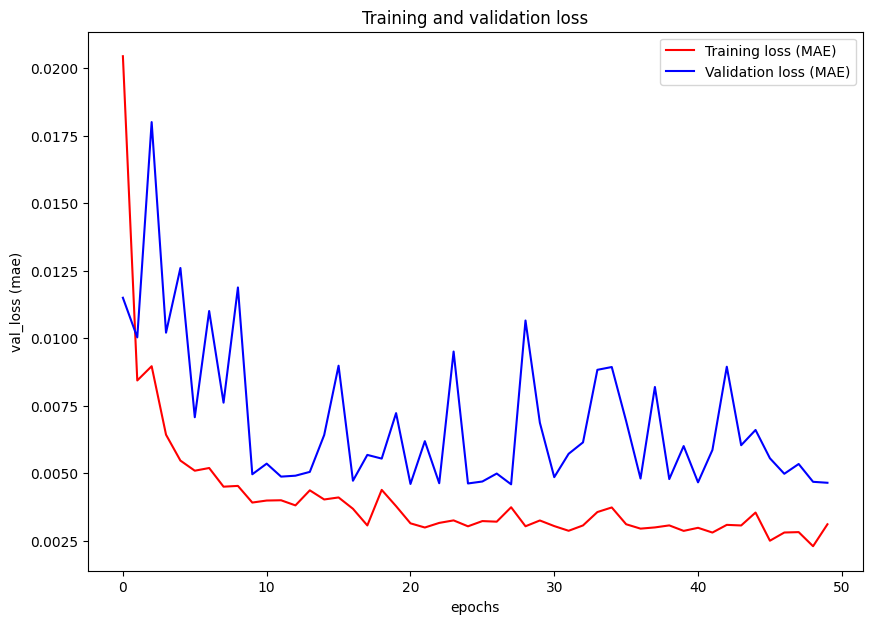

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
plt.figure(figsize = (10,7))
loss = history.history[ 'loss' ]
val_loss = history.history['val_loss' ]
epochs = range(len(loss)) # Get number of epochs
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label='Training loss (MAE)')
plt.plot(epochs, val_loss, 'b', label='Validation loss (MAE)')
plt.title ('Training and validation loss')
plt.ylabel("val_loss (mae)")
plt.xlabel("epochs")
plt.legend(loc=0)



# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_model_loss_visualization/loss_LSTM_uni.png')



# Membuat DataFrame loss dan val_loss
df_loss = pd.DataFrame({
    'Epoch': epochs,
    'Training Loss': loss,
    'Validation Loss': val_loss
})

# simpan visualisasi loss per epoch menjadi CSV file
df_loss.to_csv('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_model_loss_value_per_epoch/loss_LSTM_uni.csv', index=False)


In [ ]:
# mengevaluasi model 7 dari epochs terakhir
model_7.evaluate(test_nikkeiWindows, test_nikkeiLabels)

126/126 [==============================] - 1s 8ms/step - loss: 0.0046


0.0046391538344323635

In [ ]:
# mengevaluasi dan load model 7 pada best epoch yang loss mae paling kecil sepanjang training

model_7 = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_model_best_epoch/model_7_LSTM_univariate")
model_7.evaluate(test_nikkeiWindows, test_nikkeiLabels)


126/126 [==============================] - 1s 8ms/step - loss: 0.0046


0.0045818244107067585

In [ ]:
# membuat predicted value berdasarkan model multivariate model_7 yang sudah di train

model_7_preds = tf.squeeze(model_7.predict(test_nikkeiWindows))
model_7_preds



126/126 [==============================] - 1s 8ms/step


<tf.Tensor: shape=(4001,), dtype=float32, numpy=
array([0.41888916, 0.41529945, 0.41785768, ..., 0.858804  , 0.8692246 ,
       0.86242586], dtype=float32)>

In [ ]:
model_7_preds[:2]

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.41888916, 0.41529945], dtype=float32)>

## Denormalisasi nilai output prediksi dan test_labels

In [ ]:
denormalized_model_7_preds = scaler_univariate.inverse_transform([model_7_preds])
denormalized_test_nikkeiLabels = scaler_univariate.inverse_transform([test_nikkeiLabels])

In [ ]:
denormalized_model_7_preds = tf.squeeze(denormalized_model_7_preds)
denormalized_test_nikkeiLabels = tf.squeeze(denormalized_test_nikkeiLabels)

In [ ]:
# mengukur predicted value dengan metrik evaluasi regresion problem

model_7_results = evaluate_preds(y_true = denormalized_test_nikkeiLabels,
                                 y_pred = denormalized_model_7_preds)

model_7_results

{'mae': 177.91505,
 'mse': 63474.37,
 'rmse': 251.94121,
 'mape': 1.0555923,
 'R-square': 0.9987162628502906}

In [ ]:
tf.squeeze(test_nikkeiLabels[:])

<tf.Tensor: shape=(4001,), dtype=float64, numpy=
array([0.41626222, 0.41761218, 0.41725422, ..., 0.86519324, 0.86154612,
       0.85960307])>

In [ ]:
test_nikkeiLabels[:]

array([0.41626222, 0.41761218, 0.41725422, ..., 0.86519324, 0.86154612,
       0.85960307])

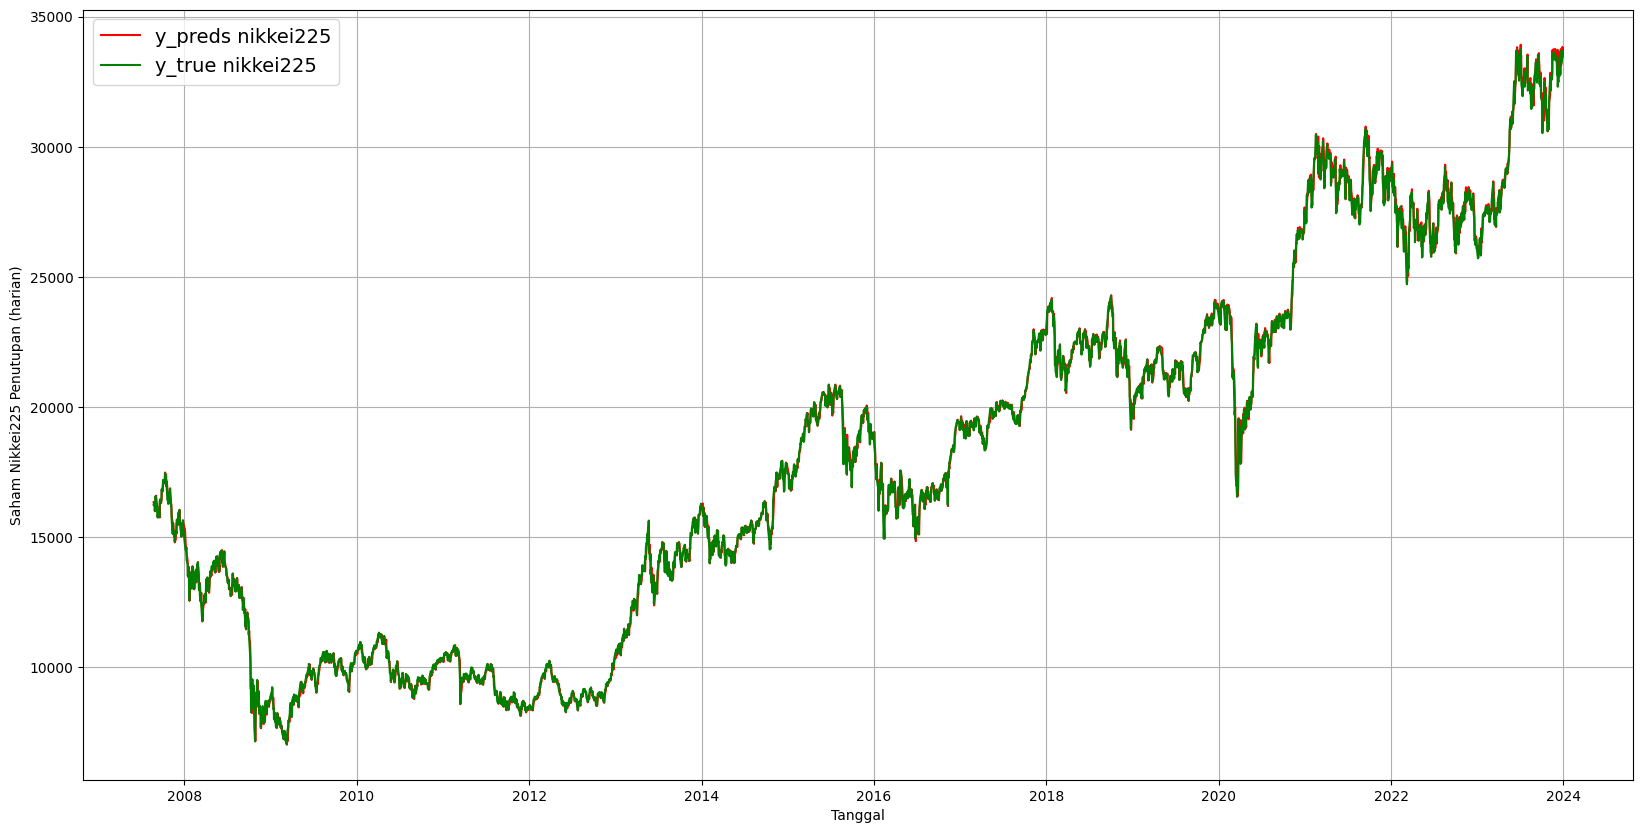

In [ ]:
plt.figure(figsize = (20,10))
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_model_7_preds, format = "-", label = "y_preds nikkei225", color = 'r')
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_test_nikkeiLabels, format = "-", label = "y_true nikkei225", color = 'g')

# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_visualisasi_prediksi_time_series/model_7_plot_prediksi_LSTM_uni.png')


simpan model trained ke bentuk h5.

In [ ]:
from tensorflow.keras.models import save_model

# menyimpan model menjadi .h5 file
save_model(model_7, "/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_saved_models/model_7_LSTM_univariate.h5")


<ipython-input-310-222b72276302>:4: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model_7, "/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_saved_models/model_7_LSTM_univariate.h5")


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model_7 = load_model("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_saved_models/model_7_LSTM_univariate.h5")


 # Model 8 : Stacked LSTM univariate

## Tuner builder

In [ ]:
# membuat model LSTM dengan hyperparameter tuning
def model_stackedLSTM_uni_builder(hp):

  tf.random.set_seed(42)
  model_8 = tf.keras.models.Sequential([
          tf.keras.layers.LSTM(units =  hp.Int('lstm_n_units', min_value=32, max_value=256, step=32),
                              input_shape=(WINDOW_SIZE, 1),
                              return_sequences = True,
                              activation = "relu"),

          #tf.keras.layers.Dropout(0.2, seed=42),
          tf.keras.layers.LSTM(units = hp.Int('lstm_n_units_2', min_value=32, max_value=256, step=32),
                              return_sequences = False,
                              activation = "relu"),

          #tf.keras.layers.LSTM(128, return_sequences=False, activation = "relu"),

          tf.keras.layers.Dense(1)
          ], name = "model_8_stackedLSTM_univariate")


  #compile model 8
  model_8.compile(loss="mae",
                  optimizer = tf.keras.optimizers.Adam(hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])))

  return model_8

In [ ]:
import keras_tuner as kt

tuner_stackedLSTM_uni = kt.Hyperband(model_stackedLSTM_uni_builder,
                     objective='val_loss',
                     max_epochs=10,
                     factor=3,
                     directory='/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_tuning_logs',
                     project_name='stackedLSTM_univariate')

Reloading Tuner from /content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_tuning_logs/stackedLSTM_univariate/tuner0.json


## Proses tuning


In [ ]:
tuner_stackedLSTM_uni.search(train_nikkeiWindows,
                             train_nikkeiLabels,
                             epochs=10,
                             validation_data=(test_nikkeiWindows, test_nikkeiLabels),
                             batch_size = 128)

## Hasil parameter tuning terbaik

In [ ]:
# Get the optimal hyperparameters
best_hps = tuner_stackedLSTM_uni.get_best_hyperparameters(num_trials=1)[0]

tuning = ['lstm_n_units', "lstm_n_units_2", 'learning_rate']
print('Best tune model stacked LSTM univariate:')
for tune in tuning:
  print(f'{tune}: {best_hps.get(tune)}')

Best tune model stacked LSTM univariate:
lstm_n_units: 192
lstm_n_units_2: 224
learning_rate: 0.001


## Hasil semua parameter tuning

In [ ]:
tuning = ['lstm_n_units', "lstm_n_units_2", 'learning_rate']
hps_dict = dict(zip(tuning, [[] for _ in range(len(tuning))]))

hps_all = tuner_stackedLSTM_uni.get_best_hyperparameters(num_trials=30)
for hps in hps_all:
  for t in tuning:
    hps_dict[t].append(hps.get(t))

df_hyparam = pd.DataFrame(hps_dict)
df_hyparam.to_csv('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_best_hyperparameter_models/hp_Stacked_LSTM_uni.csv')
df_hyparam


lstm_n_units  lstm_n_units_2  learning_rate
0            192             224         0.0010
1             96             160         0.0010
2            224              64         0.0010
3            256             256         0.0010
4            256             256         0.0010
5             32              96         0.0010
6            256             160         0.0010
7            256             160         0.0010
8            224              64         0.0010
9            128              96         0.0001
10           192              64         0.0010
11           224              64         0.0010
12            64             160         0.0001
13            96             160         0.0010
14           192             224         0.0001
15           224              96         0.0010
16            96             160         0.0010
17            64              96         0.0100
18           160              64         0.0001
19            96              64         0.0001
20           224              96         0.0010
21           160             224         0.0100
22            64              96         0.0001
23           128             224         0.0010
24            32             256         0.0100
25           256             128         0.0100
26           160              32         0.0001
27           192              64         0.0010
28            64              32         0.0001
29           192             128         0.0100

In [ ]:
tuner_stackedLSTM_uni.results_summary(num_trials=30)

Results summary
Results in /content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_tuning_logs/stackedLSTM_univariate
Showing 30 best trials
Objective(name="val_loss", direction="min")

Trial 0028 summary
Hyperparameters:
lstm_n_units: 192
lstm_n_units_2: 224
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.007872655987739563

Trial 0017 summary
Hyperparameters:
lstm_n_units: 96
lstm_n_units_2: 160
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0014
Score: 0.007949098013341427

Trial 0016 summary
Hyperparameters:
lstm_n_units: 224
lstm_n_units_2: 64
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0012
Score: 0.007964002899825573

Trial 0024 summary
Hyperparameters:
lstm_n_units: 256
lstm_n_units_2: 256
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0019

## Mengimplementasikan hyperparameter terbaik ke model

In [ ]:
# best hyperparameter digunakan untuk hyperparameter model yang dibuat
model_8 = tuner_stackedLSTM_uni.hypermodel.build(best_hps)

## Melatih model

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model_8 = load_model("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/saved_models/model_8_stackedLSTM_univariate.h5")


In [ ]:

# fit
history = model_8.fit(train_nikkeiWindows,
            train_nikkeiLabels,
            batch_size=128,
            epochs = 50,
            verbose = 1,
            validation_data = (test_nikkeiWindows, test_nikkeiLabels),
            callbacks = [create_model_checkpoint(model_name = model_8.name)])

Epoch 1/50
125/126 [============================>.] - ETA: 0s - loss: 0.0217
Epoch 1: val_loss improved from inf to 0.00932, saving model to /content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_model_best_epoch/model_8_stackedLSTM_univariate
126/126 [==============================] - 20s 139ms/step - loss: 0.0217 - val_loss: 0.0093
Epoch 2/50
125/126 [============================>.] - ETA: 0s - loss: 0.0053
Epoch 2: val_loss did not improve from 0.00932
126/126 [==============================] - 12s 98ms/step - loss: 0.0052 - val_loss: 0.0098
Epoch 3/50
125/126 [============================>.] - ETA: 0s - loss: 0.0054
Epoch 3: val_loss did not improve from 0.00932
126/126 [==============================] - 12s 98ms/step - loss: 0.0054 - val_loss: 0.0148
Epoch 4/50
125/126 [============================>.] - ETA: 0s - loss: 0.0048
Epoch 4: val_loss improved from 0.00932 to 0.00867, saving model to /content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_model_best_epoch/model_8_stackedLS

visualisasi model shape

In [ ]:
model_8.summary()

Model: "model_8_stackedLSTM_univariate"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 7, 192)            148992    
                                                                 
 lstm_10 (LSTM)              (None, 224)               373632    
                                                                 
 dense_10 (Dense)            (None, 1)                 225       
                                                                 
Total params: 522849 (1.99 MB)
Trainable params: 522849 (1.99 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


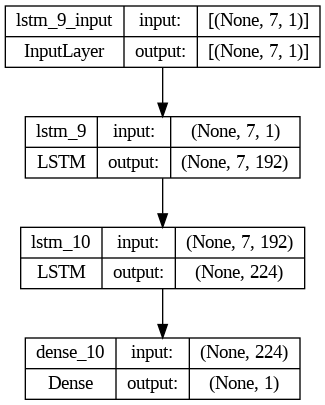

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model_8, to_file='/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_model_plot/model_stackedLSTM_uni_shape.png', show_shapes=True, show_layer_names=True)


visualisasi loss setiap epoch

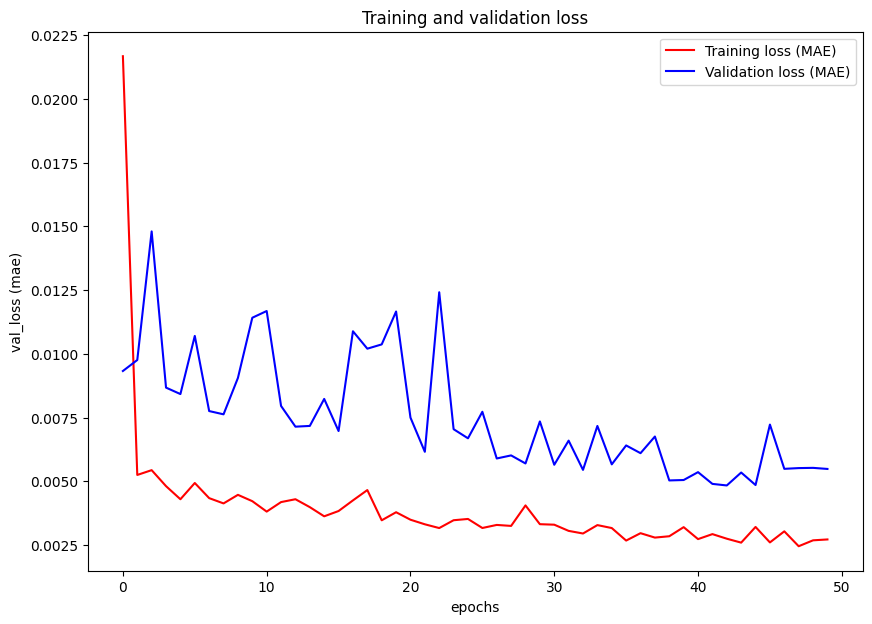

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
plt.figure(figsize = (10,7))
loss = history.history[ 'loss' ]
val_loss = history.history['val_loss' ]
epochs = range(len(loss)) # Get number of epochs
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label='Training loss (MAE)')
plt.plot(epochs, val_loss, 'b', label='Validation loss (MAE)')
plt.title ('Training and validation loss')
plt.ylabel("val_loss (mae)")
plt.xlabel("epochs")
plt.legend(loc=0)


# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_model_loss_visualization/loss_stackedLSTM_uni.png')

# Create a DataFrame from loss and val_loss
df_loss = pd.DataFrame({
    'Epoch': epochs,
    'Training Loss': loss,
    'Validation Loss': val_loss
})

# Save DataFrame to a CSV file
df_loss.to_csv('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_model_loss_value_per_epoch/loss_stackedLSTM_uni.csv', index=False)


In [ ]:
# mengevaluasi model 8 dari epochs terakhir
model_8.evaluate(test_nikkeiWindows, test_nikkeiLabels)

126/126 [==============================] - 2s 14ms/step - loss: 0.0055


0.005483665503561497

In [ ]:
# mengevaluasi dan load model 8 pada best epoch yang loss mae paling kecil sepanjang training

model_8 = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_model_best_epoch/model_8_stackedLSTM_univariate")
model_8.evaluate(test_nikkeiWindows, test_nikkeiLabels)



126/126 [==============================] - 2s 13ms/step - loss: 0.0048


0.004835937637835741

In [ ]:
# membuat predicted value berdasarkan model multivariate model_8 yang sudah di train

model_8_preds = tf.squeeze(model_8.predict(test_nikkeiWindows))
model_8_preds



126/126 [==============================] - 3s 20ms/step


<tf.Tensor: shape=(4001,), dtype=float32, numpy=
array([0.41379   , 0.4154032 , 0.4159326 , ..., 0.85595447, 0.8640624 ,
       0.86240244], dtype=float32)>

In [ ]:
model_8_preds[:2]

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.41379  , 0.4154032], dtype=float32)>

## Denormalisasi nilai output prediksi dan test_labels

In [ ]:
denormalized_model_8_preds = scaler_univariate.inverse_transform([model_8_preds])
denormalized_test_nikkeiLabels = scaler_univariate.inverse_transform([test_nikkeiLabels])

In [ ]:
denormalized_model_8_preds = tf.squeeze(denormalized_model_8_preds)
denormalized_test_nikkeiLabels = tf.squeeze(denormalized_test_nikkeiLabels)

In [ ]:
# mengukur predicted value dengan metrik evaluasi regresion problem

model_8_results = evaluate_preds(y_true = denormalized_test_nikkeiLabels,
                                 y_pred = denormalized_model_8_preds)

model_8_results

{'mae': 187.78247,
 'mse': 68155.3,
 'rmse': 261.0657,
 'mape': 1.1402937,
 'R-square': 0.9986215936244148}

In [ ]:
tf.squeeze(test_nikkeiLabels)

<tf.Tensor: shape=(4001,), dtype=float64, numpy=
array([0.41626222, 0.41761218, 0.41725422, ..., 0.86519324, 0.86154612,
       0.85960307])>

In [ ]:
test_nikkeiLabels[:]

array([0.41626222, 0.41761218, 0.41725422, ..., 0.86519324, 0.86154612,
       0.85960307])

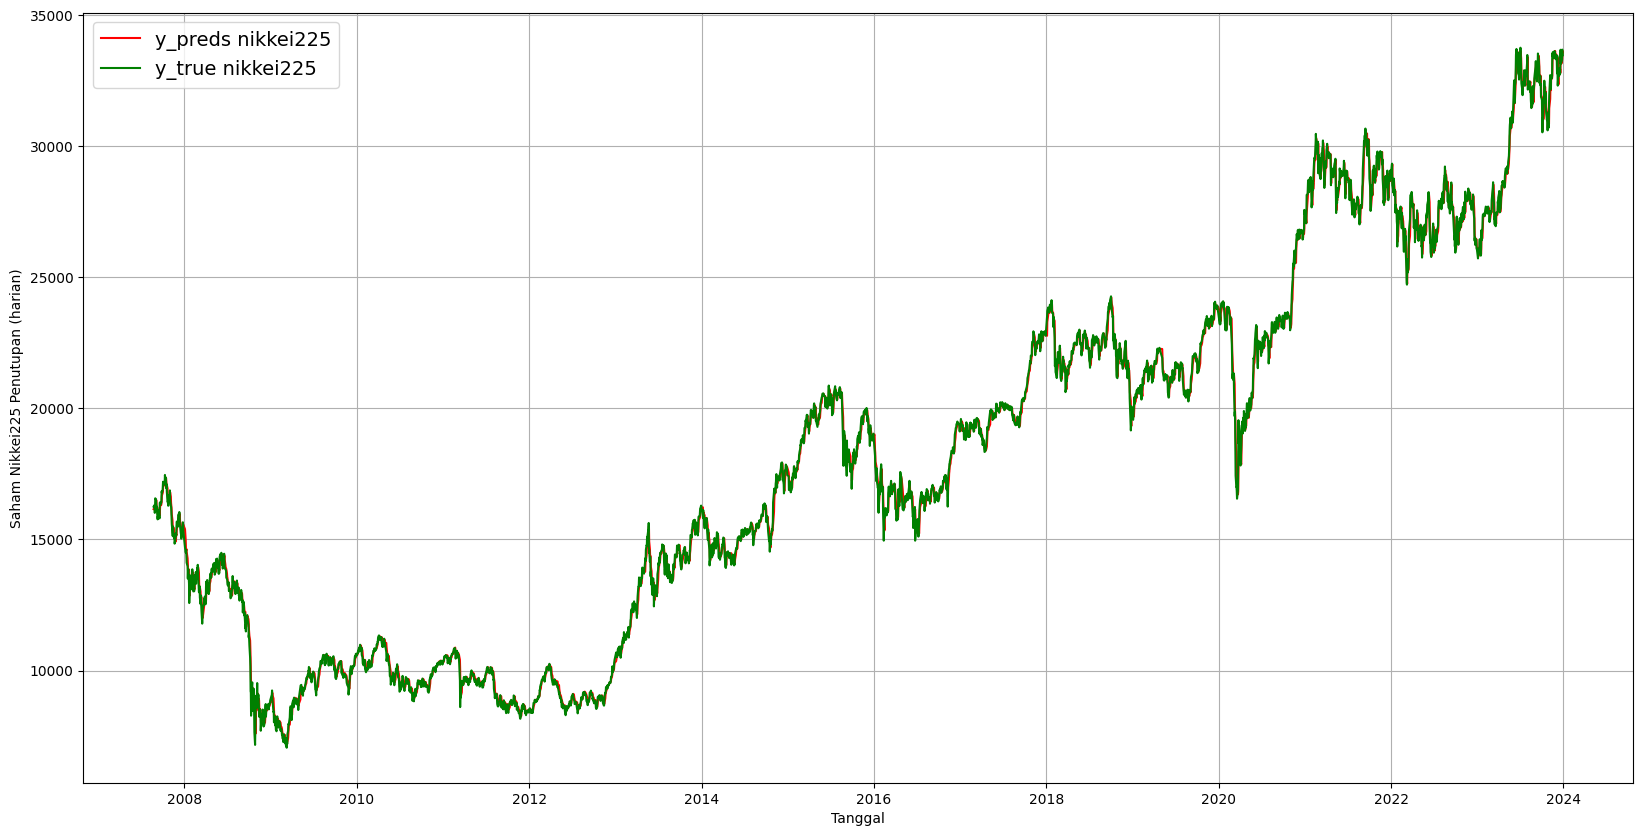

In [ ]:
plt.figure(figsize = (20,10))
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_model_8_preds, format = "-", label = "y_preds nikkei225", color = 'r')
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_test_nikkeiLabels, format = "-", label = "y_true nikkei225", color = 'g')

# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_visualisasi_prediksi_time_series/model_8_plot_prediksi_stackedLSTM_uni.png')


simpan model trained ke bentuk .h5

In [ ]:
from tensorflow.keras.models import save_model

# menyimpan model menjadi .h5 file
save_model(model_8, "/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_saved_models/model_8_stackedLSTM_univariate.h5")


<ipython-input-331-b8b39ec7b5ba>:4: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model_8, "/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_saved_models/model_8_stackedLSTM_univariate.h5")


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model_8 = load_model("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_saved_models/model_8_stackedLSTM_univariate.h5")


# Model 9: Bidirectional LSTM Univariate

In [ ]:
train_nikkeiWindows.shape

(16032, 7)

In [ ]:
test_nikkeiLabels.shape

(4001,)

## Tuner Builder

In [ ]:
def model_bidirectional_LSTM_uni_builder(hp):

  tf.random.set_seed(42)
  model_9 = tf.keras.models.Sequential([
          #tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis = 1)),
          tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1), # ini lambda layer sumberny dari bangkit C4W3 lab1
                        input_shape=[WINDOW_SIZE]),

          tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units = hp.Int('bi_lstm_n_units', min_value=32, max_value=256, step=32),
                                                             input_shape=(WINDOW_SIZE, 1),
                                                             return_sequences = False,
                                                             activation = "relu")),
          #tf.keras.layers.Dropout(0.2, seed=42),
          #tf.keras.layers.LSTM(128, return_sequences = False, activation = "relu"),

          #tf.keras.layers.LSTM(128, return_sequences=False, activation = "relu"),

          tf.keras.layers.Dense(1)
          ], name = "model_9_bidirectionalLSTM_univariate")


  #compile model 2
  model_9.compile(loss="mae",
                  optimizer = tf.keras.optimizers.Adam(hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])))

  return model_9

In [ ]:
import keras_tuner as kt

tuner_bi_LSTM_uni = kt.Hyperband(model_bidirectional_LSTM_uni_builder,
                     objective='val_loss',
                     max_epochs=10,
                     factor=3,
                     directory='/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_tuning_logs',
                     project_name='bi_LSTM_univariate')

Reloading Tuner from /content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_tuning_logs/bi_LSTM_univariate/tuner0.json


## Proses tuning


In [ ]:
tuner_bi_LSTM_uni.search(train_nikkeiWindows,
                         train_nikkeiLabels,
                         epochs=10,
                         validation_data=(test_nikkeiWindows, test_nikkeiLabels),
                         batch_size = 128)

## Hasil parameter tuning terbaik

In [ ]:
# Get the optimal hyperparameters
best_hps=tuner_bi_LSTM_uni.get_best_hyperparameters(num_trials=1)[0]

tuning = ["bi_lstm_n_units", 'learning_rate']
print('Best tune model bidirectional LSTM univariate:')
for tune in tuning:
  print(f'{tune}: {best_hps.get(tune)}')

Best tune model bidirectional LSTM univariate:
bi_lstm_n_units: 128
learning_rate: 0.01


## Hasil semua parameter tuning

In [ ]:
tuning = ["bi_lstm_n_units", 'learning_rate']
hps_dict = dict(zip(tuning, [[] for _ in range(len(tuning))]))

hp_all=tuner_bi_LSTM_uni.get_best_hyperparameters(num_trials=30)
for hps in hp_all:
  for t in tuning:
    hps_dict[t].append(hps.get(t))

df_hyparam= pd.DataFrame(hps_dict)
df_hyparam.to_csv('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_best_hyperparameter_models/hp_bi_LSTM_uni.csv')
df_hyparam


bi_lstm_n_units  learning_rate
0               128         0.0100
1               256         0.0010
2               192         0.0010
3                64         0.0010
4               224         0.0010
5                96         0.0010
6               224         0.0010
7                32         0.0100
8                64         0.0010
9               192         0.0010
10              224         0.0010
11              160         0.0010
12              128         0.0100
13              256         0.0100
14              128         0.0001
15              192         0.0001
16              128         0.0100
17               96         0.0001
18              160         0.0001
19              160         0.0001
20               96         0.0001
21              224         0.0001
22               32         0.0010
23              128         0.0010
24              160         0.0100
25              224         0.0100
26               96         0.0100
27              192         0.0100
28               64         0.0100
29               32         0.0001

In [ ]:
tuner_bi_LSTM_uni.results_summary(num_trials=10)

Results summary
Results in /content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_tuning_logs/bi_LSTM_univariate
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 0017 summary
Hyperparameters:
bi_lstm_n_units: 128
learning_rate: 0.01
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0013
Score: 0.005535518750548363

Trial 0026 summary
Hyperparameters:
bi_lstm_n_units: 256
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.0064878808334469795

Trial 0025 summary
Hyperparameters:
bi_lstm_n_units: 192
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0023
Score: 0.006749097723513842

Trial 0024 summary
Hyperparameters:
bi_lstm_n_units: 64
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0020
Score: 0.006998889613896608

Trial 0016 summary
Hyperparameters:
bi_ls

## Mengimplementasikan hyperparameter terbaik ke model

In [ ]:
# best hyperparameter digunakan untuk hyperparameter model yang dibuat
model_9 = tuner_bi_LSTM_uni.hypermodel.build(best_hps)

## Melatih model

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model_9 = load_model("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/saved_models/model_9_bidirectionalLSTM_univariate.h5")


In [ ]:

# fit
history = model_9.fit(train_nikkeiWindows,
            train_nikkeiLabels,
            batch_size=128,
            epochs = 50,
            verbose = 1,
            validation_data = (test_nikkeiWindows, test_nikkeiLabels),
            callbacks = [create_model_checkpoint(model_name = model_9.name)])

Epoch 1/50
125/126 [============================>.] - ETA: 0s - loss: 0.0177
Epoch 1: val_loss improved from inf to 0.01163, saving model to /content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_model_best_epoch/model_9_bidirectionalLSTM_univariate
126/126 [==============================] - 14s 93ms/step - loss: 0.0177 - val_loss: 0.0116
Epoch 2/50
125/126 [============================>.] - ETA: 0s - loss: 0.0066
Epoch 2: val_loss improved from 0.01163 to 0.00962, saving model to /content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_model_best_epoch/model_9_bidirectionalLSTM_univariate
126/126 [==============================] - 10s 83ms/step - loss: 0.0066 - val_loss: 0.0096
Epoch 3/50
125/126 [============================>.] - ETA: 0s - loss: 0.0069
Epoch 3: val_loss did not improve from 0.00962
126/126 [==============================] - 5s 36ms/step - loss: 0.0069 - val_loss: 0.0159
Epoch 4/50
125/126 [============================>.] - ETA: 0s - loss: 0.0058
Epoch 4: val_loss impro

visualisasi model shape

In [ ]:
model_9.summary()

Model: "model_9_bidirectionalLSTM_univariate"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 7, 1)              0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 256)               133120    
 onal)                                                           
                                                                 
 dense_11 (Dense)            (None, 1)                 257       
                                                                 
Total params: 133377 (521.00 KB)
Trainable params: 133377 (521.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


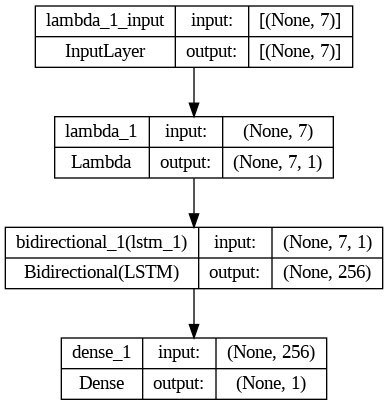

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model_9, to_file='/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_model_plot/model_biLSTM_uni_shape.png', show_shapes=True, show_layer_names=True)


visualisasi loss setiap epoch

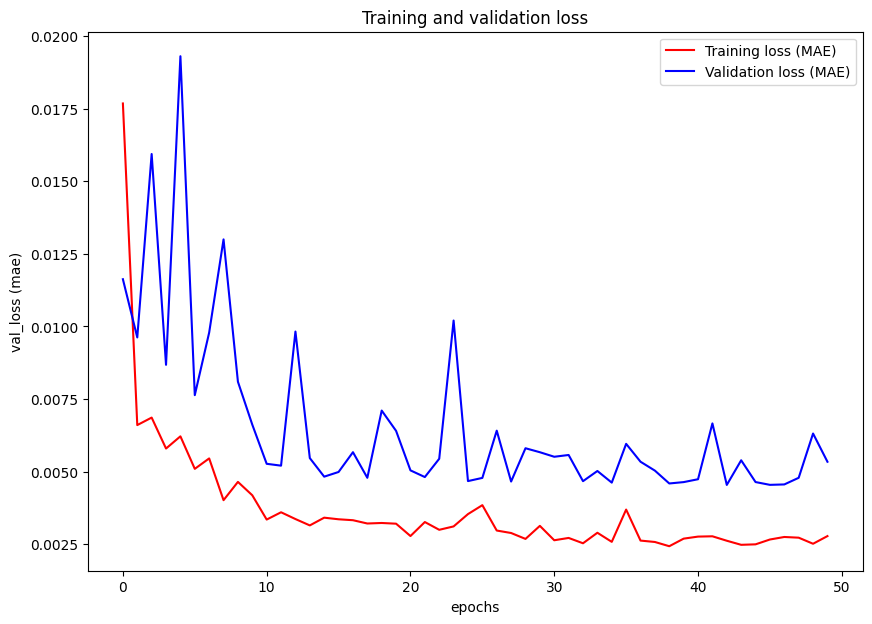

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
plt.figure(figsize = (10,7))
loss = history.history[ 'loss' ]
val_loss = history.history['val_loss' ]
epochs = range(len(loss)) # Get number of epochs
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label='Training loss (MAE)')
plt.plot(epochs, val_loss, 'b', label='Validation loss (MAE)')
plt.title ('Training and validation loss')
plt.ylabel("val_loss (mae)")
plt.xlabel("epochs")
plt.legend(loc=0)


# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_model_loss_visualization/loss_bidirectional_LSTM_uni.png')



# Membuat DataFrame loss dan val_loss
df_loss = pd.DataFrame({
    'Epoch': epochs,
    'Training Loss': loss,
    'Validation Loss': val_loss
})

# simpan visualisasi loss per epoch menjadi CSV file
df_loss.to_csv('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_model_loss_value_per_epoch/loss_bidirectional_LSTM_uni.csv', index=False)


In [ ]:
# mengevaluasi model 6 dari epochs terakhir
model_9.evaluate(test_nikkeiWindows, test_nikkeiLabels)

126/126 [==============================] - 2s 15ms/step - loss: 0.0053


0.005339974071830511

In [ ]:
# mengevaluasi dan load model 6 pada best epoch yang loss mae paling kecil sepanjang training

model_9 = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_model_best_epoch/model_9_bidirectionalLSTM_univariate")
model_9.evaluate(test_nikkeiWindows, test_nikkeiLabels)


126/126 [==============================] - 2s 12ms/step - loss: 0.0045


0.004541304428130388

In [ ]:
# membuat predicted value berdasarkan model multivariate model_1 yang sudah di train

model_9_preds = tf.squeeze(model_9.predict(test_nikkeiWindows))
model_9_preds



126/126 [==============================] - 2s 15ms/step


<tf.Tensor: shape=(4001,), dtype=float32, numpy=
array([0.42055574, 0.41783935, 0.41759554, ..., 0.85512465, 0.86723846,
       0.86270213], dtype=float32)>

In [ ]:
model_9_preds[:2]

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.42055574, 0.41783935], dtype=float32)>

## Denormalisasi nilai output prediksi dan test_labels

In [ ]:
denormalized_model_9_preds = scaler_univariate.inverse_transform([model_9_preds])
denormalized_test_nikkeiLabels = scaler_univariate.inverse_transform([test_nikkeiLabels])

In [ ]:
denormalized_model_9_preds = tf.squeeze(denormalized_model_9_preds)
denormalized_test_nikkeiLabels = tf.squeeze(denormalized_test_nikkeiLabels)

In [ ]:
# mengukur predicted value dengan metrik evaluasi regresion problem

model_9_results = evaluate_preds(y_true = denormalized_test_nikkeiLabels,
                                 y_pred = denormalized_model_9_preds)

model_9_results

{'mae': 176.3417,
 'mse': 62036.688,
 'rmse': 249.07166,
 'mape': 1.0485145,
 'R-square': 0.9987453393352277}

In [ ]:
tf.squeeze(test_nikkeiLabels[:])

<tf.Tensor: shape=(4001,), dtype=float64, numpy=
array([0.41626222, 0.41761218, 0.41725422, ..., 0.86519324, 0.86154612,
       0.85960307])>

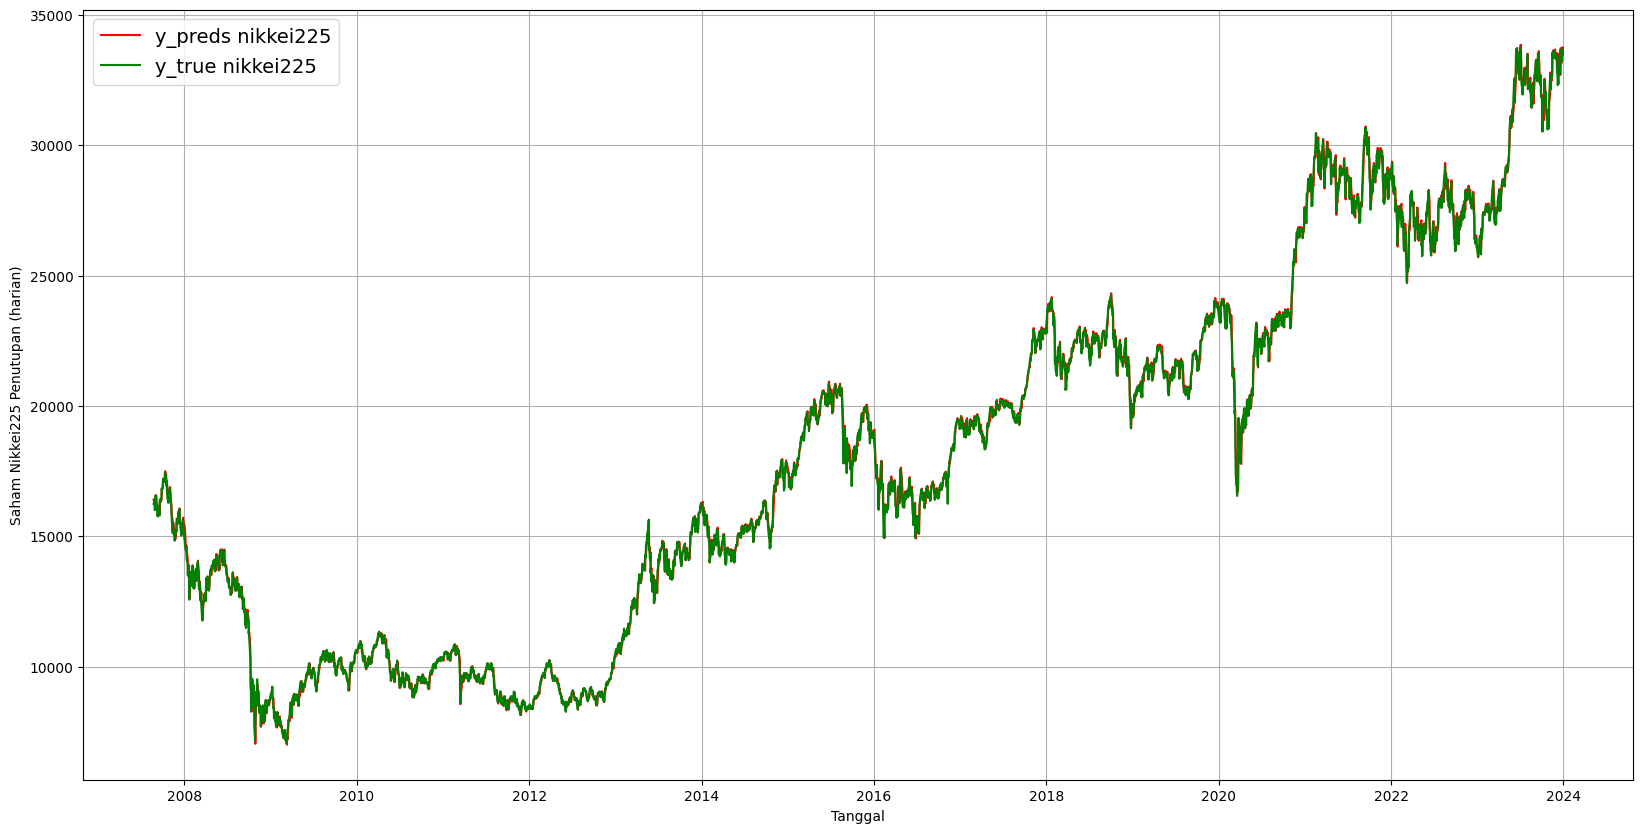

In [ ]:
plt.figure(figsize = (20,10))
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_model_9_preds, format = "-", label = "y_preds nikkei225", color = 'r')
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_test_nikkeiLabels, format = "-", label = "y_true nikkei225", color = 'g')

# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_visualisasi_prediksi_time_series/model_9_plot_prediksi_biLSTM_uni.png')


simpan model trained ke bentuk .h5

In [ ]:
from tensorflow.keras.models import save_model

# menyimpan model menjadi .h5 file
save_model(model_9, "/content/drive/MyDrive/Colab Notebooks/TugasAkhir/saved_models/model_9_bidirectionalLSTM_univariate.h5")



<ipython-input-351-5500300ef09e>:4: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model_9, "/content/drive/MyDrive/Colab Notebooks/TugasAkhir/saved_models/model_9_bidirectionalLSTM_univariate.h5")


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model_9 = load_model("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/saved_models/model_9_bidirectionalLSTM_univariate.h5")


# Model 10: CNN-LSTM Univariate

## Tuner Builder

In [ ]:
#create Conv1D model
def model_CNN_LSTM_uni_builder(hp):
  tf.random.set_seed(42)
  model_10 = tf.keras.models.Sequential([
      #layers.Lambda(lambda x: tf.expand_dims(x, axis = 1)),
      tf.keras.layers.Conv1D(filters=hp.Int('Conv1D_n_filters', min_value=32, max_value=256, step=32),
                             kernel_size=hp.Int('Conv1_kernel_size', min_value=5, max_value=10, step=1),
                             strides=1,
                             padding="causal",
                             activation="relu",
                             input_shape=[WINDOW_SIZE, 1]),

      tf.keras.layers.LSTM(units = hp.Int('LSTM_n_units', min_value=32, max_value=256, step=32),
                           return_sequences=False),

      tf.keras.layers.Dense(1),
      #filters adalah jumlah hidden unit dalam layers tersebut
      # kernel size adalah ukuran dari window. Ex: kernel_size = 7 artinya melihat 7 value sekaligus
      # default nilai strides = 1, ini sudah sesuai karena sliding window bergeser satu timesteps
  ], name = "model_10_CNN-LSTM_univariate")

  #compile model 10
  model_10.compile(loss="mae",
                  optimizer = tf.keras.optimizers.Adam(hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])))

  return model_10

In [ ]:
import keras_tuner as kt

tuner_CNN_LSTM_uni = kt.Hyperband(model_CNN_LSTM_uni_builder,
                     objective='val_loss',
                     max_epochs=10,
                     factor=3,
                     directory='/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_tuning_logs',
                     project_name='CNN_LSTM_univariate')


Reloading Tuner from /content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_tuning_logs/CNN_LSTM_univariate/tuner0.json


## Proses tuning


In [ ]:
tuner_CNN_LSTM_uni.search(train_nikkeiWindows,
                          train_nikkeiLabels,
                          epochs=10,
                          validation_data=(test_nikkeiWindows, test_nikkeiLabels),
                          batch_size = 128)

## Hasil parameter tuning terbaik

In [ ]:
# Get the optimal hyperparameters
best_hps=tuner_CNN_LSTM_uni.get_best_hyperparameters(num_trials=1)[0]

tuning = ['Conv1D_n_filters', 'Conv1_kernel_size', "LSTM_n_units", 'learning_rate']
print('Best tune model bidirectional LSTM univariate:')
for tune in tuning:
  print(f'{tune}: {best_hps.get(tune)}')

Best tune model bidirectional LSTM univariate:
Conv1D_n_filters: 96
Conv1_kernel_size: 6
LSTM_n_units: 192
learning_rate: 0.01


## Hasil semua parameter tuning

In [ ]:
tuning = ['Conv1D_n_filters', 'Conv1_kernel_size', "LSTM_n_units", 'learning_rate']
hps_dict = dict(zip(tuning, [[] for _ in range(len(tuning))]))

hps_all=tuner_CNN_LSTM_uni.get_best_hyperparameters(num_trials=30)
for hps in hps_all:
  for t in tuning:
    hps_dict[t].append(hps.get(t))

df_hyparam= pd.DataFrame(hps_dict)
df_hyparam.to_csv('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_best_hyperparameter_models/hp_CNN_LSTM_uni.csv')
df_hyparam



Conv1D_n_filters  Conv1_kernel_size  LSTM_n_units  learning_rate
0                 96                  6           192         0.0100
1                 32                  5            96         0.0100
2                 64                  9            32         0.0100
3                 32                  5            96         0.0100
4                160                  5           192         0.0001
5                 32                  5            96         0.0100
6                192                  7           256         0.0100
7                 64                  5           224         0.0100
8                224                  9            64         0.0001
9                192                 10            96         0.0001
10               192                  7           256         0.0100
11               160                  5           192         0.0001
12               192                  7            32         0.0100
13                64                  9            32         0.0100
14               160                  5           192         0.0001
15               224                 10            32         0.0001
16               224                 10            32         0.0001
17               256                  5            32         0.0100
18                64                  5           224         0.0100
19               256                  8           160         0.0001
20               128                  7           192         0.0100
21               256                 10           128         0.0001
22               224                  9           224         0.0010
23                96                  9           256         0.0001
24                96                  7           128         0.0100
25                64                  6           224         0.0001
26                64                 10           224         0.0001
27                64                  6           224         0.0010
28                64                  8           160         0.0010
29                96                  6           256         0.0100

In [ ]:
tuner_CNN_LSTM_uni.results_summary(num_trials=30)

Results summary
Results in /content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_tuning_logs/CNN_LSTM_univariate
Showing 30 best trials
Objective(name="val_loss", direction="min")

Trial 0028 summary
Hyperparameters:
Conv1D_n_filters: 96
Conv1_kernel_size: 6
LSTM_n_units: 192
learning_rate: 0.01
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.005977264605462551

Trial 0016 summary
Hyperparameters:
Conv1D_n_filters: 32
Conv1_kernel_size: 5
LSTM_n_units: 96
learning_rate: 0.01
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0012
Score: 0.0060034217312932014

Trial 0025 summary
Hyperparameters:
Conv1D_n_filters: 64
Conv1_kernel_size: 9
LSTM_n_units: 32
learning_rate: 0.01
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0021
Score: 0.00677149323746562

Trial 0008 summary
Hyperparameters:
Conv1D_n_filters: 32
Conv1_kernel_size: 5
LSTM_n_units: 96
learning_rate: 0.01
tuner/epochs

## Mengimplementasikan hyperparameter terbaik ke model

In [ ]:
# best hyperparameter digunakan untuk hyperparameter model yang dibuat
model_10 = tuner_CNN_LSTM_uni.hypermodel.build(best_hps)

## Melatih model

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model_10 = load_model("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_saved_models/model_10_CNN-LSTM_univariate.h5")



In [ ]:

# fit
history = model_10.fit(train_nikkeiWindows,
            train_nikkeiLabels,
            batch_size=128,
            epochs = 50,
            verbose = 1,
            validation_data = (test_nikkeiWindows, test_nikkeiLabels),
            callbacks = [create_model_checkpoint(model_name = model_10.name)])

Epoch 1/50
125/126 [============================>.] - ETA: 0s - loss: 0.0239
Epoch 1: val_loss improved from inf to 0.01107, saving model to /content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_model_best_epoch/model_10_CNN-LSTM_univariate
126/126 [==============================] - 13s 86ms/step - loss: 0.0238 - val_loss: 0.0111
Epoch 2/50
125/126 [============================>.] - ETA: 0s - loss: 0.0083
Epoch 2: val_loss improved from 0.01107 to 0.00750, saving model to /content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_model_best_epoch/model_10_CNN-LSTM_univariate
126/126 [==============================] - 9s 74ms/step - loss: 0.0083 - val_loss: 0.0075
Epoch 3/50
125/126 [============================>.] - ETA: 0s - loss: 0.0098
Epoch 3: val_loss did not improve from 0.00750
126/126 [==============================] - 7s 55ms/step - loss: 0.0097 - val_loss: 0.0081
Epoch 4/50
125/126 [============================>.] - ETA: 0s - loss: 0.0041
Epoch 4: val_loss did not improve from 0

visualisasi model shape

In [ ]:
model_10.summary()

Model: "model_10_CNN-LSTM_univariate"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 7, 96)             672       
                                                                 
 lstm_12 (LSTM)              (None, 192)               221952    
                                                                 
 dense_12 (Dense)            (None, 1)                 193       
                                                                 
Total params: 222817 (870.38 KB)
Trainable params: 222817 (870.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


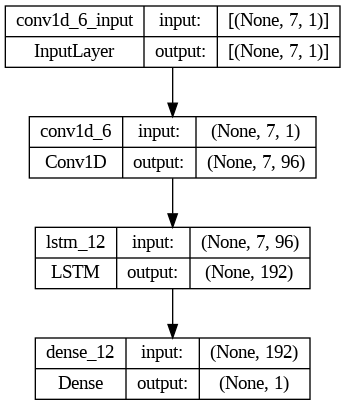

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model_10, to_file='/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_model_plot/model_CNN-LSTM_uni_shape.png', show_shapes=True, show_layer_names=True)


visualisasi loss setiap epoch

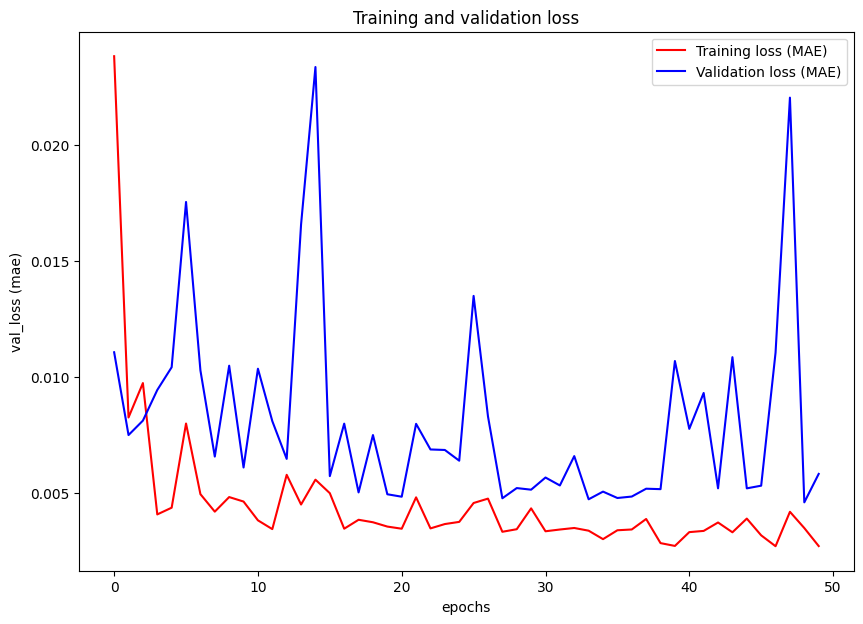

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
plt.figure(figsize = (10,7))
loss = history.history[ 'loss' ]
val_loss = history.history['val_loss' ]
epochs = range(len(loss)) # Get number of epochs
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label='Training loss (MAE)')
plt.plot(epochs, val_loss, 'b', label='Validation loss (MAE)')
plt.title ('Training and validation loss')
plt.ylabel("val_loss (mae)")
plt.xlabel("epochs")
plt.legend(loc=0)



# simpan visualisasi loss per epoch menjadi image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_model_loss_visualization/loss_CNN-LSTM_uni.png')


# Membuat DataFrame loss dan val_loss
df_loss = pd.DataFrame({
    'Epoch': epochs,
    'Training Loss': loss,
    'Validation Loss': val_loss
})

# simpan visualisasi loss per epoch menjadi CSV file
df_loss.to_csv('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_model_loss_value_per_epoch/loss_CNN-LSTM_uni.csv', index=False)


In [ ]:
# mengevaluasi model 6 dari epochs terakhir
model_10.evaluate(test_nikkeiWindows, test_nikkeiLabels)

126/126 [==============================] - 2s 13ms/step - loss: 0.0058


0.005829556379467249

In [ ]:
# mengevaluasi dan load model 6 pada best epoch yang loss mae paling kecil sepanjang training

model_10= tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_model_best_epoch/model_10_CNN-LSTM_univariate")
model_10.evaluate(test_nikkeiWindows, test_nikkeiLabels)


126/126 [==============================] - 2s 8ms/step - loss: 0.0046


0.004603653214871883

In [ ]:
# membuat predicted value berdasarkan model multivariate model_1 yang sudah di train

model_10_preds = tf.squeeze(model_10.predict(test_nikkeiWindows))
model_10_preds



126/126 [==============================] - 2s 8ms/step


<tf.Tensor: shape=(4001,), dtype=float32, numpy=
array([0.416905  , 0.41526145, 0.41748476, ..., 0.85337913, 0.86165273,
       0.8564532 ], dtype=float32)>

In [ ]:
model_10_preds[:2]

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.416905  , 0.41526145], dtype=float32)>

## Denormalisasi nilai output prediksi dan test_labels

In [ ]:
denormalized_model_10_preds = scaler_univariate.inverse_transform([model_10_preds])
denormalized_test_nikkeiLabels = scaler_univariate.inverse_transform([test_nikkeiLabels])

In [ ]:
denormalized_model_10_preds = tf.squeeze(denormalized_model_10_preds)
denormalized_test_nikkeiLabels = tf.squeeze(denormalized_test_nikkeiLabels)

In [ ]:
# mengukur predicted value dengan metrik evaluasi regresion problem

model_10_results = evaluate_preds(y_true = denormalized_test_nikkeiLabels,
                                 y_pred = denormalized_model_10_preds)

model_10_results

{'mae': 178.76276,
 'mse': 64162.027,
 'rmse': 253.30225,
 'mape': 1.0614723,
 'R-square': 0.9987023554850537}

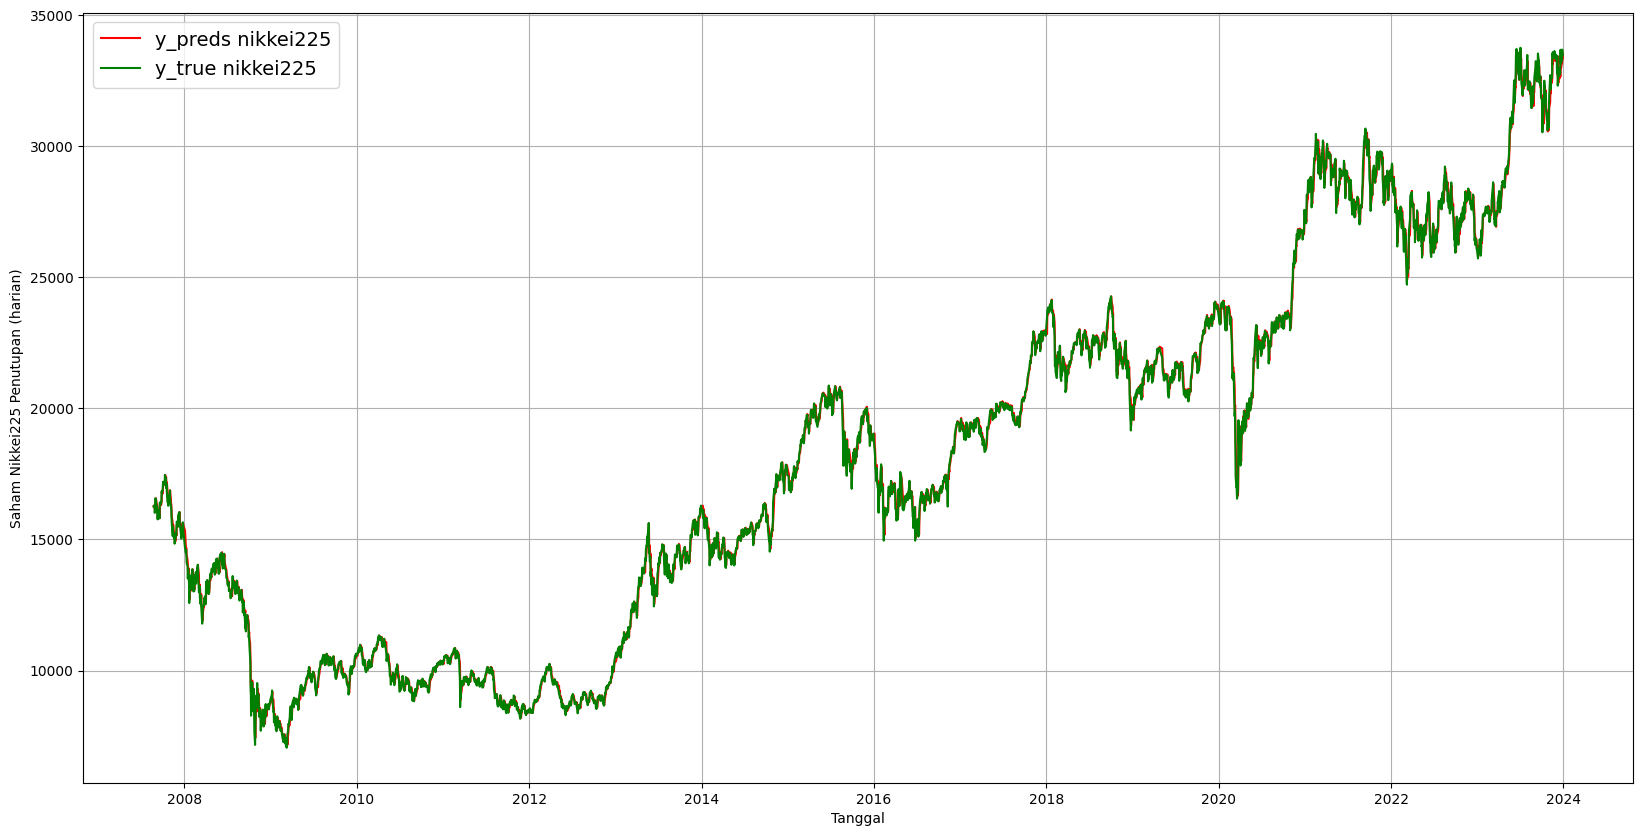

In [ ]:
plt.figure(figsize = (20,10))
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_model_10_preds, format = "-", label = "y_preds nikkei225", color = 'r')
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_test_nikkeiLabels, format = "-", label = "y_true nikkei225", color = 'g')

# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_visualisasi_prediksi_time_series/model_10_plot_prediksi_CNN-LSTM_uni.png')


simpan model trained ke bentuk .h5

In [ ]:
from tensorflow.keras.models import save_model

# menyimpan model menjadi .h5 file
save_model(model_10, "/content/drive/MyDrive/Colab Notebooks/TugasAkhir/saved_models/model_10_CNN-LSTM_univariate.h5")



<ipython-input-369-288d46c51740>:4: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model_10, "/content/drive/MyDrive/Colab Notebooks/TugasAkhir/saved_models/model_10_CNN-LSTM_univariate.h5")


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model_10 = load_model("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/saved_models/model_10_CNN-LSTM_univariate.h5")



# visualisasi hasil evaluasi metrik nilai ternormalisasi

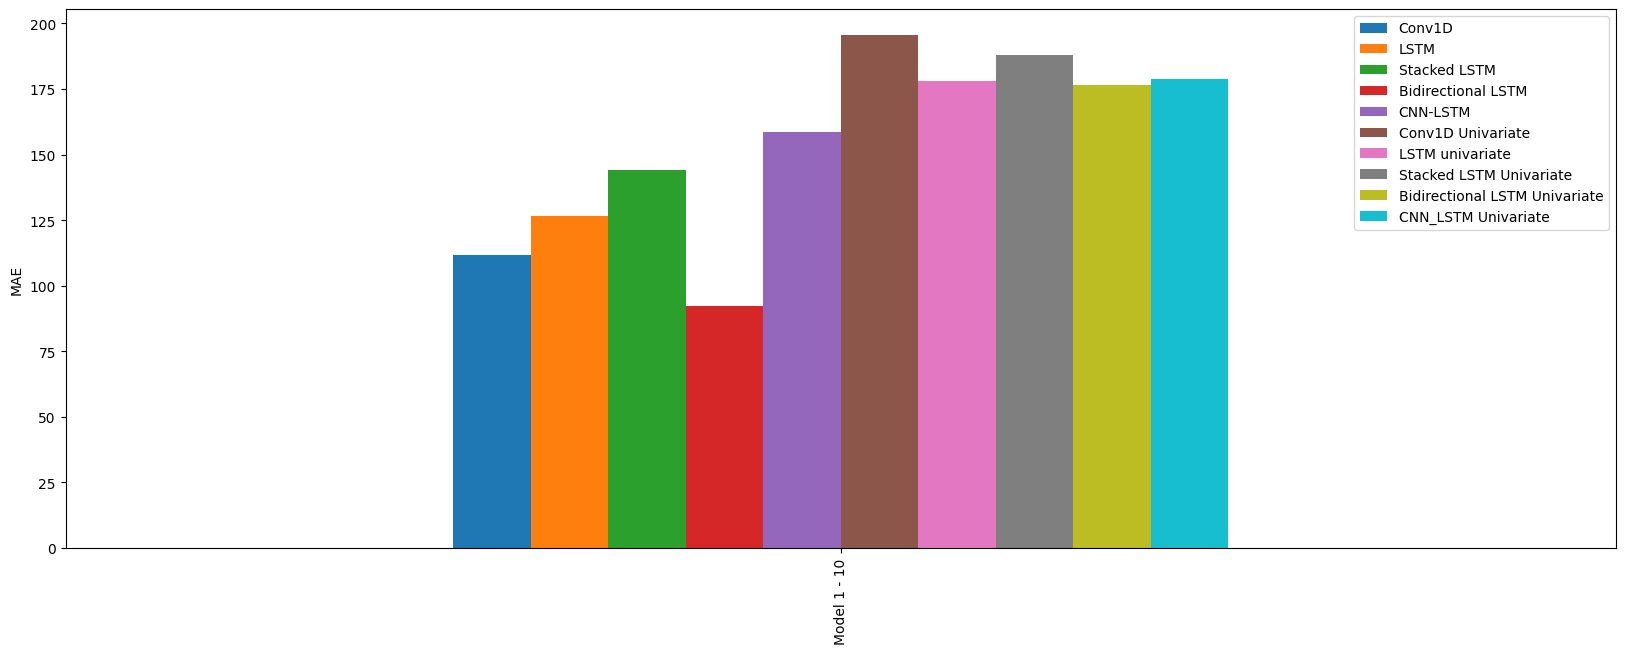

In [ ]:

# membuat dataframe

df = pd.DataFrame({
              "Conv1D": model_1_results["mae"],
              "LSTM": model_2_results["mae"],
              "Stacked LSTM" : model_3_results["mae"],
              "Bidirectional LSTM" : model_4_results["mae"],
              "CNN-LSTM": model_5_results["mae"],
              "Conv1D Univariate" : model_6_results["mae"],
              "LSTM univariate" : model_7_results["mae"],
              "Stacked LSTM Univariate" : model_8_results["mae"],
              "Bidirectional LSTM Univariate" : model_9_results["mae"],
              "CNN_LSTM Univariate" : model_10_results["mae"]},
             index = ["Model 1 - 10"])

# representasi dengan bar chart
ax = df.plot(figsize=(20, 7), kind="bar")
ax.set_ylabel("MAE")

plt.savefig("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_evaluation_metrics/hasil_denormalisasi/MAE_visualization.png")

plt.show()

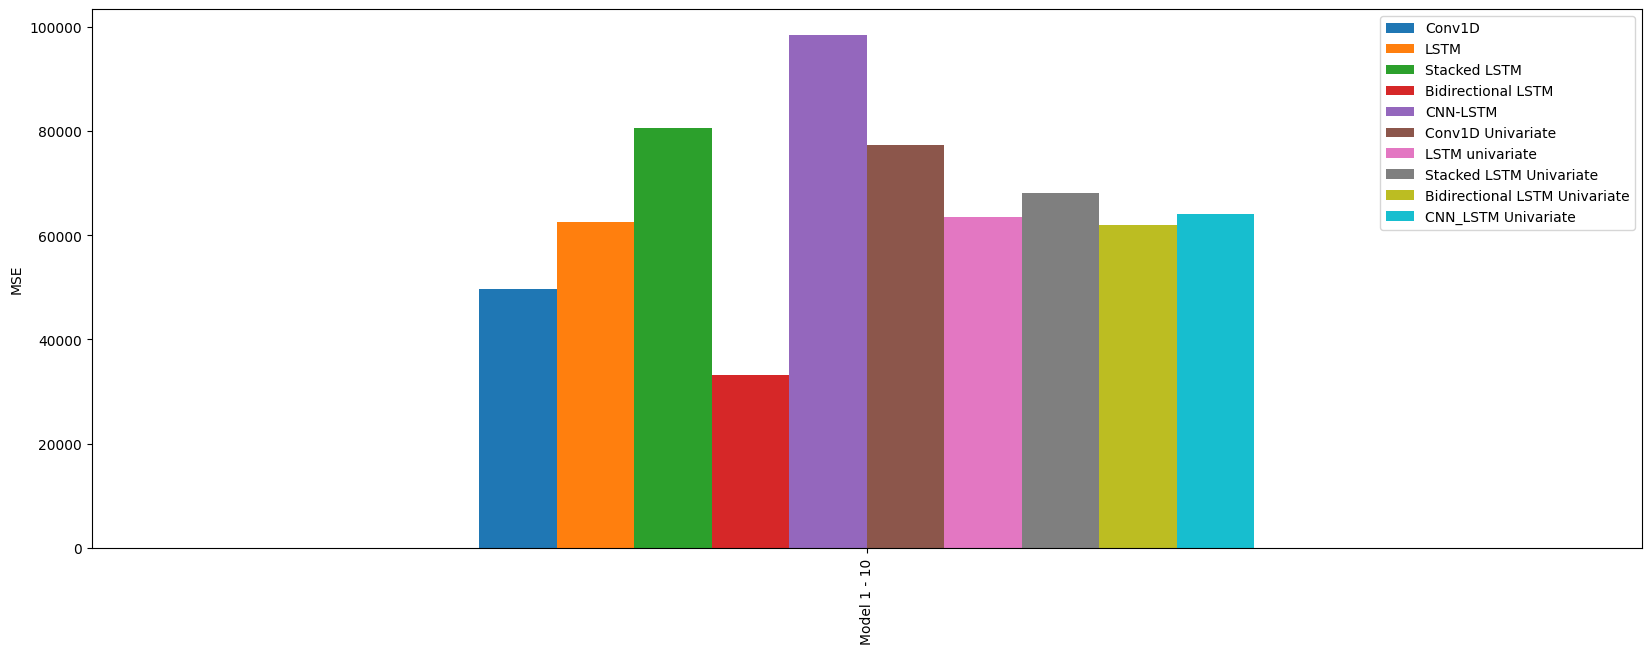

In [ ]:

# membuat dataframe

df = pd.DataFrame({
              "Conv1D": model_1_results["mse"],
              "LSTM": model_2_results["mse"],
              "Stacked LSTM" : model_3_results["mse"],
              "Bidirectional LSTM" : model_4_results["mse"],
              "CNN-LSTM": model_5_results["mse"],
              "Conv1D Univariate" : model_6_results["mse"],
              "LSTM univariate" : model_7_results["mse"],
              "Stacked LSTM Univariate" : model_8_results["mse"],
              "Bidirectional LSTM Univariate" : model_9_results["mse"],
              "CNN_LSTM Univariate" : model_10_results["mse"]},
             index = ["Model 1 - 10"])

# representasi dengan bar chart
ax = df.plot(figsize=(20, 7), kind="bar")
ax.set_ylabel("MSE")

plt.savefig("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_evaluation_metrics/hasil_denormalisasi/MSE_visualization.png")

plt.show()

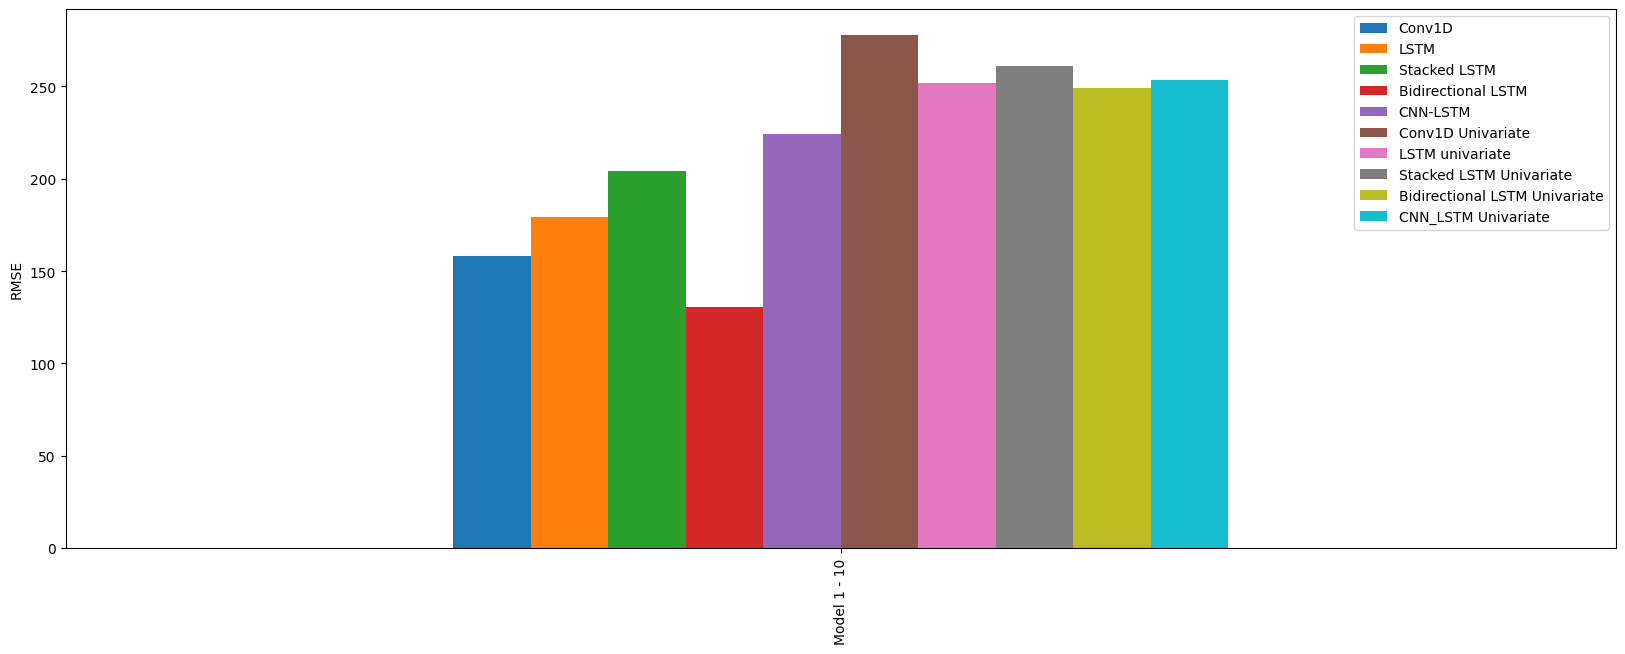

In [ ]:

# membuat dataframe

df = pd.DataFrame({
              "Conv1D": model_1_results["rmse"],
              "LSTM": model_2_results["rmse"],
              "Stacked LSTM" : model_3_results["rmse"],
              "Bidirectional LSTM" : model_4_results["rmse"],
              "CNN-LSTM": model_5_results["rmse"],
              "Conv1D Univariate" : model_6_results["rmse"],
              "LSTM univariate" : model_7_results["rmse"],
              "Stacked LSTM Univariate" : model_8_results["rmse"],
              "Bidirectional LSTM Univariate" : model_9_results["rmse"],
              "CNN_LSTM Univariate" : model_10_results["rmse"]},
             index = ["Model 1 - 10"])

# representasi dengan bar chart
ax = df.plot(figsize=(20, 7), kind="bar")
ax.set_ylabel("RMSE")

plt.savefig("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_evaluation_metrics/hasil_denormalisasi/RMSE_visualization.png")

plt.show()

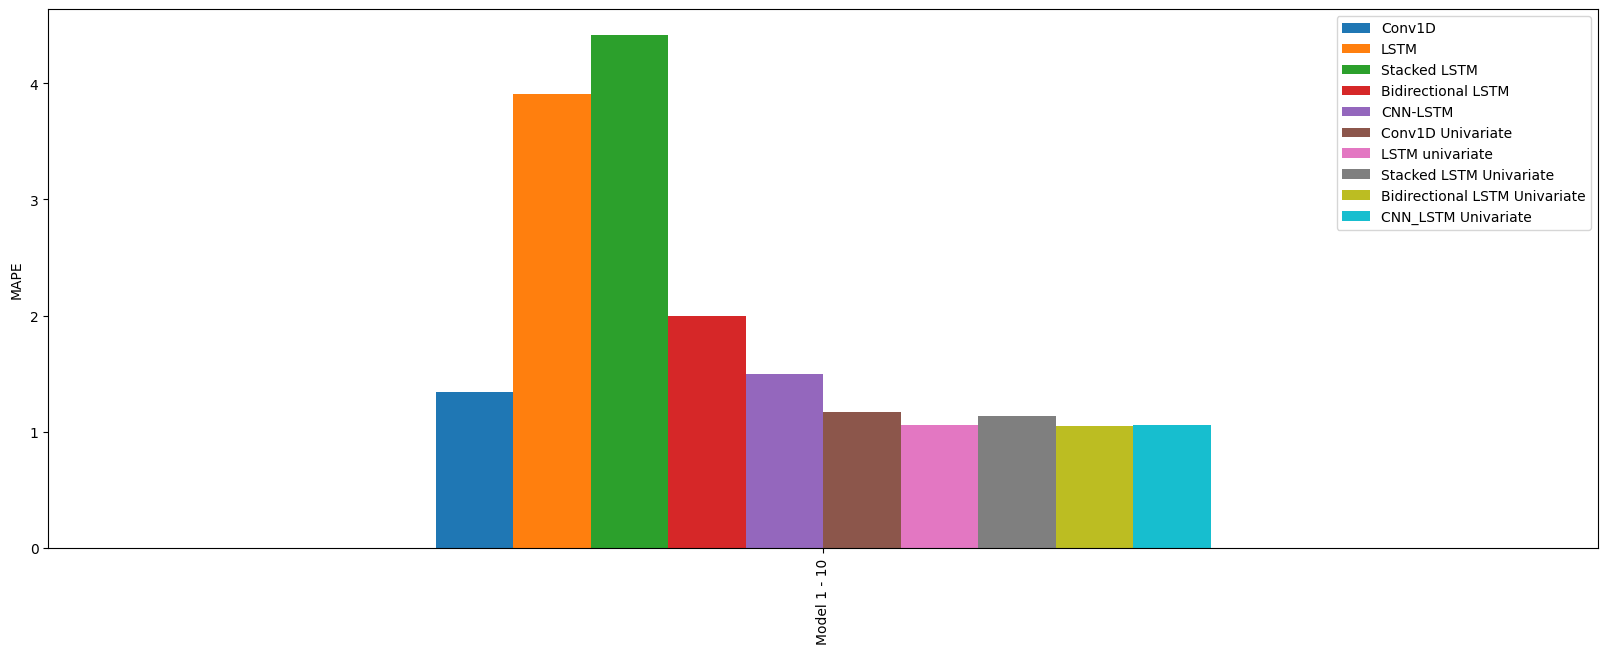

In [ ]:

# membuat dataframe

df = pd.DataFrame({
              "Conv1D": model_1_results["mape"],
              "LSTM": model_2_results["mape"],
              "Stacked LSTM" : model_3_results["mape"],
              "Bidirectional LSTM" : model_4_results["mape"],
              "CNN-LSTM": model_5_results["mape"],
              "Conv1D Univariate" : model_6_results["mape"],
              "LSTM univariate" : model_7_results["mape"],
              "Stacked LSTM Univariate" : model_8_results["mape"],
              "Bidirectional LSTM Univariate" : model_9_results["mape"],
              "CNN_LSTM Univariate" : model_10_results["mape"]},
             index = ["Model 1 - 10"])

# representasi dengan bar chart
ax = df.plot(figsize=(20, 7), kind="bar")
ax.set_ylabel("MAPE")

plt.savefig("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_evaluation_metrics/hasil_denormalisasi/MAPE_visualization.png")

plt.show()

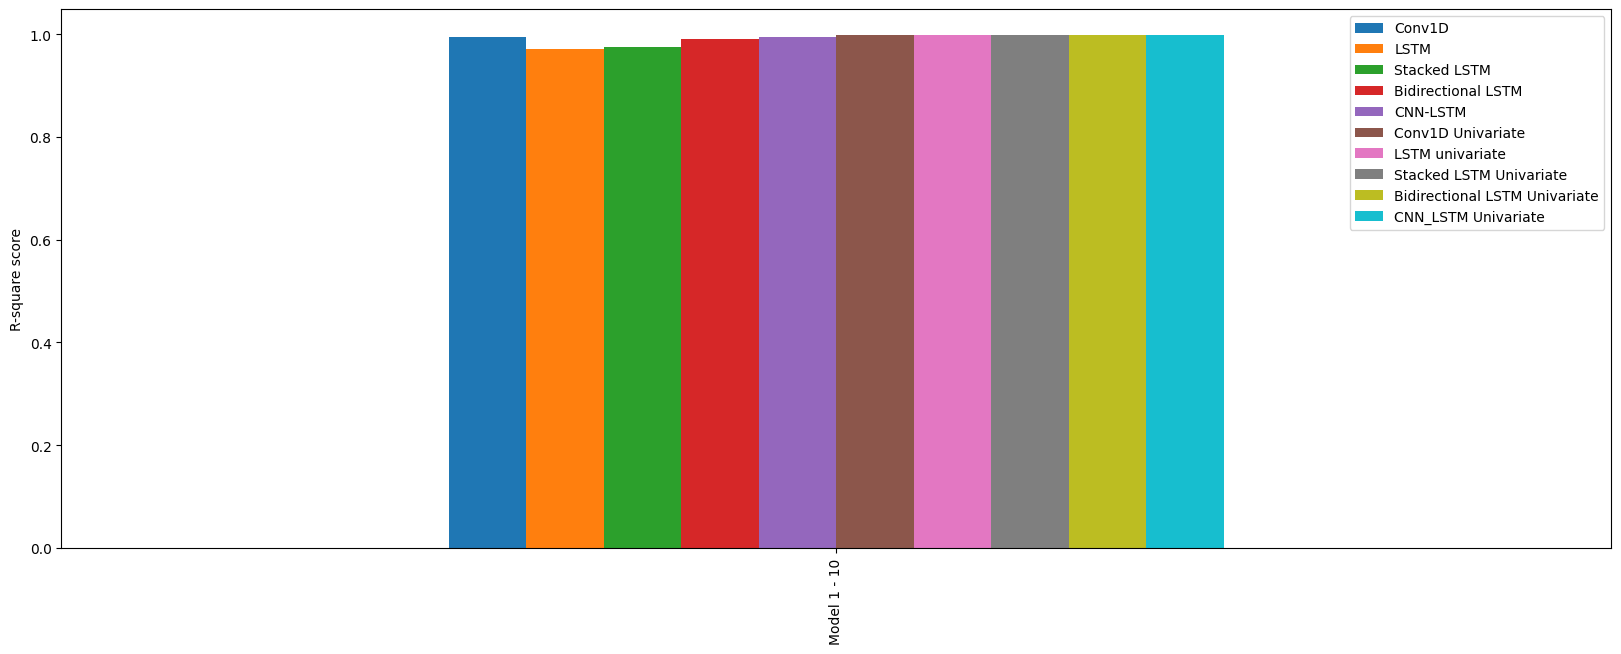

In [ ]:

# membuat dataframe

df = pd.DataFrame({
              "Conv1D": model_1_results["R-square"],
              "LSTM": model_2_results["R-square"],
              "Stacked LSTM" : model_3_results["R-square"],
              "Bidirectional LSTM" : model_4_results["R-square"],
              "CNN-LSTM": model_5_results["R-square"],
              "Conv1D Univariate" : model_6_results["R-square"],
              "LSTM univariate" : model_7_results["R-square"],
              "Stacked LSTM Univariate" : model_8_results["R-square"],
              "Bidirectional LSTM Univariate" : model_9_results["R-square"],
              "CNN_LSTM Univariate" : model_10_results["R-square"]},
             index = ["Model 1 - 10"])

# representasi dengan bar chart
ax = df.plot(figsize=(20, 7), kind="bar")
ax.set_ylabel("R-square score")

plt.savefig("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_evaluation_metrics/hasil_denormalisasi/R-square_visualization.png")

plt.show()

# rangkum evaluasi metrics dari semua model menjadi satu csv

In [ ]:

# Combining dictionaries into a list
results_list = [model_1_results,
                model_2_results,
                model_3_results,
                model_4_results,
                model_5_results,
                model_6_results,
                model_7_results,
                model_8_results,
                model_9_results,
                model_10_results]  # Add other dictionaries if needed


# Combining dictionaries into a dictionary with custom names
results_dict = {
    'Model_1 : Conv1D Multivariate': model_1_results,
    'Model_2 : LSTM Multivariate': model_2_results,
    'Model_3 : Stacked LSTM Multivariate': model_3_results,
    'Model_4 : Bidirectional LSTM Multivariate': model_4_results,
    'Model_5 : CNN-LSTM Multivariate': model_5_results,
    'Model_6 : Conv1D Univariate': model_6_results,
    'Model_7 : LSTM Univariate': model_7_results,
    'Model_8 : Stacked LSTM Univariate': model_8_results,
    'Model_9 : Bidirectional LSTM Univariate': model_9_results,
    'Model_10 : CNN-LSTM Univariate': model_10_results

}  # Add other dictionaries if needed


# Nama dataframe
df_kumpulan_evaluation_metrics = pd.DataFrame(results_dict).T

# memberi nama untuk index
df_kumpulan_evaluation_metrics.index.name = 'Daftar Model'

# konversi dataframe ke CSV
df_kumpulan_evaluation_metrics.to_csv('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/8020_evaluation_metrics/hasil_denormalisasi/kumpulan_evaluasi_metrics.csv')

# print output
(df_kumpulan_evaluation_metrics)

mae           mse  \
Daftar Model                                                          
Model_1 : Conv1D Multivariate              111.725380  49773.523438   
Model_2 : LSTM Multivariate                126.647697  62483.078125   
Model_3 : Stacked LSTM Multivariate        144.234787  80648.109375   
Model_4 : Bidirectional LSTM Multivariate   92.379150  33230.441406   
Model_5 : CNN-LSTM Multivariate            158.531128  98467.953125   
Model_6 : Conv1D Univariate                195.707703  77291.656250   
Model_7 : LSTM Univariate                  177.915054  63474.371094   
Model_8 : Stacked LSTM Univariate          187.782471  68155.296875   
Model_9 : Bidirectional LSTM Univariate    176.341705  62036.687500   
Model_10 : CNN-LSTM Univariate             178.762756  64162.027344   

                                                 rmse      mape  R-square  
Daftar Model                                                               
Model_1 : Conv1D Multivariate              158.000443  1.339748  0.994815  
Model_2 : LSTM Multivariate                179.093262  3.906037  0.970366  
Model_3 : Stacked LSTM Multivariate        203.963348  4.417177  0.973936  
Model_4 : Bidirectional LSTM Multivariate  130.637375  1.994375  0.990726  
Model_5 : CNN-LSTM Multivariate            224.194382  1.494177  0.993730  
Model_6 : Conv1D Univariate                278.013763  1.170755  0.998437  
Model_7 : LSTM Univariate                  251.941208  1.055592  0.998716  
Model_8 : Stacked LSTM Univariate          261.065704  1.140294  0.998622  
Model_9 : Bidirectional LSTM Univariate    249.071655  1.048514  0.998745  
Model_10 : CNN-LSTM Univariate             253.302246  1.061472  0.998702